In [34]:
import sys
sys.path.append('/media/tidiane/D:/dev/Pasteur/palm_tools/src')


In [35]:
%load_ext autoreload
%autoreload 2
from palm_tools import TrackSets
from palm_tools.analysis import MMDInterUnitAnalysis, MDSAnalysis, MMDInterGroupAnalysis
from palm_tools.processing import Gratin, GratinParameters
from palm_tools.processing.ts_post_processing import PostProcessingStepSeries
import pandas as pd
import numpy as np
from glob import glob
import os
import shutil
import matplotlib.pyplot as plt
import json
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# Source files, they're left untouched, only read
ORIGINAL_TRACKS_FILES = glob("/media/tidiane/D:/dev/Pasteur/data/tracksets/example_files/*.trxyt",recursive=True)
# We copy files in this directory, it's as if they were 'uploaded' there by the user
EXPORT_FOLDER = "/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder"
if not os.path.exists(EXPORT_FOLDER):
    os.mkdir(EXPORT_FOLDER)
TRACKS_FILES = []
for f in ORIGINAL_TRACKS_FILES:
    tf = os.path.join(EXPORT_FOLDER,os.path.split(f)[-1])
    shutil.copy(f,tf)
    TRACKS_FILES.append(tf)

In [37]:
TRACKS_FILES

['/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/02e0de7a4caebc82.trxyt',
 '/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/10fd51e9edc4d570.trxyt',
 '/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/1d372d16b9d77091.trxyt',
 '/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/66e67e9052c35e8d.trxyt']

In [38]:
index_df = pd.DataFrame.from_dict({
    "file":TRACKS_FILES,
    "arbitrary_condition":[
        "A" if np.random.rand() > .5 else "B" for f in TRACKS_FILES
    ]})
index_df.head()

file arbitrary_condition
0  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...                   B
1  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...                   B
2  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...                   A
3  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...                   A

In [39]:
index_df[ index_df["file"]=="/media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/02e0de7a4caebc82.trxyt"]["arbitrary_condition"].values[0]

'B'

In [40]:
tss = TrackSets.from_files(TRACKS_FILES,root_folder=EXPORT_FOLDER,index_df=index_df)

In [41]:
for ts in tss:
    print(ts)

Set of 693 trajs coming from file /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/02e0de7a4caebc82.trxyt
Set of 595 trajs coming from file /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/10fd51e9edc4d570.trxyt
Set of 1468 trajs coming from file /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/1d372d16b9d77091.trxyt
Set of 2529 trajs coming from file /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/66e67e9052c35e8d.trxyt


In [42]:
tss[0].locs.head()

x         y  frame     sigma     t   n
20  6.567428  4.522452      9  2.358852  0.27  23
22  6.503837  4.570785     10  2.436496  0.30  23
24  6.532896  4.569531     11  2.667854  0.33  23
26  6.584498  4.472216     12  2.494696  0.36  23
27  6.544505  4.398021     13  2.210227  0.39  23

In [43]:
sys.path.append("/media/tidiane/D:/dev/Pasteur/gratin-rotation_invariance/src")

In [44]:
gt = Gratin(params=GratinParameters(model_path="/media/tidiane/D:/dev/Pasteur/models/specht_palm.ckpt",
    umap_path="/media/tidiane/D:/dev/Pasteur/models/umap_specht"))

In [45]:
pps = PostProcessingStepSeries(sets_of_trajs=tss,processing_steps=[gt])

In [46]:
pps.process()

Processing in PPSS :   0%|          | 0/4 [00:00<?, ?it/s, /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/02e0de7a4caebc82.trxyt : Gratin latent vectors and output]

f size =  [64, 128, 64, 32]
Convolution has 19296 parameters. Input dim is 32, output is 32
alpha MLP size =  [16, 128, 128, 64, 16, 1]
Alpha predictor has 28675 parameters


/home/tidiane/.conda/envs/Pasteur/lib/python3.9/site-packages/torch_sparse/storage.py:14: UserWarning: `layout` argument unset, using default layout "coo". This may lead to unexpected behaviour.
  warnings.warn('`layout` argument unset, using default layout '


Thu Apr 14 13:46:56 2022 Building and compiling search function


Pickle of ParametricUMAP model loaded from /media/tidiane/D:/dev/Pasteur/models/umap_specht/model.pkl
Keras encoder model loaded from /media/tidiane/D:/dev/Pasteur/models/umap_specht/encoder
Keras full model loaded from /media/tidiane/D:/dev/Pasteur/models/umap_specht/parametric_model
1/1 [==============================] - 0s 44ms/step


Processing in PPSS :  25%|██▌       | 1/4 [00:03<00:10,  3.59s/it, /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/10fd51e9edc4d570.trxyt : Gratin latent vectors and output]/home/tidiane/.conda/envs/Pasteur/lib/python3.9/site-packages/torch_sparse/storage.py:14: UserWarning: `layout` argument unset, using default layout "coo". This may lead to unexpected behaviour.
  warnings.warn('`layout` argument unset, using default layout '


1/1 [==============================] - 0s 18ms/step


Processing in PPSS :  50%|█████     | 2/4 [00:04<00:04,  2.23s/it, /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/1d372d16b9d77091.trxyt : Gratin latent vectors and output]/home/tidiane/.conda/envs/Pasteur/lib/python3.9/site-packages/torch_sparse/storage.py:14: UserWarning: `layout` argument unset, using default layout "coo". This may lead to unexpected behaviour.
  warnings.warn('`layout` argument unset, using default layout '


2/2 [==============================] - 0s 2ms/step


Processing in PPSS :  75%|███████▌  | 3/4 [00:07<00:02,  2.35s/it, /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/66e67e9052c35e8d.trxyt : Gratin latent vectors and output]/home/tidiane/.conda/envs/Pasteur/lib/python3.9/site-packages/torch_sparse/storage.py:14: UserWarning: `layout` argument unset, using default layout "coo". This may lead to unexpected behaviour.
  warnings.warn('`layout` argument unset, using default layout '


3/3 [==============================] - 0s 2ms/step


Processing in PPSS : 100%|██████████| 4/4 [00:11<00:00,  2.89s/it, /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/66e67e9052c35e8d.trxyt : Gratin latent vectors and output]


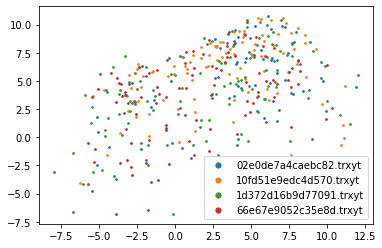

In [47]:
# Visualize latent vectors
for ts in tss:
    U = ts.locs.groupby("n")[["U_1","U_2"]].mean().sample(100).values
    plt.scatter(U[:,0],U[:,1],label=os.path.split(ts.origin_file)[1],s=3)
plt.legend(markerscale=3)

In [48]:
all_embs = pd.DataFrame(columns=["U_1","U_2","unit","group"])
for ts in tss:
    embs = ts.locs.groupby("n")[["U_1","U_2"]].mean()
    embs["unit"] = str(os.path.split(ts.origin_file)[1])
    embs["group"] = str(index_df[ index_df["file"]==ts.origin_file]["arbitrary_condition"].values[0])
    all_embs = pd.concat([all_embs,embs])


In [49]:
unit_uniques = list(set(all_embs["unit"].values))
group_uniques = list(set(all_embs["group"].values))


In [50]:
all_embs_list = [all_embs["U_1"].values.tolist(),
                    all_embs["U_2"].values.tolist(),
                    [unit_uniques.index(i) for i in all_embs["unit"].values],
                    [group_uniques.index(i) for i in all_embs["group"].values]]

In [51]:
all_embs_json = json.dumps(all_embs_list)
  
# Writing to sample.json
with open("results_density.json", "w") as outfile:
    outfile.write(all_embs_json)

In [52]:
set(all_embs_list[2])

{0, 1, 2, 3}

In [53]:
ts.locs.groupby("n")[["U_1","U_2"]].mean()

U_1       U_2
n                        
56     0.930507  5.892097
71     2.677874  8.732010
72    -3.346520  4.320053
137    3.870940  8.179353
142    6.788406  5.053594
...         ...       ...
83099 -3.097567  3.546814
83155 -1.045848 -1.099849
83177 -3.094072  5.340700
83238 -5.482019  3.446533
83291  4.930913  8.368395

[2529 rows x 2 columns]

# MMD inter units

In [54]:
RUN_NAME = "example"

def skip_200_first_frames(df):
    return df["frame"] > 200

mmd = MMDInterUnitAnalysis(track_sets=tss,
    filter_func=skip_200_first_frames,
    unit_key=["file"], 
    # it is possible to delimit units by a column of the trajectories files (if they have additional information)
    # or to consider a cartesian product of two columns. 
    # example of valid values : ["file","time_bin"], ["file","organelle"], ["organelle"] (spanned across files)
    use_high_dimension=False,
    n_bootstraps=250,
    n_max_trajs_per_unit=500, # For speed, we never consider more than 500 trajectories per unit
    n_min_trajs_per_unit=150, # For accuracy, we discard units with less than 150 trajectories
    run_name=RUN_NAME)

In [55]:
mmd.process()

In [56]:
mmd._D_bootstrap.shape

(4, 4, 250)

# MDS based on it

In [57]:
mds = MDSAnalysis(track_sets=tss,mmd=mmd,run_name=RUN_NAME)

In [58]:
mds.process()

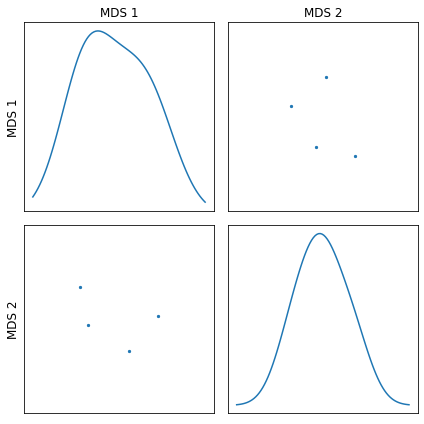

In [59]:
mds.plot_scatter()

In [60]:
mds.unit_info

file  unit  \
0  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...     0   
1  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...     1   
2  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...     2   
3  /media/tidiane/D:/dev/Pasteur/data/tracksets/e...     3   

  arbitrary_condition       X_1       X_2  
0                   B  0.008153 -0.030640  
1                   A  0.034376 -0.003119  
2                   A -0.029095 -0.010309  
3                   B -0.036884  0.020124

In [61]:
group_uniques = list(set(mds.unit_info["arbitrary_condition"].values))
all_mds = [
    mds.unit_info["X_1"].values.tolist(),
    mds.unit_info["X_2"].values.tolist(),
    [group_uniques.index(i) for i in mds.unit_info["arbitrary_condition"].values]
]
all_mds


[[0.0081526547417357,
  0.0343757249414795,
  -0.0290946625838096,
  -0.0368839582827344],
 [-0.0306399975147326,
  -0.0031193831599891,
  -0.0103092438358462,
  0.0201242216480044],
 [1, 0, 0, 1]]

In [62]:
all_mds_json = json.dumps(all_mds)
  
# Writing to sample.json
with open("results_mds.json", "w") as outfile:
    outfile.write(all_mds_json)

# MMD inter groups

In [63]:
mmd = MMDInterGroupAnalysis(track_sets=tss,
    filter_func=skip_200_first_frames,
    unit_key=["file"],
    null_mode="mix",
    group_by_keys=["arbitrary_condition"],
    # it is possible to delimit units by a column of the trajectories files (if they have additional information)
    # or to consider a cartesian product of two columns. 
    # example of valid values : ["file","time_bin"], ["file","organelle"], ["organelle"] (spanned across files)
    use_high_dimension=False,
    n_max_bootstraps=250,
    n_max_trajs_per_unit=500, # For speed, we never consider more than 500 trajectories per unit
    n_min_trajs_per_unit=150, # For accuracy, we discard units with less than 150 trajectories
    run_name=RUN_NAME)

In [64]:
mmd.process()

Adding units from tracksets: 100%|██████████| 4/4 [00:00<00:00, 34.03it/s, 2501 trajs from /media/tidiane/D:/dev/Pasteur/data/tracksets/export_folder/66e67e9052c35e8d.trxyt]


latent_df has 4 units


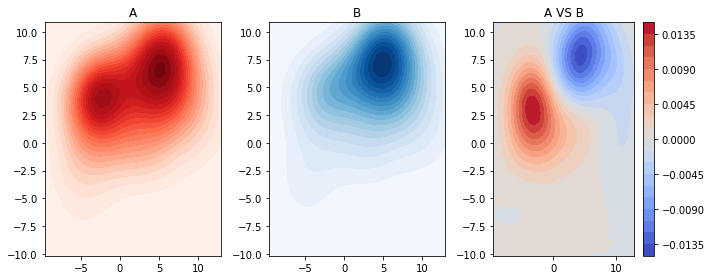

In [65]:
mmd.plot_witness_function({"arbitrary_condition":"A"},{"arbitrary_condition":"B"})

In [66]:
H1 = mmd.sample_latent_vecs_for_cond({"arbitrary_condition":"A"})

In [67]:
H2 = mmd.sample_latent_vecs_for_cond({"arbitrary_condition":"B"})

In [68]:
from palm_tools.analysis.analysis_tools.mmd import MMD2, get_sigma, witness_function


In [69]:
xx, yy, w, w1, w2 = witness_function(H1.values, H2.values, lims=None)

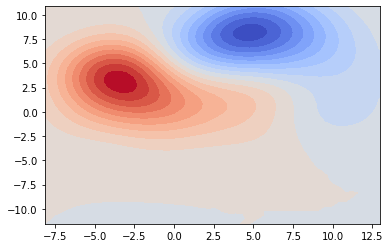

In [70]:
from matplotlib.colors import TwoSlopeNorm
dnorm = TwoSlopeNorm(vcenter=0, vmin=np.min(w), vmax=np.max(w))
plt.contourf(xx, yy, w, norm=dnorm, cmap="coolwarm", levels=20)

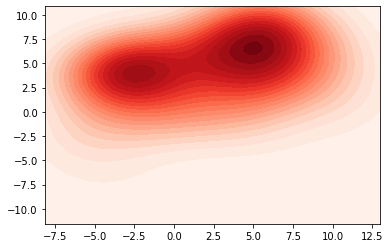

In [71]:
plt.contourf(xx, yy, w1, cmap="Reds", levels=20)

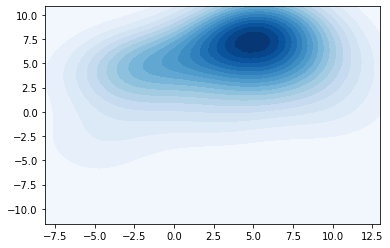

In [72]:
plt.contourf(xx, yy, w2, cmap="Blues", levels=20)

In [73]:
xx.shape

(50, 50)

In [81]:
mmd_bygroup = [xx.tolist(), yy.tolist(), w.tolist(), w1.tolist(), w2.tolist()]

In [89]:
mmd_bygroup_json = json.dumps(mmd_bygroup)
  
# Writing to sample.json
with open("results_mmd_bygroup.json", "w") as outfile:
    outfile.write(mmd_bygroup_json)

In [95]:
mmd_bygroup[0]

[[-8.149091720581055,
  -7.71859445377272,
  -7.288097186964386,
  -6.8575999201560505,
  -6.427102653347716,
  -5.996605386539382,
  -5.566108119731046,
  -5.135610852922712,
  -4.705113586114377,
  -4.274616319306043,
  -3.8441190524977085,
  -3.413621785689373,
  -2.9831245188810387,
  -2.5526272520727042,
  -2.122129985264369,
  -1.6916327184560345,
  -1.2611354516477,
  -0.8306381848393656,
  -0.40014091803103113,
  0.03035634877730331,
  0.46085361558563775,
  0.891350882393974,
  1.3218481492023084,
  1.7523454160106429,
  2.1828426828189773,
  2.6133399496273118,
  3.043837216435646,
  3.4743344832439806,
  3.904831750052317,
  4.335329016860651,
  4.765826283668986,
  5.19632355047732,
  5.626820817285655,
  6.057318084093989,
  6.4878153509023235,
  6.918312617710658,
  7.348809884518992,
  7.779307151327329,
  8.209804418135661,
  8.640301684943996,
  9.07079895175233,
  9.501296218560668,
  9.931793485369003,
  10.362290752177337,
  10.792788018985672,
  11.223285285794006,

In [2]:
import json
with open("results_mmd_bygroup.json") as outfile:
    data = json.load(outfile)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
data = [[[-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344], [-8.149091720581055, -7.71859445377272, -7.288097186964386, -6.8575999201560505, -6.427102653347716, -5.996605386539382, -5.566108119731046, -5.135610852922712, -4.705113586114377, -4.274616319306043, -3.8441190524977085, -3.413621785689373, -2.9831245188810387, -2.5526272520727042, -2.122129985264369, -1.6916327184560345, -1.2611354516477, -0.8306381848393656, -0.40014091803103113, 0.03035634877730331, 0.46085361558563775, 0.891350882393974, 1.3218481492023084, 1.7523454160106429, 2.1828426828189773, 2.6133399496273118, 3.043837216435646, 3.4743344832439806, 3.904831750052317, 4.335329016860651, 4.765826283668986, 5.19632355047732, 5.626820817285655, 6.057318084093989, 6.4878153509023235, 6.918312617710658, 7.348809884518992, 7.779307151327329, 8.209804418135661, 8.640301684943996, 9.07079895175233, 9.501296218560668, 9.931793485369003, 10.362290752177337, 10.792788018985672, 11.223285285794006, 11.65378255260234, 12.084279819410675, 12.51477708621901, 12.945274353027344]], [[-11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395, -11.531453132629395], [-11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766, -11.074471103901766], [-10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138, -10.617489075174138], [-10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508, -10.160507046446508], [-9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888, -9.70352501771888], [-9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251, -9.246542988991251], [-8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621, -8.789560960263621], [-8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993, -8.332578931535993], [-7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365, -7.875596902808365], [-7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365, -7.4186148740807365], [-6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107, -6.961632845353107], [-6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478, -6.504650816625478], [-6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785, -6.04766878789785], [-5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222, -5.590686759170222], [-5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925, -5.1337047304425925], [-4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963, -4.676722701714963], [-4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335, -4.219740672987335], [-3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067, -3.7627586442597067], [-3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785, -3.3057766155320785], [-2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484, -2.8487945868044484], [-2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682, -2.39181255807682], [-1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919, -1.9348305293491919], [-1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618, -1.4778485006215618], [-1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335, -1.0208664718939335], [-0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053, -0.5638844431663053], [-0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698, -0.10690241443867698], [0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513, 0.3500796142889513], [0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813, 0.8070616430165813], [1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096, 1.2640436717442096], [1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838, 1.721025700471838], [2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468, 2.178007729199468], [2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096, 2.634989757927096], [3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245, 3.0919717866547245], [3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528, 3.5489538153823528], [4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981, 4.005935844109981], [4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611, 4.462917872837611], [4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238, 4.919899901565238], [5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868, 5.376881930292868], [5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498, 5.833863959020498], [6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124, 6.290845987748124], [6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754, 6.747828016475754], [7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384, 7.204810045203384], [7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011, 7.661792073931011], [8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864, 8.11877410265864], [8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271, 8.575756131386271], [9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897, 9.032738160113897], [9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527, 9.489720188841527], [9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154, 9.946702217569154], [10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784, 10.403684246296784], [10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414, 10.860666275024414]], [[-1.968421348308937e-06, -1.2383016720773942e-05, -2.9602249296223414e-05, -5.0711316637564566e-05, -7.627100124540276e-05, -0.00010946319140689052, -0.00014389474264936877, -0.00017997981219123642, -0.00021405130118386657, -0.00024471749702165884, -0.00026743784854784574, -0.00028097474886616724, -0.0002847338387311669, -0.0002779255078307547, -0.00026002765370393394, -0.00023517272513126853, -0.00020570408897382773, -0.0001735730526285021, -0.00014010879529701564, -0.00010907804787189438, -8.333652914645502e-05, -6.260241568963192e-05, -4.519582732705746e-05, -3.068428807795048e-05, -2.0010142238544863e-05, -1.278670089519455e-05, -6.501455294730285e-06, -3.1545690617420328e-06, -1.6831068976263622e-06, 7.767005423020247e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.869965980426019e-06, -1.7034944151580051e-06, -1.8129724701242296e-05, -4.39666595611665e-05, -7.091675102245852e-05, -0.00010297298609919734, -0.0001380134293181621, -0.00017158949099521808, -0.00020475872427627552, -0.0002340587553720946, -0.0002553449569120301, -0.0002665395055383994, -0.0002710719926556916, -0.0002646038211391253, -0.0002500304678514656, -0.00022483245918420713, -0.00019815108596311446, -0.00016758999062592997, -0.00013409355817836456, -0.00010273406060083957, -7.672547613197215e-05, -5.67984720361152e-05, -3.9705759959504004e-05, -2.8895260421708348e-05, -1.919800315884056e-05, -1.1359118467182943e-05, -5.809470294890419e-06, -1.973615588136682e-06, -1.3927267356005721e-06, -5.980508150864137e-07, 7.832536117871715e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.502408994612303e-05, 6.583626362371205e-06, -6.417373235029515e-06, -2.6996220358642273e-05, -5.125348629754576e-05, -7.968866118590823e-05, -0.0001125307241492969, -0.00014448793326340926, -0.0001768095666012137, -0.00020535013322678153, -0.00022426438324935375, -0.0002347656597429185, -0.00023704540359581233, -0.00023140090898704046, -0.0002144010948180933, -0.00019485720065992736, -0.00016958715205868594, -0.00014320545621862072, -0.00011506113937520172, -8.985916413701478e-05, -6.345529341154186e-05, -4.530352615329001e-05, -3.205321748253937e-05, -2.1341017477427554e-05, -1.5389449779896326e-05, -9.140815179805111e-06, -3.342914429095715e-06, -9.262018088612236e-07, -7.800114201050923e-07, -1.563325969691179e-07, 1.1499019785074072e-06, 7.277597446297862e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.220695519794587e-05, 2.535021158552172e-05, 1.5267666179956266e-05, -2.3183824503950437e-06, -2.482953962820115e-05, -4.942095757653602e-05, -7.470526381043828e-05, -0.00010467271438814872, -0.00012924759140112943, -0.00015197801082056036, -0.00016861348327410722, -0.00017825454306040332, -0.00018045252500065227, -0.0001750369537281151, -0.00016049382130573474, -0.00014113583192406677, -0.0001242516031751263, -0.00010193402628653513, -8.108890810113397e-05, -6.144971692752913e-05, -4.432616904908534e-05, -2.729542095848472e-05, -1.627539778269875e-05, -8.647889813739232e-06, -6.197917911610153e-06, -4.548786155075986e-06, 1.135893439837846e-06, 1.5457449824279738e-06, 9.833570117432576e-07, 5.159659970330148e-07, 1.6165058949991633e-06, 1.0230679999908857e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.2608305459126575e-05, 4.882145400686682e-05, 4.1137757719849006e-05, 2.8707946512149306e-05, 1.0354979463053052e-05, -9.03883737437476e-06, -2.803078139857005e-05, -4.435436743869929e-05, -6.405387316896921e-05, -7.982160639950992e-05, -9.124435329476636e-05, -9.977139442418257e-05, -0.00010134215420562346, -9.443571986790652e-05, -8.67039022775266e-05, -7.47759820613872e-05, -6.151539082309009e-05, -4.414592592015521e-05, -3.537105480270694e-05, -2.2922792790242913e-05, -1.3551980792669431e-05, -4.508513718494479e-06, 1.091712738526666e-06, 5.766548606678178e-06, 5.2848553198760915e-06, 2.796894924946562e-06, 5.657449842310732e-06, 4.834323118431104e-06, 3.186379830508762e-06, 1.4127633709733397e-06, 2.1759645749532628e-06, 2.1474995926631798e-06, 2.4879044088322724e-06, 1.7859961105281805e-06, 1.863287038919945e-06, 1.8727432528260893e-06, 1.8133003498555558e-06, 1.0610431022984817e-06, 9.7809773078881e-07, 8.67581424785406e-07, 7.404862653339672e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.898407763288427e-05, 5.891745449662872e-05, 5.424447639382424e-05, 4.766168427586964e-05, 4.265346015295613e-05, 3.462889783655812e-05, 2.5181424589149418e-05, 1.6634474681768248e-05, 7.665641047149949e-06, 4.163237507030055e-06, 3.097836983734898e-06, 3.3674274028534486e-06, 9.75799649608096e-07, 2.599742492990207e-06, 4.9290472698954426e-06, 1.0293450207292973e-05, 1.410193724602426e-05, 1.6549595145303787e-05, 2.4419186788110882e-05, 2.6551832069233376e-05, 2.622086358693913e-05, 2.4977539285136406e-05, 2.2041529654914655e-05, 1.8876680995939876e-05, 1.886680173502911e-05, 1.3028931420532337e-05, 1.2998163437241064e-05, 1.1566938209744421e-05, 1.144483660563961e-05, 9.949419450944744e-06, 1.0016287343289513e-05, 9.398159847139122e-06, 8.881609965825892e-06, 7.0506982833198506e-06, 6.835921662715978e-06, 4.344584682771107e-06, 4.111701274867516e-06, 3.7543137443399788e-06, 2.711812814407313e-06, 2.3464481143702922e-06, 1.3095517194826593e-06, 1.0754944818667638e-06, 8.499091142927079e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.652469557524458e-05, 6.545124829719732e-05, 7.01831536676779e-05, 7.428292248290772e-05, 7.340418348160643e-05, 7.489434587664465e-05, 7.79147073615193e-05, 8.552940504919415e-05, 9.320876019302301e-05, 9.674709723473665e-05, 0.00010081621212347047, 0.00010439381519125525, 0.00011012584885496612, 0.00011067714444289276, 0.00011069384347924904, 0.00010575569820059144, 0.0001029359120459299, 9.343941939070908e-05, 8.21079994888916e-05, 7.81440586815889e-05, 6.989184837855088e-05, 6.198412923180972e-05, 4.614813542443694e-05, 4.092298346345493e-05, 3.6599348062653995e-05, 2.857762211204251e-05, 2.68215890047585e-05, 2.2160187535836606e-05, 1.8453117178585883e-05, 1.780271214435772e-05, 1.7209047643900636e-05, 1.633702437621536e-05, 1.579907855302283e-05, 1.5204766185480765e-05, 1.3936942176649702e-05, 1.3052366386800385e-05, 9.444653761448883e-06, 7.340513097890464e-06, 2.8276103843518895e-06, 3.682342385683108e-06, 2.1534949599935013e-06, 9.119665290852809e-07, 1.4392498426144179e-06, 1.094408001307273e-06, 8.007576516548125e-07, 0.0, 0.0, 0.0, 0.0, 0.0], [6.636933253528657e-05, 7.713833693002655e-05, 8.708631513254419e-05, 9.551401855336294e-05, 0.00010421306771794478, 0.0001165961021635496, 0.00013093460116613345, 0.00014665543375826963, 0.0001629628843885316, 0.00017418764261748214, 0.00019038389684987206, 0.00019943494438655319, 0.00020562365198930352, 0.00020746492379749898, 0.0002059636509287048, 0.000194625524925894, 0.00017951047274106496, 0.00016507997943020252, 0.00014548031734229906, 0.0001318261411282965, 0.00011192454340805763, 9.432432988809003e-05, 7.909483220642598e-05, 6.294515665929815e-05, 5.327527069782262e-05, 4.804208625368326e-05, 4.0064981993246275e-05, 3.73444459948686e-05, 3.498274940209561e-05, 3.434444881596395e-05, 3.2872375955295615e-05, 3.22971904971677e-05, 3.1459618558800756e-05, 2.7862138048906943e-05, 2.4159080549350895e-05, 2.2183556730122257e-05, 1.9631447128247285e-05, 1.681313612109124e-05, 1.405145202797731e-05, 1.030467379706977e-05, 6.643767709454272e-06, 6.517577867631556e-06, 4.208321651992342e-06, 2.8157264754791547e-06, 1.3282133201501166e-07, 8.473821162391863e-07, -2.1376839269588784e-07, 0.0, 0.0, 0.0], [7.480066372527643e-05, 8.714156624416278e-05, 9.97478368835751e-05, 0.00011067200520257386, 0.00012654645006513355, 0.0001423998528750491, 0.00016652556265929247, 0.0001864862725093415, 0.00021053254138140502, 0.00023705978339060236, 0.0002635781848506673, 0.0002840154414759245, 0.00029025595672838695, 0.00030001914278265473, 0.000294207971087608, 0.00027967337835642185, 0.00025949197638613756, 0.0002370160160855572, 0.000210476423470628, 0.00017904372671230783, 0.00015340556083831585, 0.00012927377286655825, 0.0001120515584868047, 9.272802945425583e-05, 7.569864737156218e-05, 6.204357113256759e-05, 5.228650835599943e-05, 4.734344224268381e-05, 5.174396875919307e-05, 5.328173698080604e-05, 5.5291767800971256e-05, 5.402620220002973e-05, 5.28785025830486e-05, 4.71502270854552e-05, 4.331551588281986e-05, 3.789992918269101e-05, 3.3088556949638554e-05, 2.7013602331407665e-05, 2.2414676627530154e-05, 1.8038785016955343e-05, 1.0350005253551714e-05, 6.131713908804314e-06, 2.5242482281164843e-06, 1.3331736897890264e-06, -2.1648661553161647e-06, -2.3735447865168212e-06, -9.626413387558546e-07, -1.924662950096567e-07, -1.8154687409473974e-06, -1.7573468037560355e-06], [7.940631912251484e-05, 8.925859850552383e-05, 9.925441986556637e-05, 0.00011309264243815906, 0.0001331796063535149, 0.00015828011416133925, 0.00017778481761329787, 0.00020941974995028088, 0.00024447561868036743, 0.0002826682886455064, 0.000312417496574943, 0.0003429635039865714, 0.0003636035249118335, 0.0003698929479739818, 0.0003641349738969055, 0.000347732907655805, 0.0003237109125542512, 0.0002973839129512137, 0.0002680312425480975, 0.0002342035640957289, 0.0002023651205205932, 0.00017401174936163016, 0.00015594431864938743, 0.00013279658886626973, 0.00011719530655608452, 0.0001046110218372791, 8.715532231311228e-05, 8.61140879896197e-05, 8.200444021187446e-05, 8.252589434214465e-05, 8.09829742184338e-05, 8.082907501151979e-05, 7.795414499359705e-05, 7.656918233313575e-05, 6.79760868106513e-05, 6.26624155860805e-05, 5.4614872111035294e-05, 4.4937172565236914e-05, 3.253601756850343e-05, 2.0844564283304672e-05, 1.297620383344305e-05, 6.585566998934436e-06, 5.236391446106515e-07, -3.7285707951398682e-06, -3.3956995788015052e-06, -2.740272201198919e-06, -5.348189511409146e-06, -4.150588287774073e-06, -4.640261642299206e-06, -3.4830196506543544e-06], [7.21361935022228e-05, 8.333379766169526e-05, 9.564753097011328e-05, 0.00011265075553812984, 0.00013117805798639132, 0.00014884375053151005, 0.00017882619216543242, 0.0002155824970975133, 0.00025342734111413463, 0.0002937485075923869, 0.0003335966840288284, 0.0003694045284413979, 0.0003944286350347332, 0.00041105254474737966, 0.00041376594942506935, 0.0004042653093492164, 0.00038155164228621005, 0.00035954346648655277, 0.0003242584211477431, 0.0002807994122834017, 0.00024007527084525613, 0.00022456119344407225, 0.00019921257164692697, 0.00017306698468711154, 0.00015107597467178962, 0.00014560608824375193, 0.0001333319106608309, 0.0001285282314655515, 0.00012589869114616313, 0.00013174669103548878, 0.00012843175600726035, 0.00012515004039145462, 0.0001156117282826728, 0.00011465755182426957, 0.00010247937306898915, 8.864313741534417e-05, 7.53277006422135e-05, 6.207280658657121e-05, 4.359749327257651e-05, 2.8077799445228355e-05, 1.4712882135724579e-05, 3.202664061582552e-06, -3.2370242445107667e-06, -1.0256121941355435e-05, -1.1525506095891637e-05, -1.412849891602604e-05, -1.1446155667364888e-05, -1.2425029892928733e-05, -1.0065133597727088e-05, -7.045313430784266e-06], [7.334282578007464e-05, 8.66603247242693e-05, 9.268253800143026e-05, 0.00010464946702732052, 0.00012054680016515594, 0.0001414138814859081, 0.0001682158075243501, 0.0002023096478262665, 0.00024256078676142528, 0.00028411447230690043, 0.00033322421380638104, 0.00038147570951495985, 0.00041866442558483887, 0.00044560428501675894, 0.00045569092722627484, 0.0004569743918802528, 0.0004365212832193794, 0.00040331941049352087, 0.0003789508505370034, 0.0003550223620491349, 0.0003150907672734545, 0.0002849451549551656, 0.0002605717579898515, 0.0002325609249094365, 0.0002142409828057872, 0.0002009823415261474, 0.00019036797612599624, 0.0001841559446615562, 0.00018543483252276747, 0.00018460149140254399, 0.00018760583052242536, 0.00018719365146666145, 0.00018262797793876004, 0.00017232648488520568, 0.00015386613089289421, 0.00013298149417416324, 0.00010863411005195535, 8.621988432394325e-05, 6.257137602904057e-05, 4.076376946184902e-05, 1.9443806622554798e-05, 4.654377482354199e-06, -1.0112055314852919e-05, -2.002446057007315e-05, -2.2012399700387133e-05, -2.5585472370434035e-05, -2.4148427313385007e-05, -1.8863083857070795e-05, -2.0329263106629336e-05, -1.881011804293305e-05], [7.159178616689588e-05, 8.593527167977968e-05, 9.579673764254512e-05, 0.0001081128935586503, 0.00011778185352561516, 0.00013552241586096232, 0.00015584009309419639, 0.00018246388557754218, 0.00022185306433923245, 0.00027727619950049546, 0.0003261282488536141, 0.000374801281456498, 0.00042200618460452866, 0.0004647210191261451, 0.0004970373010909114, 0.0005001521056831404, 0.0004949334244192223, 0.0004765024725545098, 0.00045090457116549914, 0.0004299667627292189, 0.0003931477080992066, 0.00035958246963945645, 0.00033186970866651527, 0.0003125081752733003, 0.00029121257032420524, 0.00028474464177211204, 0.00026899512881731945, 0.0002719034722268668, 0.00026723923770782695, 0.00027593172987733705, 0.00028213094593106184, 0.00027245838655878016, 0.0002582363975296403, 0.00023922560639787958, 0.0002121939385376485, 0.00018366206217839066, 0.00014341563724608924, 0.000104257635566963, 6.886627011140899e-05, 3.7418329404086554e-05, 1.120338657327626e-05, -1.6305713604612156e-05, -3.509466055826591e-05, -4.8150603992820796e-05, -5.475185193564039e-05, -6.078508534648916e-05, -5.8807823006445744e-05, -5.015605391614893e-05, -4.1736297069495313e-05, -3.238844741353004e-05], [8.708891935970027e-05, 9.936619801963003e-05, 0.00011297236305476271, 0.00012337667816458972, 0.00013077394058097188, 0.00013673759456575606, 0.0001465220210761231, 0.00017471609544231822, 0.00021649310972388612, 0.0002635456280464274, 0.00032197576795693324, 0.00038351385957544233, 0.0004453111503645328, 0.0004974309375888677, 0.0005370830479316433, 0.0005639104883180322, 0.0005837972234485967, 0.0005780408207176303, 0.0005686628084510222, 0.0005362015181840764, 0.0004985932381266944, 0.00046648030798118224, 0.00043769833562694945, 0.0004179597202104997, 0.00039701358057076495, 0.0003872736418614847, 0.0003833485540478245, 0.00037837955076907605, 0.00038244982810098284, 0.000382330806168745, 0.00037831988439341626, 0.0003727221822429809, 0.0003525871422091636, 0.0003141577532869197, 0.0002742489411054001, 0.000230801579059755, 0.00017575643008607955, 0.00012519430409498587, 7.366490531179502e-05, 1.966029904729307e-05, -2.208993269993718e-05, -4.8625459379334705e-05, -7.699748684043996e-05, -8.704143865819413e-05, -9.11758312401679e-05, -9.73552896310687e-05, -9.790566464138345e-05, -8.827050689267269e-05, -8.134286944839485e-05, -6.664131998661551e-05], [0.00011612177828884229, 0.00013671810272577588, 0.00015109048672960323, 0.00015488915146480995, 0.00015410053593986226, 0.0001601712115237297, 0.00017324026894718556, 0.00020413319871780307, 0.00023760269930495157, 0.00028624009650156596, 0.00035080408870120277, 0.00043141131090177094, 0.000508347163704524, 0.0005789824336492645, 0.0006482420826925332, 0.000692321551076419, 0.0007109888112655964, 0.0007234306253492482, 0.000711204440580322, 0.0006838066687865215, 0.0006557622913040398, 0.0006294887623466616, 0.000602627049249982, 0.0005717261203598831, 0.000558164757328662, 0.0005425461848088586, 0.0005336959329696755, 0.0005220750994264917, 0.0005161842282664563, 0.0005127396857867474, 0.0005122413041050871, 0.0004945417133277879, 0.00046209263649956843, 0.00041876830994047544, 0.0003568423774170744, 0.00028919800022088034, 0.0002135478117090108, 0.00013491144317260683, 6.604402160815322e-05, 4.615471314457645e-06, -5.5443772120040936e-05, -9.665379745025306e-05, -0.00012708333864588705, -0.00014837062864998406, -0.00016012768648433084, -0.0001597683244920802, -0.0001492572883616304, -0.0001372737234925445, -0.00012640422874178703, -0.00010864645360561272], [0.00016358543155653676, 0.00018775395199187913, 0.00021362870837913746, 0.00022508158308826324, 0.00023180180348057657, 0.00024304686012574994, 0.0002581135334052192, 0.0002777996792977886, 0.0003158992438995903, 0.00036942141937787616, 0.0004490971097687096, 0.000529902725600797, 0.0006245316028781747, 0.0007290010014463087, 0.000808276508213301, 0.0008710769714144681, 0.0009181490904457239, 0.0009365549742251229, 0.0009261020094849387, 0.000907432131122486, 0.0008771037588082007, 0.0008464707634467136, 0.0008220683821665426, 0.0007793453809529242, 0.000758463316493602, 0.0007411387825047521, 0.0007260528219479782, 0.0007085238430790031, 0.0007025217648488576, 0.0006873434434534361, 0.0006630258720672078, 0.0006372903726691848, 0.0005894348150955051, 0.0005298254929525432, 0.0004412723414357508, 0.00035033215295392944, 0.000248065626364047, 0.00014867168997679018, 5.0001530563108026e-05, -3.369256334782237e-05, -0.00010573208559179557, -0.0001654979683720283, -0.00020235178939320459, -0.00022356546338081539, -0.0002345373373729835, -0.00023621082259576103, -0.00022719182335642082, -0.0002086987480543176, -0.00018293847185092165, -0.00016097705190371893], [0.00023329900663551567, 0.0002777301577824849, 0.00031245199062674865, 0.0003378204987003119, 0.0003597875112897218, 0.00037553685341047867, 0.0003976069998648038, 0.00043254861027199054, 0.0004816520509804967, 0.0005531372340111659, 0.0006454078914383083, 0.0007415376474154411, 0.0008626733824589278, 0.0009777956134026178, 0.0010748585378101442, 0.0011586615876965477, 0.0012162680354463997, 0.001239372332825435, 0.0012457770404564195, 0.001222873819112116, 0.0011927431539050571, 0.001145518105453497, 0.0011079145325319012, 0.001058521646310082, 0.001014041077457239, 0.000979998094201984, 0.0009521974263902173, 0.0009366870519193304, 0.0009129630618608764, 0.0008930974443153831, 0.0008668848228737844, 0.0008120299898135698, 0.0007352880228780371, 0.0006460362827562555, 0.00053100001895626, 0.00040400773837894247, 0.00027796900940434, 0.000140843682703081, 1.4338081166323036e-05, -9.71140684881851e-05, -0.00018472151513962724, -0.0002571739675148953, -0.00030584844632714587, -0.0003316914531984852, -0.00034467054859657696, -0.0003373436595571969, -0.00032455571022087226, -0.00030031589760597013, -0.00026386799922682486, -0.00022915420638065095], [0.00032464752875768646, 0.00039087870818746515, 0.00044926804772036895, 0.0004909365281353974, 0.0005374858062026219, 0.0005854695247635381, 0.0006265465833428371, 0.0006745958577482024, 0.0007511236556156254, 0.0008457085206415036, 0.0009560615539965242, 0.0010914200761838206, 0.0012275630780635306, 0.001361711243185495, 0.001467743682551502, 0.0015643821944419222, 0.0016241307675208803, 0.001647300493733669, 0.0016630662135014092, 0.0016364366086300116, 0.001583587255608988, 0.0015156819817869192, 0.0014518385319811605, 0.0013957597185126499, 0.0013286469450503064, 0.0012861408927950842, 0.0012462643912713478, 0.001202756632572684, 0.0011558199430735882, 0.0011143906093394182, 0.001070258321823578, 0.0009926829515164758, 0.0008981385980957087, 0.0007796628399372582, 0.000622623134643835, 0.00045762244456758563, 0.00028522631200942304, 0.00011583974922852922, -4.253488381198616e-05, -0.00018738408435596782, -0.00030239549302895057, -0.0003829503441457238, -0.000444922526329388, -0.00048117037885670615, -0.0004891754350270069, -0.00047708705963134485, -0.0004517059909667009, -0.0004140254875539354, -0.0003721394370824357, -0.000320305151726431], [0.0004408395638448616, 0.0005287608186730695, 0.0006185716975478156, 0.0007013748952470911, 0.0007859623606950245, 0.0008570854721518823, 0.000936017195349071, 0.00102210634293311, 0.0011383436023802507, 0.0012680905882252649, 0.0014017018634926584, 0.00155557652519496, 0.0017189028020982433, 0.0018555611044704266, 0.001993016069481349, 0.0020890737719833925, 0.002151671355885577, 0.002179509660175983, 0.0021851219734745396, 0.002135950445778569, 0.0020760559982762224, 0.001989265448589228, 0.0018934434990768032, 0.0018130765010560697, 0.0017261800976520825, 0.001648706467964129, 0.0015798201946513536, 0.0015189617495264054, 0.0014595797988917057, 0.001392709674637564, 0.0013115465436568416, 0.0012099965183838, 0.0010847516821319235, 0.000917648195045825, 0.0007232176716305111, 0.000518207106083178, 0.0002922885096397175, 7.61170506603172e-05, -0.00012337540688759936, -0.00029638853707587625, -0.0004466518435520834, -0.0005505213320328483, -0.0006242516956988873, -0.0006639540201867609, -0.0006696924845459662, -0.0006543374590000996, -0.0006167044801056135, -0.0005575001028362703, -0.000497281963187061, -0.00043197951947706215], [0.0005639762195821848, 0.0006998957945869833, 0.0008250645880222532, 0.0009563002757093583, 0.0010950090473664, 0.0012219126651814337, 0.001347325023245017, 0.0014972460235516587, 0.001647989748301072, 0.0018019974422847198, 0.001987168977212763, 0.002165164487334708, 0.0023445253701178097, 0.0025106318211208017, 0.0026516856788800563, 0.0027607763388286044, 0.002827300951946182, 0.0028422004046835883, 0.002818468870945409, 0.0027600218973702463, 0.002658303601015246, 0.002547875889444564, 0.002422534926571669, 0.0022943034868400597, 0.0021873958335598834, 0.002062221035193601, 0.001971461916556197, 0.001876581890315393, 0.0017775927725679572, 0.001686171194339859, 0.0015657015727631842, 0.0014301714245755852, 0.001256872076111022, 0.0010603872403791969, 0.0008202007731388959, 0.0005605707869634391, 0.0002836527809653086, 1.430468963232838e-05, -0.0002336362835931279, -0.0004361895712141498, -0.0006138937050645904, -0.0007414397316418901, -0.0008235495382843351, -0.0008673302586129125, -0.0008748244194636426, -0.0008445338166477693, -0.0007900781517839702, -0.000728060967436903, -0.0006498457150235808, -0.0005584689440235734], [0.0007165347580652772, 0.0008871323612297134, 0.001069738119897353, 0.0012686710653960417, 0.0014595012224396069, 0.0016616027710497526, 0.001855026936052006, 0.0020679313442116083, 0.0022825966348842134, 0.0024907586890218344, 0.0027145326702809587, 0.002928080397485088, 0.003134582889225669, 0.0033089902221567664, 0.0034562335538314377, 0.003566713692139521, 0.003621033340860465, 0.0036323864559013163, 0.003576318812901963, 0.0034742761241531852, 0.003347153841364868, 0.0031810268261437333, 0.0030171708446133667, 0.002854335709141318, 0.0026991419649545446, 0.002544563984962155, 0.0023954499443209843, 0.002262104192969262, 0.002141881503450102, 0.0020137671089248176, 0.001853493080796017, 0.0016615279299495812, 0.001445773955831931, 0.001193437139793068, 0.0009069018817397731, 0.0005936172803553707, 0.00027286004482218653, -4.7252937771643556e-05, -0.00034728001412856046, -0.0005993240477038843, -0.00079522344643171, -0.0009480867537633325, -0.0010331188400196012, -0.0010806098408501805, -0.001091364271374456, -0.001049672071270195, -0.0009930040463945189, -0.0009076742239094286, -0.0008074739440979962, -0.0007018013377886741], [0.000869072358562685, 0.0010998464289308082, 0.0013526805307078533, 0.0016130710352254664, 0.0018966005203246063, 0.0021738125753058488, 0.002455641586550537, 0.0027310477266096356, 0.003015621687876632, 0.003292823732761588, 0.0035614529986281564, 0.003805824935931952, 0.004048596924250791, 0.004245359018319887, 0.004398212108289384, 0.0044931326220883855, 0.004528311276595265, 0.004508680467353438, 0.004412832008259846, 0.004272680697851951, 0.00409237946183381, 0.003902494201962178, 0.0036783490487616293, 0.0034765995974966393, 0.0032556274047958952, 0.0030390628232857646, 0.0028595827740567374, 0.0026887507101642184, 0.002523768346828187, 0.0023455570983788865, 0.0021454344558051687, 0.001910485636760279, 0.0016550808180620692, 0.0013280195075894173, 0.00098996800995219, 0.0006211715100475712, 0.00023816840676977018, -0.0001223933673543346, -0.000459738511049617, -0.000741879398524901, -0.0009763387146310512, -0.0011475588868338433, -0.0012585210121356396, -0.0013000849387197941, -0.0013046968993949224, -0.0012762531905733225, -0.0011966989562626979, -0.0010959746114833262, -0.0009763284641003927, -0.0008489511863049711], [0.001037552260243661, 0.0013299584311223635, 0.0016566658469464096, 0.0020027372351774635, 0.002376961114500342, 0.0027391878774463896, 0.0031116857217849403, 0.0034824823187428224, 0.003854529557854993, 0.004203462689273453, 0.004532902478787681, 0.004831936268123182, 0.005085214971948153, 0.00529499679575968, 0.00543894478538884, 0.00551507837348954, 0.005530632230260839, 0.005458487250682498, 0.005301359713871745, 0.005109494275491506, 0.0048780213335836145, 0.004623561813531526, 0.00436117135659218, 0.00408198219346449, 0.003802482186190786, 0.003554729963123288, 0.0033445118474235884, 0.003117640161349915, 0.002907127179922292, 0.002702934441085214, 0.0024562127331557047, 0.002154806759228591, 0.0018399826585356665, 0.0014747685297464026, 0.0010670414097226303, 0.0006369978437150902, 0.00021881127531600368, -0.00019183702099624667, -0.000569232846507047, -0.0008918497649517271, -0.0011472172043391418, -0.00134020168962329, -0.0014603670328497396, -0.0015132486976455173, -0.0015142277414301052, -0.001467325188235705, -0.0013856985917377594, -0.0012707034829828024, -0.0011283811212343508, -0.0009918065453974065], [0.0012145573253765632, 0.0015716372640721234, 0.0019762083149513824, 0.002409010636054816, 0.0028742749165192533, 0.00335586785357829, 0.0038328999641526118, 0.004312504663594471, 0.004774844500453679, 0.005196099490144115, 0.005588014406922847, 0.005922109033738049, 0.006208159948989097, 0.006417381856944047, 0.006548506015057697, 0.006592594922714856, 0.006547593720989587, 0.006436696099385537, 0.006241873960367088, 0.006001402787470956, 0.005688081805847987, 0.005351496628658931, 0.005014146972199627, 0.004690661188824163, 0.0043717432310633655, 0.00406865522758776, 0.0037902445349267243, 0.0035054094915710696, 0.003275286043031886, 0.0030233537541886207, 0.0027325629185386505, 0.0024010276279284957, 0.002035797438467473, 0.001622786583884087, 0.0011602071784570268, 0.0006842259100730613, 0.00020433213570166756, -0.0002596168398859835, -0.0006730994548126224, -0.0010182607029695333, -0.001299877285643668, -0.0015066277888175104, -0.001630721055667978, -0.001695385800235661, -0.0017002501319617357, -0.001639182812458344, -0.0015540235504195297, -0.0014263873197420773, -0.001281872187022866, -0.001113947629395651], [0.001401251059611439, 0.0018315993959915405, 0.002312880547257814, 0.0028477025695851305, 0.00341115624569353, 0.004004148748103712, 0.0046087274394066334, 0.005200990494835852, 0.005755383133995552, 0.006272372652372356, 0.006729561012219729, 0.007110673623217843, 0.007409041714970508, 0.007612012945295692, 0.007689268047632029, 0.007690456162557065, 0.007577223659829775, 0.007381173637467443, 0.007126721565785187, 0.006806011952811664, 0.006435017200291278, 0.006036335400936002, 0.0056119137052759935, 0.0052159912781386, 0.004841570260994417, 0.004496611475545408, 0.0041813886694105264, 0.0038950939930056296, 0.0036035925042336853, 0.003294501705450115, 0.002971572249227736, 0.0026287194656510245, 0.002213375795155518, 0.0017648121540689062, 0.001245940957951745, 0.000723215376409396, 0.00020674838652747288, -0.0002883608551432718, -0.000735515271564925, -0.0011154666472056847, -0.0014136207061887195, -0.0016278698613598035, -0.0017751053251062361, -0.0018312311359686443, -0.0018414183198907702, -0.001794181377428305, -0.001697618729100367, -0.001558830522326339, -0.0014091459272937029, -0.0012403656521476638], [0.001583265950626476, 0.002092339703766951, 0.0026550518975434634, 0.003289256936744006, 0.003980480670193036, 0.004709364020299512, 0.005426935784317007, 0.006138653039032545, 0.006805575926746139, 0.007405765138181565, 0.007922824829718862, 0.008349278740773207, 0.008646053807224562, 0.008800115078352181, 0.008857749611051676, 0.008782679522432566, 0.00858417909055137, 0.008297624443688666, 0.007935370913264829, 0.007507488672437996, 0.007038098078547581, 0.0065574119578638915, 0.006108165898346953, 0.005660510760801454, 0.00523190559223371, 0.0048518653506075295, 0.004507816387577751, 0.004185288782151639, 0.0038749109600514278, 0.003561362908217347, 0.0031948601462204705, 0.0028138601576166884, 0.002365567616677276, 0.0018570570472945698, 0.0013258206468892038, 0.0007599384184213617, 0.00020921157206045364, -0.00031386825600522757, -0.0007836208411336511, -0.001168451808739133, -0.0014916236500820456, -0.0017145008583845196, -0.00186193323451908, -0.0019349426528131927, -0.0019463725852675185, -0.001899636631781207, -0.0018057401549757797, -0.0016735685077738796, -0.001501801413193768, -0.0013240364931759582], [0.0017728361099628442, 0.002341141429056364, 0.0030086212754468667, 0.00376075388913888, 0.0045676950776506265, 0.005418720711797437, 0.006282362794720666, 0.00711688304783888, 0.007888704656264352, 0.008568947199410757, 0.009149656959765287, 0.009584635904040425, 0.009860820584113843, 0.009984251138362578, 0.009981988269573748, 0.009792597244859973, 0.009493676221838936, 0.009086621716108032, 0.008608139740533956, 0.008069276361008402, 0.0075017957759597655, 0.006973412529478083, 0.006434264203814896, 0.005939138337387306, 0.005493683584762397, 0.005056658293882259, 0.004713946814897806, 0.004395277671802917, 0.00406388644786186, 0.0037265121342708804, 0.003355663691261633, 0.0029440495086154976, 0.0024561964735387593, 0.0019255252186879401, 0.0013629705038879607, 0.0007753707071768874, 0.00019832300790630954, -0.0003208243146239787, -0.0008292412624716569, -0.0012354750799633777, -0.0015652750389136636, -0.0017834948516627725, -0.0019305884473109318, -0.0020122560000250343, -0.0020180453414315224, -0.0019578471122490915, -0.0018789035901893214, -0.0017398509960494923, -0.0015830331161578778, -0.001384235327485403], [0.0019500880417219024, 0.0025923976010685363, 0.0033650338222179395, 0.00421914616380849, 0.0051590732070658715, 0.006142607112351948, 0.0071359226633058975, 0.008090798724759306, 0.008971119445657875, 0.00974612348663099, 0.010356720750110533, 0.010794030827823887, 0.01105158734237556, 0.011117849583099155, 0.010983682925835288, 0.01068691925315802, 0.01024751285917741, 0.009710959887730733, 0.009084460786564929, 0.00844386419609564, 0.007797003209040367, 0.0071618448815029875, 0.0065337354169532225, 0.006018251043479845, 0.0055265564339702575, 0.005097244744694545, 0.004732130583902254, 0.004382944926823219, 0.004058075923647143, 0.0037202844781395114, 0.0033606629305352465, 0.0029406063387660206, 0.002442379504638466, 0.0019225662495774704, 0.0013520415428734892, 0.0007705718911863255, 0.00017910650464873952, -0.0003659337871971032, -0.0008432058650077248, -0.0012676221691739487, -0.0015919068445393331, -0.0018275425965364207, -0.0019851040989275776, -0.002076631389661962, -0.002074797780002329, -0.0020280231160137562, -0.0019356897916079467, -0.0018122247564330233, -0.0016396847505731273, -0.0014384955768365578], [0.0021208676268021118, 0.0028524119865271577, 0.003703569400056763, 0.004674584048023453, 0.005741011132582806, 0.006854137479180482, 0.007970564867883181, 0.009047886672066505, 0.010029368591485116, 0.010873031795141208, 0.011506868173533576, 0.01194031403944676, 0.012144315550427033, 0.012107659115246281, 0.011841410898033661, 0.011411407319600737, 0.010816714076772, 0.010114155516153456, 0.009354115148854092, 0.008574218237801492, 0.007811151448703615, 0.00708045460118183, 0.006416150409239898, 0.0058364183391466685, 0.005347872984495478, 0.004895473046166419, 0.004501732072176957, 0.0041864210697715905, 0.0038863452876388913, 0.0035541006428215192, 0.0032018511791237145, 0.0027919892044834145, 0.0023087260680328785, 0.0017848290633194971, 0.001232006501020018, 0.0006624958302729987, 6.697874893712638e-05, -0.00047035479842571885, -0.0009224411673391681, -0.0013375752618446195, -0.0016691637734284007, -0.001879742232093239, -0.002031670538492788, -0.0021049841910390854, -0.002127997607173958, -0.002078980160629038, -0.0019882594611183094, -0.0018457836707677002, -0.001687271363020884, -0.0014867499753445888], [0.002292072915071004, 0.0030886920175229623, 0.004022402933740983, 0.005106858909035822, 0.006273527435886034, 0.0075158844596083, 0.008748584249019534, 0.009933202534313446, 0.010999285413011069, 0.011882405143291494, 0.01254310047558138, 0.012949593851737216, 0.013072886549662783, 0.012926904335541334, 0.012520886963286515, 0.01191123871655755, 0.011138702069991017, 0.010272584931408691, 0.009359328371065154, 0.008442596251896684, 0.007567112692579585, 0.00674733114775088, 0.0060145085872511765, 0.005389626804811611, 0.004864709560978776, 0.004432932792595889, 0.004053404932650766, 0.0037273242509854483, 0.003463642203071011, 0.0031584062208418126, 0.0028338439608795, 0.0024487720789335213, 0.00199726026415371, 0.001497261206836114, 0.0009649985670339284, 0.00042597748649104636, -0.00011973872010943507, -0.0006391892969618389, -0.0010681404457755714, -0.0014496387460457578, -0.0017490231305365908, -0.0019743111787816417, -0.00210723981838383, -0.00217334509876084, -0.002178593269711976, -0.0021463018608575924, -0.0020563869817247712, -0.0018974885136739872, -0.001718738291090437, -0.0015228399238260094], [0.0024230231104340463, 0.0032785446365775615, 0.004312995383317027, 0.0054707288516380945, 0.006747221460790216, 0.008078886369645955, 0.009425169236130753, 0.010701174616014135, 0.0118182607709986, 0.012725896337888103, 0.013383569422530234, 0.01374933542255883, 0.013785963373679527, 0.013496417164018858, 0.012944229089199073, 0.012151382801055755, 0.011211350458806904, 0.010153032874526256, 0.009088343818364927, 0.008010700115363794, 0.007019706846809734, 0.006113774651779445, 0.0053284659724105905, 0.004666958741087156, 0.004122645194058645, 0.003681148794365586, 0.003336949947450308, 0.0030228239275154507, 0.0027589659117547745, 0.002487327646214687, 0.0021832126886362595, 0.0018333074210326733, 0.001435274820890172, 0.0009783145644812717, 0.0005033525938635056, 2.6754048488796672e-05, -0.00045363786102406434, -0.0008980300763299434, -0.0013242903336754992, -0.001655843745263088, -0.0019054051996875501, -0.0020979697793207935, -0.002234101632786421, -0.002271928247263043, -0.002272784523290562, -0.002212287596264322, -0.002120187124011001, -0.0019641467199843325, -0.0017732855179790315, -0.001559579396413371], [0.002528718765610146, 0.003431003270050782, 0.004516328410670146, 0.00575378246643729, 0.0070991233336506, 0.008516930428153583, 0.009942269617927655, 0.011263552466649278, 0.012418601767810594, 0.013355999754058417, 0.01398843805563366, 0.014292217245053529, 0.014208409340567947, 0.013803412961422842, 0.013081077677239875, 0.012111493070095177, 0.010986717976971948, 0.009756181734300332, 0.008511412747154182, 0.007336141439102991, 0.006206238294704219, 0.005225893568680327, 0.004378623274017682, 0.0036881631512516028, 0.0031139618316716605, 0.0026952751389493733, 0.0023593667246675047, 0.0020490139247969566, 0.0017975861543597822, 0.001555678393500487, 0.0012754112678629269, 0.0009682034834063262, 0.0006215142580431009, 0.00023115010637630995, -0.0001704084635558989, -0.000571107036849143, -0.0009953895202783301, -0.0013445435709221222, -0.0016901800290692257, -0.0019721637600463547, -0.0021692328736097072, -0.0023328838144034015, -0.002385532454268688, -0.0024082035106047124, -0.0023862277223109154, -0.0023207949254009028, -0.0021870287665883698, -0.0020379098019229656, -0.001830123145192708, -0.0015941188628118812], [0.002584215088237088, 0.0035104746068577407, 0.004619715145106807, 0.005910292904076329, 0.00730976515917474, 0.008775494378749417, 0.010240675563752624, 0.011608838056740317, 0.012765068461454265, 0.013685174557440907, 0.014280661017172819, 0.014497354482120611, 0.014318980952298246, 0.01377573091919855, 0.012904536532171062, 0.011766213128599594, 0.010455693300612346, 0.009074830135515265, 0.007713179811882374, 0.006379681004137574, 0.005172798268076224, 0.004108430630316677, 0.003195754299300902, 0.0024677089353883665, 0.0018982062692122666, 0.0014592846783815713, 0.001106646462694854, 0.0008043917186898418, 0.0005642409672880003, 0.0003380126765541516, 0.00010758789074642727, -0.0001538489937910545, -0.0004389065145522092, -0.0007458269154928497, -0.0010482071877762691, -0.0013843272705698142, -0.0016602504184043028, -0.0019478820952757818, -0.0021857932124599473, -0.0023861952014401014, -0.00252960059334454, -0.0026098081170273426, -0.002631588522801572, -0.0026039994888266606, -0.0025421166921593182, -0.0024370881603184057, -0.0022970510179818283, -0.0021085555507211785, -0.0018943377996234632, -0.0016434484290462651], [0.002577103365644241, 0.003517970959492502, 0.004640735953560096, 0.005937080448316757, 0.007352833654052027, 0.008831292584457877, 0.010292854157842502, 0.011649159483450074, 0.012805917024997854, 0.013691558697216038, 0.014220412661922206, 0.014354977354455286, 0.014087814752096948, 0.013419279611832053, 0.012403528775479726, 0.011118652477555863, 0.009681506302951847, 0.008178195174111523, 0.006685748376728098, 0.005253241533721229, 0.003948895175463034, 0.0028008333310861715, 0.0018411175814598973, 0.0010701166845003586, 0.0004784429903589259, 3.5164648186924996e-06, -0.0003564940066927841, -0.0006435247742825889, -0.0008924819947975157, -0.0011029490272619485, -0.0012832808461210668, -0.0014890254601830216, -0.001697604863620604, -0.0019283898074676196, -0.002142313593988525, -0.0023429360666749124, -0.002521366105561248, -0.002687302530867016, -0.002794423949480686, -0.002907309586546957, -0.0029607140743520416, -0.002965439884410812, -0.002919534331161499, -0.002847745341499808, -0.0027264615031552426, -0.002582462979581611, -0.002393596971302257, -0.002176431498434543, -0.0019412322236750865, -0.0016742142564584823], [0.002508195770765615, 0.003424393400228582, 0.004535796043510035, 0.005812110573845122, 0.00720084875573789, 0.008649483090192098, 0.010084316359470215, 0.011392792601146734, 0.01251865515122209, 0.013335943323894147, 0.013795847716179574, 0.013842063577047856, 0.013486033009675848, 0.01271170887158013, 0.01160606873283113, 0.010223804834750293, 0.008696303106749497, 0.007077676458137935, 0.00548419350372021, 0.003980790958080127, 0.002591498579790453, 0.0013900906998542822, 0.00038554877361755835, -0.0004369155206828332, -0.00106798541161323, -0.0015667274993432095, -0.0019691648330261366, -0.002293963420024442, -0.0025177171180283467, -0.002723655382269194, -0.0028637089140393923, -0.003000680649115739, -0.003143160788767939, -0.003265926354932898, -0.0033661765535577884, -0.0034606929407878587, -0.0035240632891367293, -0.003536015586230821, -0.003519840853810404, -0.0035056654847960486, -0.0034638834720267554, -0.003378003359909367, -0.0032539099342914508, -0.0031204420132486445, -0.0029360475986730875, -0.0027235714858075827, -0.0025085174928347574, -0.00225215178011544, -0.001991593154502443, -0.0016988889390422528], [0.002377976857575791, 0.0032484219524329186, 0.004307025938135306, 0.005527332657510309, 0.006848691512096206, 0.00823876537803287, 0.009592860077297757, 0.01083665664840454, 0.011891643612761493, 0.012636107463194931, 0.013016700914388352, 0.01300229637492752, 0.012579969843427748, 0.011745850180024667, 0.010562670268686479, 0.009128063226448716, 0.007524948429210945, 0.0058453377305070255, 0.0042078708757138025, 0.0026307361528822328, 0.0011975619211648456, -5.8387665233354535e-05, -0.0011213306384999996, -0.0019788524732531343, -0.0026588862559985063, -0.003252074802764869, -0.0036840238840760084, -0.004024056840683986, -0.004287319629862188, -0.004467910048639154, -0.004572129153066026, -0.0046492471567392835, -0.004710229909426447, -0.004710100136065765, -0.004695902732802605, -0.004661027883170452, -0.004582478766753481, -0.004491075211148977, -0.004341196249253245, -0.0041671000970234205, -0.004023755712967075, -0.003846205192061764, -0.003618960612302111, -0.0034097808753187266, -0.003152697024041756, -0.0028779441171756775, -0.00260618507214066, -0.0023213200434988434, -0.002020547058276325, -0.0016995874463852697], [0.002176973808395838, 0.0029982641640114212, 0.00397408536081372, 0.00510848073113832, 0.006334026212494622, 0.007626728529182955, 0.00888229417244163, 0.010027904727401215, 0.010980540777115534, 0.011638520019718459, 0.011955495399801563, 0.011895464164501587, 0.011408429942681667, 0.010536277466877922, 0.009318066484185268, 0.00786826395438088, 0.006257284251749085, 0.004568053354067236, 0.002890127431628066, 0.0012830595458043909, -0.00018693760695009942, -0.001468122041620612, -0.0025653449074245355, -0.0034957247709858016, -0.004278783557573898, -0.004923686547593717, -0.005420317122161317, -0.0058041817823347025, -0.006090065985590226, -0.00625226492227423, -0.0063237862449076684, -0.006344788474895696, -0.0063139183891033, -0.0062140567261001894, -0.006078381984692918, -0.0059013554669371734, -0.005681555190565141, -0.005446515398993879, -0.005191424541909618, -0.004903239864037085, -0.004615728481285001, -0.0043099790152958915, -0.004006431198908339, -0.0036678152282322296, -0.0033580150558911587, -0.003026038891736936, -0.0027012402007271655, -0.0023455424003023737, -0.002029638955830239, -0.001694238127890092], [0.0019373795351825878, 0.0026763616573435888, 0.0035578161681478447, 0.004575318217342398, 0.005684726092740054, 0.006849003875182769, 0.007969887575255408, 0.0089960349023764, 0.009843321010652729, 0.01041991728699303, 0.010656219792664932, 0.010551927098399552, 0.010036234395659031, 0.009178165303001747, 0.0079691296904736, 0.006552306631938475, 0.004949059531118152, 0.003295051354895377, 0.001611293392842262, 2.1476118887760187e-05, -0.0014563454943122348, -0.0027858055414125282, -0.003926919324486855, -0.0049440941110724945, -0.005815684324732763, -0.0065267101740132324, -0.007101149629261928, -0.007539027795133817, -0.00785539288614271, -0.008015289525299563, -0.00807341318123729, -0.008026660094320508, -0.007911710258038045, -0.007705854355067557, -0.007438640266402084, -0.007128004795946281, -0.006770710227316824, -0.006399384772993743, -0.006013785664392899, -0.0056244910583902255, -0.005180545038569583, -0.0047871383948374265, -0.004371352524682891, -0.003956454137005133, -0.0035306327084650875, -0.0031546039203663428, -0.0027640196839958213, -0.0023671352628782307, -0.0020038804831287015, -0.0016621393158863444], [0.0016767902559968024, 0.0023116833417843406, 0.0030846106838500996, 0.003969321683441747, 0.004939821055739995, 0.005956680850812176, 0.006949544735385303, 0.007835365142087694, 0.008559233015915095, 0.009048795328425263, 0.009230451964648292, 0.009089807497809986, 0.008586962227030991, 0.007740220333367714, 0.006606253791096289, 0.005238603347587734, 0.003709969024135607, 0.0020875541403336494, 0.0004768241778538712, -0.0010914765251208818, -0.0025617963367352316, -0.003916663833470453, -0.00516141170116638, -0.0062376702994538236, -0.007188522192218792, -0.00798870330116206, -0.008650438097693329, -0.009148645126898967, -0.00949729258587282, -0.009693900312323166, -0.009723033763266602, -0.009631255253516754, -0.00943083957801552, -0.00911875554673857, -0.008732464567313865, -0.008301170554202666, -0.007825050910953882, -0.007322082398001709, -0.00680716653205804, -0.006282030912344642, -0.005749334002365703, -0.005223143039392024, -0.004708389551179627, -0.00419404109303792, -0.003699533158446863, -0.003244840356864098, -0.002797164855000091, -0.002370618760204661, -0.00195362042029585, -0.0015992044065540377], [0.0013916341652995881, 0.0019253978280742616, 0.0025841442445888, 0.0033354336215599646, 0.004156144850848423, 0.005017790196603526, 0.005858860076432888, 0.006622588936260975, 0.0072242430577683266, 0.007615166512871594, 0.007752984027752957, 0.007595674595044316, 0.007109832256601559, 0.006315892628182811, 0.005277162237660768, 0.00399122768794825, 0.0025632415883632825, 0.0010460856483035172, -0.000501014420123274, -0.0020165990911921207, -0.0034783623070768627, -0.0048514798168742095, -0.00614825531977577, -0.007299093491117244, -0.008357622162887067, -0.009263786776609911, -0.010011115745360934, -0.010593584576238643, -0.010985012982797006, -0.011200206332715908, -0.011215838774438464, -0.011091012244580978, -0.010820191448894248, -0.010418362964375483, -0.009925648591282941, -0.00938158338900471, -0.008781729458458107, -0.008147882547610692, -0.007522547075987707, -0.006878140526926618, -0.006240846090557091, -0.005592751500731484, -0.004980407475435876, -0.004389137590630001, -0.0038229457718175746, -0.0032975153234523456, -0.002802673745492688, -0.0023309738607698765, -0.0019063029874373501, -0.0015232871644635096], [0.0011256450489059312, 0.0015595208157787848, 0.002092375277873918, 0.002711051215286817, 0.0033893247313001966, 0.004101316759416309, 0.004787088634887762, 0.005412300391853749, 0.005904042927395613, 0.006210639773225215, 0.006315120622916863, 0.006152982740152864, 0.005713303270700527, 0.005007795974721525, 0.004052544692703972, 0.002890110369438488, 0.0015726937475810249, 0.0001814183105723413, -0.0012730164851817057, -0.0027303307749325482, -0.004164568033108787, -0.005560881953385197, -0.006885811937105125, -0.00813225512094103, -0.009258936662406674, -0.010263545629508826, -0.01111100671874888, -0.011767487357996813, -0.012219546546599715, -0.012455255218144508, -0.01249272113764064, -0.01234300271234063, -0.012004468831284587, -0.011540019019197677, -0.010957883813423934, -0.010300856910840983, -0.009596418305171224, -0.008857859576518978, -0.008116170650506665, -0.0073676232247664696, -0.006633518979736425, -0.0058820770424, -0.0051827215813380414, -0.004517582511237066, -0.0038741044537543724, -0.003294409068868305, -0.002761207446360911, -0.002270153942432301, -0.0018331881554594022, -0.0014213961394347334], [0.0008706438838575672, 0.001215800925927803, 0.001644264963880627, 0.0021272181879108463, 0.0026690514561905024, 0.0032441349236972212, 0.0037866319195688433, 0.004287465768389505, 0.004682528224469469, 0.004928501632774742, 0.004991394803790718, 0.004837479648858481, 0.004435957307731508, 0.0038318335328072183, 0.0029924716182069336, 0.0019432477365181819, 0.0007687158909846538, -0.0004874926890729332, -0.0018339272142794162, -0.0032092076873532806, -0.004607084328948342, -0.006002855815155826, -0.007349943408497268, -0.008661320340235538, -0.009871850503780984, -0.01096051075505524, -0.01190220913284993, -0.012640032530338997, -0.013141059843827484, -0.013418487564945632, -0.01347602384887183, -0.013314309368394783, -0.012952480153357718, -0.012421904278400349, -0.011775067733746356, -0.011032755566287612, -0.010241929620530874, -0.009400069194151702, -0.00856369267824043, -0.007727766797899462, -0.006905275140145127, -0.006090360521915344, -0.005314714301692952, -0.004584638145657497, -0.0038789235214718165, -0.003257118369895883, -0.0026855612303123477, -0.00218056449412732, -0.001727550132389016, -0.0013404424765401587], [0.0006559848896902247, 0.0009159291768980041, 0.001242754319149889, 0.0016141817467225416, 0.002024936639416351, 0.0024736361148863695, 0.002907990517249409, 0.0032915670540246394, 0.0036008617316624332, 0.0037781166678076943, 0.0038172017164211404, 0.0036894456715803776, 0.003340429335990276, 0.002812953921951267, 0.0021036612698001177, 0.0012028494836431938, 0.00017565313685004302, -0.0009658195767980882, -0.0021968488814412303, -0.003477260353386403, -0.004830644532024177, -0.006179606679991727, -0.007542649574769536, -0.008889783195742188, -0.010153606160218955, -0.011333503795520498, -0.012339524483294138, -0.013141132170991943, -0.013726747503388544, -0.014030839091572725, -0.014116457511212842, -0.013956166747747141, -0.013581545018834774, -0.013020039768484717, -0.012322233426401076, -0.01153569575130945, -0.010658401107807192, -0.009762068796150904, -0.008857226569492088, -0.007938632517700227, -0.007042475516307073, -0.006182164990653185, -0.005345214619702032, -0.004550479409684718, -0.003818711305932221, -0.003164720670182036, -0.002582220747619399, -0.002065782385893504, -0.001601400906904974, -0.001229176886721041], [0.0004633984367551475, 0.0006653990774141599, 0.0008940955242135453, 0.001181728281586463, 0.0014953570315631762, 0.0018294420054130868, 0.0021503736272288705, 0.002446005268449989, 0.0026774789901731913, 0.0028090150369219783, 0.0028216222253473625, 0.0027165298175186765, 0.0024193119725927966, 0.001980749432101322, 0.0013940751692428487, 0.0006361595889159011, -0.00022771111016289466, -0.0012314013709896383, -0.0023306957266019668, -0.003534072043763225, -0.0048106174754333555, -0.006117027872320494, -0.0074656136161678315, -0.008809783871182354, -0.010119978703332887, -0.011323243340507924, -0.012376033766428911, -0.013253750081713464, -0.013893474932550227, -0.014263827513900693, -0.01436330049169307, -0.014233000419974835, -0.013859287405258013, -0.013300237885897327, -0.012583937794139174, -0.011752674829562458, -0.010841092291458718, -0.009903531188444309, -0.008947832988407779, -0.007969129041062797, -0.007036705445154778, -0.006136938329691711, -0.005242696796047181, -0.004438207001309473, -0.003685776338933914, -0.003028156519410868, -0.0024315113670846378, -0.0019107019591036454, -0.0014709421177056077, -0.0011137901095490065], [0.00030566421356814416, 0.00045613381107750936, 0.0006191969434865428, 0.0008269830149001674, 0.0010575244378565809, 0.001291217819749574, 0.0015338476767090565, 0.0017549296821473773, 0.0019305119819558545, 0.0020315552750206746, 0.002030655613234879, 0.001932775585499688, 0.001709916871610118, 0.0013531241787879886, 0.000844003777689728, 0.0002246408779027903, -0.0005078053632059047, -0.0013521303267120185, -0.002333101703273213, -0.0034225033547221947, -0.00458338051594968, -0.0058332139167943525, -0.007132860344175526, -0.008433198643465034, -0.009743244616966969, -0.010962056074631112, -0.012060890668932758, -0.012969263557036533, -0.013637674558136498, -0.014070748328619112, -0.01421886519519936, -0.014112137276408566, -0.013767032779689277, -0.013225128849334696, -0.012513195305545927, -0.011668783768494097, -0.010758451945827995, -0.009798380035335744, -0.00881183099760461, -0.007813811425818933, -0.006872767011823006, -0.0059316713818568165, -0.00503257365690063, -0.0042117632565826305, -0.0034837909545800084, -0.002809873441618621, -0.002232128535205778, -0.0017423447569931676, -0.0013269811439879423, -0.0009911014808076267], [0.0001918997700248703, 0.00029200006632953794, 0.00042300324804261686, 0.000561268229269597, 0.0007159491435670632, 0.0008871490267014696, 0.001064815916276361, 0.001208065142550274, 0.0013378305739481173, 0.0014158546384891737, 0.0014225608781971086, 0.0013131399057856648, 0.001149010473507045, 0.000875830752443873, 0.0004734956360909325, -3.747965104762552e-05, -0.0006254032016301068, -0.0013464467199659751, -0.0021982610561921186, -0.003165326979595689, -0.004221660998449596, -0.005339377611545968, -0.006560886835231802, -0.007815125826233515, -0.00907355982330088, -0.010279377035297164, -0.011375857018901005, -0.01230403420614646, -0.01300707418365702, -0.013472066677314622, -0.013670711099163464, -0.013606575416301982, -0.01329900949403904, -0.012808096932268625, -0.012110381967916504, -0.011289573371045341, -0.010393993680410961, -0.009440043924331034, -0.008450274079171049, -0.007468758235994022, -0.0065262233595547, -0.005579710703641485, -0.004702837545406466, -0.003917981718908271, -0.003198921668620145, -0.0025465313455432896, -0.0020070261995525974, -0.0015392996072718132, -0.0011643651745448212, -0.0008634023398991608], [0.00011212326698068623, 0.00017482213417089904, 0.00025825614973371013, 0.0003572260694916096, 0.000477074154564274, 0.0005786876366329933, 0.0007070365183085921, 0.0008034845857696391, 0.0008979541597153792, 0.0009573696996972377, 0.0009671651417063913, 0.0008814412642739666, 0.0007365595145836764, 0.0005339773464215431, 0.00023437043988898659, -0.0001847374286520452, -0.0006664062790101019, -0.0012630821121484438, -0.001955656548862294, -0.0027852471566071867, -0.0037254932709411895, -0.004734284753372777, -0.005835692766326643, -0.00701252871774323, -0.008200434659833382, -0.009368534815366553, -0.010406798403695242, -0.011316904994899058, -0.012023740653933464, -0.012514688507967223, -0.01274330801737767, -0.012740915817636301, -0.0125005631632777, -0.01202899130190302, -0.011390257052811846, -0.010643616773930501, -0.00978961153271891, -0.008854519309498023, -0.00789445706497862, -0.006945977127158293, -0.006014477598144444, -0.005126132430000702, -0.004293969524205684, -0.0035397991715970852, -0.002855889248035616, -0.0022537601082562473, -0.0017561627934915623, -0.0013278594270027442, -0.000991060850611763, -0.0007186056147340629], [6.341868404749819e-05, 9.450419667348848e-05, 0.000151167866221472, 0.0002163372477066985, 0.0002893214841248222, 0.00037850826204595747, 0.0004527248307491571, 0.0005271586878805702, 0.0005713724278439054, 0.0006172813407989374, 0.0006153839485297124, 0.0005799890270872395, 0.0004589105274614277, 0.0002963224720475403, 9.04221970805183e-05, -0.00023780867279161576, -0.000626483347375798, -0.0011025677129146202, -0.001683274205295091, -0.002385195480439568, -0.0031802142764446074, -0.004058451450620592, -0.005031172856027369, -0.006087997804683035, -0.007162917107721151, -0.008230684576524875, -0.009217533863376592, -0.010075502077697678, -0.01077074814085643, -0.011262490047687035, -0.011521926154366702, -0.011557094664901083, -0.011354286232476547, -0.010979215841921325, -0.010420142140057695, -0.009723622860916027, -0.008918765694329988, -0.008060019744899723, -0.007168934617874111, -0.006277676475429364, -0.005405588542105898, -0.004569110131489331, -0.003794384336290587, -0.0031045881732593514, -0.002482220218314001, -0.0019263912877022968, -0.001495302026676045, -0.0011274339211541043, -0.000821150937252718, -0.0005960166893335759], [2.760386795927454e-05, 5.815700126076285e-05, 7.491405879474149e-05, 0.0001121017370503788, 0.0001658645430137757, 0.000210966153188825, 0.0002670799847395909, 0.00032158336055401553, 0.0003600859481183669, 0.00038067416022454837, 0.00037866968059832216, 0.00035322566212295974, 0.0002673742775968315, 0.00013724925551832166, -1.7566863764471082e-05, -0.0002575337796033848, -0.0005541220531787407, -0.0009224503684405992, -0.0013869840851188243, -0.0019374632813937403, -0.0026262009279267463, -0.0033822501990527915, -0.004215944723602949, -0.0051180493352820655, -0.006044258051353233, -0.006991034054218465, -0.007891251438687848, -0.008683120327065759, -0.009323983368757966, -0.009809580641931728, -0.010098354314856783, -0.010160815881314712, -0.010026042649177155, -0.00970487008375032, -0.009227819895239759, -0.008620959254910368, -0.00789119374087235, -0.007112567754005587, -0.006305213882079594, -0.005499171449443636, -0.004711118497289351, -0.003950882678026616, -0.003252554317760388, -0.002650718972571283, -0.002076199094056999, -0.0016136809590166544, -0.001234403803786299, -0.0009241142917345935, -0.000673640798230422, -0.00048003393066342603], [4.9491416633269935e-06, 1.6720096552468314e-05, 3.681303662225123e-05, 6.311057012178483e-05, 9.87658913007727e-05, 0.00012071115575307316, 0.0001444033638064725, 0.00017551645075079592, 0.00020495802066061676, 0.00022207743689727345, 0.00022374401215118707, 0.00020486825138676923, 0.00016852242082937346, 6.105657354719225e-05, -4.949434400562452e-05, -0.0002251956036597256, -0.0004479756991642371, -0.000729642490092091, -0.0010923969242162498, -0.0015331277705990859, -0.0020872905500688276, -0.00270066400488301, -0.0033968815267218016, -0.0041497362042895464, -0.004941070385625024, -0.00575146481823856, -0.006523639273003749, -0.007223994682043289, -0.007817521373211104, -0.008260554154321812, -0.008543732051295716, -0.008636119499469783, -0.008567705558301192, -0.008316234122312888, -0.007910025454284642, -0.0073889445722180765, -0.00677722245677204, -0.0060955094820688525, -0.0053849131361595, -0.004673804774884452, -0.003967032682557705, -0.003307112740681617, -0.002715965023369323, -0.0021720027459264904, -0.0016999834013340992, -0.0013006594662109648, -0.0009974835777130373, -0.0007288306829915541, -0.0005246190151154044, -0.00037447081653181114]], [[6.518368306694845e-05, 7.850168758698649e-05, 9.237190730180744e-05, 0.00010632388167270073, 0.00012060701948587693, 0.0001325053606066953, 0.00014304575995414013, 0.0001506977181476909, 0.00015615923686957588, 0.00015720669884756482, 0.00015549857960307445, 0.00015020422373498437, 0.00014099783685235826, 0.00012905988700549252, 0.00011512090877109869, 9.946236518950833e-05, 8.30605833831379e-05, 6.872175495891246e-05, 5.4787131760938466e-05, 4.289605484275279e-05, 3.219737543725552e-05, 2.226608471965848e-05, 1.3877931557088163e-05, 9.93711185532423e-06, 6.957785554545809e-06, 4.496169896512032e-06, 3.2237731060659513e-06, 1.5995323803130511e-06, 1.1362762724260092e-06, 7.767005423020247e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [9.558713853540911e-05, 0.00011593030519456471, 0.00013646345949231713, 0.00015736143866803133, 0.00017856019617510312, 0.00019626699459083627, 0.0002114100172754148, 0.00022375570981251837, 0.00023216778951107398, 0.00023493898714534815, 0.0002316802699713337, 0.0002231358262272677, 0.0002096690540524532, 0.00019271180713477948, 0.00017135699249626554, 0.00014970144650703718, 0.00012572718099517874, 0.0001034076888433698, 8.225991976054743e-05, 6.529699150781817e-05, 4.948651241688952e-05, 3.593586335521871e-05, 2.4543717384795e-05, 1.5343265085425025e-05, 1.0209648230781063e-05, 7.511541321125951e-06, 4.735751784480592e-06, 3.3124690956756636e-06, 1.7421449903526954e-06, 1.19084151593406e-06, 7.832536117871715e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.00013477987760135337, 0.00016440002781788516, 0.00019427058867371188, 0.0002259480981701518, 0.0002548130529948979, 0.00028141246515780006, 0.0003044059878487039, 0.0003225623648160133, 0.00033239741858503876, 0.00033452458969658133, 0.0003303597282787483, 0.0003190783366773644, 0.00029987053356116903, 0.0002753680956875086, 0.00024517448748537853, 0.0002132381594935833, 0.0001800939060215964, 0.0001484053110716066, 0.00012030963851367228, 9.235715880423786e-05, 7.156167493349997e-05, 5.2257761922479405e-05, 3.720905814771989e-05, 2.4957788841553814e-05, 1.542040148599056e-05, 1.0650332069990105e-05, 7.633136145202799e-06, 4.7018468646912324e-06, 2.5576594108290865e-06, 1.7482856059059202e-06, 1.1499019785074072e-06, 7.277597446297862e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001903277663357468, 0.0002296998123944145, 0.00027085888538555536, 0.00031321238390497936, 0.0003543623194149869, 0.00039079106807443555, 0.0004234843130237194, 0.0004464762652856611, 0.00046272605030501656, 0.0004668986519634282, 0.00046091912066927, 0.00044334105639445674, 0.00041600340267731296, 0.00038266636865726936, 0.0003414636422424173, 0.0002966727588233242, 0.0002505417285289852, 0.00020640545605037615, 0.00016707735556667467, 0.00013193436549309936, 9.989273624620364e-05, 7.547898837167659e-05, 5.384754856759005e-05, 3.790811134320752e-05, 2.4808381938829132e-05, 1.5384732478820328e-05, 1.0445530278953776e-05, 7.2834686647323655e-06, 4.386069760192115e-06, 2.4576999091326456e-06, 1.6165058949991633e-06, 1.0230679999908857e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.00025612316841699376, 0.0003101720452894205, 0.0003676589010382492, 0.0004234762989783307, 0.0004771430116433022, 0.0005283737859369064, 0.0005709132716949449, 0.0006044996888535879, 0.0006246032677390956, 0.0006321462917960816, 0.0006236239147213607, 0.0005985972542519637, 0.0005621391050109381, 0.0005138013200606006, 0.00045719782097840603, 0.00039770450270979304, 0.0003379945865897584, 0.00027825522954426146, 0.00022322520551799495, 0.00017678555869169541, 0.00013691077311915947, 0.00010242248286659311, 7.54286590722598e-05, 5.258265802949951e-05, 3.5252831383170635e-05, 2.2074141921442594e-05, 1.474553904736755e-05, 1.0435502365257799e-05, 6.50811595529018e-06, 3.3082885467245748e-06, 2.1759645749532628e-06, 2.1474995926631798e-06, 2.4879044088322724e-06, 1.7859961105281805e-06, 1.863287038919945e-06, 1.8727432528260893e-06, 1.8133003498555558e-06, 1.0610431022984817e-06, 9.7809773078881e-07, 8.67581424785406e-07, 7.404862653339672e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.00033251835345480147, 0.000403820208519145, 0.0004772577768633554, 0.0005509281697713618, 0.0006243289929734126, 0.0006898555362730465, 0.0007466336430159165, 0.0007895715901456429, 0.0008144280781360276, 0.000824347667225573, 0.0008135586858146718, 0.0007831269274572062, 0.0007333118952412988, 0.0006702234874689965, 0.0005983141696002804, 0.0005189972765191093, 0.0004398829811398967, 0.00036347908583670796, 0.0002922348450442411, 0.0002329202393792033, 0.0001784339062725351, 0.0001344611976661233, 9.959544017621065e-05, 7.100763043815347e-05, 4.866741389466296e-05, 3.09257811878399e-05, 2.149330223783958e-05, 1.680266973429289e-05, 1.454984677909597e-05, 1.1721271498686057e-05, 1.0016287343289513e-05, 9.398159847139122e-06, 8.881609965825892e-06, 7.0506982833198506e-06, 6.835921662715978e-06, 4.344584682771107e-06, 4.111701274867516e-06, 3.7543137443399788e-06, 2.711812814407313e-06, 2.3464481143702922e-06, 1.3095517194826593e-06, 1.0754944818667638e-06, 8.499091142927079e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0004192756992395383, 0.0005094511299988659, 0.0006048482065282183, 0.0007011205442323953, 0.0007933039553474427, 0.0008777884927620067, 0.0009488125556673699, 0.001004462720205797, 0.0010380168591086268, 0.001046921358742718, 0.0010300271807103887, 0.0009912093350511308, 0.0009300138576250118, 0.0008517148812957885, 0.0007582143636610802, 0.0006586997529588731, 0.0005595874037823108, 0.00046007514957453034, 0.0003706130225384117, 0.00029318149850222035, 0.0002286735038733776, 0.0001747619125105109, 0.00012645908925959873, 9.321217388043143e-05, 6.736045450520579e-05, 4.7247638997746084e-05, 3.442531456352738e-05, 2.6846522455903634e-05, 2.304279039434539e-05, 1.99557395445272e-05, 1.96727289070521e-05, 1.904970242584029e-05, 1.867310496256762e-05, 1.813472843450477e-05, 1.6811109607009635e-05, 1.576531065071876e-05, 1.3631275145900103e-05, 1.1364174069058003e-05, 6.592338038265303e-06, 5.6463835762520545e-06, 4.053254968289822e-06, 2.680143212601257e-06, 1.4392498426144179e-06, 1.094408001307273e-06, 8.007576516548125e-07, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0005204917643025799, 0.0006366465365731765, 0.0007572500292251398, 0.000874683984807501, 0.0009896685553511283, 0.001092921572364373, 0.0011811781970904546, 0.0012455216338369019, 0.0012851168369199103, 0.0012929308782509133, 0.0012725990008420895, 0.0012211381642562088, 0.0011450702711743317, 0.0010469610727268917, 0.0009334977439876784, 0.0008114985448771411, 0.0006876486747063384, 0.0005698808091681161, 0.0004599012643566388, 0.0003641652971331236, 0.0002829850446281939, 0.0002169529641088354, 0.00016455953492247689, 0.00012291468952456614, 9.003257407040796e-05, 6.736179031872742e-05, 5.340671793999541e-05, 4.567917525359665e-05, 4.054873591817968e-05, 3.8130914032129446e-05, 3.7205178875456954e-05, 3.706789665573861e-05, 3.651408327635415e-05, 3.494858285032206e-05, 3.157016516626668e-05, 2.9717840843322287e-05, 2.7082565550624713e-05, 2.398522283755405e-05, 2.0772442186231377e-05, 1.6436456376447507e-05, 1.2088680561246357e-05, 9.717785200120064e-06, 7.074371917979807e-06, 5.285563284285373e-06, 3.898951430312916e-06, 2.596009322347745e-06, 1.4986859852877166e-06, 0.0, 0.0, 0.0], [0.0006427541057473043, 0.0007843366282754005, 0.0009277728681377096, 0.001072636020426856, 0.0012108320928417469, 0.001335911178441583, 0.001439805195789357, 0.0015150141605138425, 0.0015595842507768651, 0.001568432992310511, 0.0015403765407569988, 0.0014787049332706595, 0.0013809790150777425, 0.0012651785670876943, 0.001129254638060549, 0.0009817757921091236, 0.0008370007054947877, 0.000695969822862484, 0.0005661741442583878, 0.00044888937201789165, 0.00035490807685955623, 0.00027495257310153316, 0.0002139978402061336, 0.00016827703960856072, 0.00012882500097573664, 0.00010374655970060637, 8.581458452793336e-05, 7.491260053425812e-05, 7.189461211369445e-05, 6.844977381954377e-05, 6.911786810249956e-05, 6.843121771272168e-05, 6.649995878325388e-05, 6.338019819419083e-05, 6.008003861445489e-05, 5.516979444506081e-05, 5.066888886342391e-05, 4.4422830146291304e-05, 3.918048478333862e-05, 3.3733665821969035e-05, 2.6611356447205095e-05, 2.1092240811418848e-05, 1.6258361065061122e-05, 1.276500361781228e-05, 1.029827268461538e-05, 7.65159160588184e-06, 6.6213802766614945e-06, 4.96674846197162e-06, 2.9198517186581905e-06, 2.425562583476617e-06], [0.0007817346880507192, 0.0009489134824835099, 0.0011216736482388516, 0.0012958812967928104, 0.0014607652175368344, 0.0016080741226280498, 0.0017270495131140394, 0.0018151999002761928, 0.0018635183312956064, 0.0018709635725687082, 0.0018334671504305813, 0.0017557976704143223, 0.0016463722341621236, 0.0015054508744075515, 0.0013459838437811717, 0.0011765650654469795, 0.0010047604769042263, 0.0008452092019784485, 0.0006996672714172422, 0.0005698558894890756, 0.00046046597091545965, 0.0003680053424483386, 0.00029540255553200836, 0.00023867258020782487, 0.00019904095513777174, 0.00016867884170462713, 0.00014540242094351213, 0.00013552470709546206, 0.00012609233780507703, 0.000124919555413073, 0.00012000809545241548, 0.00011849106472197329, 0.0001160245704583293, 0.00011211251259451775, 0.00010299984099616857, 9.694411696228088e-05, 8.916065770976425e-05, 7.888187997087543e-05, 6.775089128456214e-05, 5.8615854475488115e-05, 4.983984883616606e-05, 4.193145809610644e-05, 3.383045346679121e-05, 2.7116788337735988e-05, 2.0252305735371e-05, 1.7454151396180216e-05, 1.2959007803928723e-05, 1.0411546326242074e-05, 8.085220221526319e-06, 6.008461689645711e-06], [0.0009345909895834544, 0.001134567001749261, 0.0013423047989732078, 0.00154847591166303, 0.0017401063070995714, 0.0019079045701425221, 0.002044473410332743, 0.0021437242639826153, 0.0021925236070650406, 0.0021948208277719427, 0.002149976318200488, 0.0020577663670484046, 0.0019325641656933105, 0.0017742046454667882, 0.0015928115012420296, 0.0014057301818140566, 0.0012183170428894355, 0.001039455190041391, 0.0008732417278741994, 0.0007248716218166084, 0.0005962505161975931, 0.0005024418659924463, 0.00042122813935929564, 0.0003554245772976597, 0.00030423493808866986, 0.00027224993915784797, 0.00024920275348249283, 0.0002339700829354381, 0.00022570092871464724, 0.00021955140928522264, 0.00021262464652865856, 0.00020699118286981826, 0.0001965539881323738, 0.00018932360645150493, 0.00017440313823981072, 0.00015809250521172554, 0.00014334521994210464, 0.0001293002207934789, 0.00011480046852974304, 9.715538823245628e-05, 8.249402705138289e-05, 7.035316306882767e-05, 5.8830299167229236e-05, 4.753263712691181e-05, 3.802517787418583e-05, 2.9142094165664175e-05, 2.4210588010107836e-05, 1.904730091417372e-05, 1.5283938331900386e-05, 1.118932380164745e-05], [0.0011093169548547174, 0.0013485418323437698, 0.0015881919603243553, 0.001826635343778548, 0.0020479859104240443, 0.0022405937671000783, 0.002394048299331786, 0.002500177232689964, 0.0025555801149436076, 0.002554894329655627, 0.0025038567292057835, 0.002407280857549454, 0.0022632969238664874, 0.0020852175920449225, 0.0018909091961186624, 0.001685229181885063, 0.0014767074004876169, 0.0012760129604528336, 0.0010951089948159876, 0.0009380350308821841, 0.0007987889309131332, 0.0006833345682458773, 0.0006018540028139059, 0.000530821405923261, 0.0004738904146596821, 0.0004324538892135384, 0.00040131680867974695, 0.0003813975300937908, 0.00037242171519325147, 0.0003615766675384397, 0.0003513263071030187, 0.0003366041986108643, 0.00032216573998325877, 0.0003052875710754195, 0.00028434158744780066, 0.00026161414739475007, 0.00023463522593142308, 0.0002069026428671555, 0.00018389897211800515, 0.00016064998254379954, 0.00013917886615774674, 0.00011930589189785993, 0.00010086597096283012, 8.37794684070756e-05, 7.0178114642421e-05, 5.75876836973859e-05, 4.659248966705428e-05, 3.659211250823093e-05, 2.7638272402515704e-05, 1.9940056219295335e-05], [0.0013046888384651313, 0.0015802146101901407, 0.0018599053732426035, 0.002137468366414324, 0.0023905598707374414, 0.002608352535876839, 0.002783225895230806, 0.0029021790047969154, 0.0029605869976631026, 0.002964054755127641, 0.0029042174396159306, 0.0027921856300420988, 0.00263532285852274, 0.0024522541817436176, 0.0022447041898468667, 0.0020205824900315973, 0.0017971694121739071, 0.001584434989629658, 0.0013878555803703361, 0.0012094582968928149, 0.0010619611372823623, 0.0009439403637592973, 0.000845225087288955, 0.0007687819634294279, 0.0007054593488224975, 0.0006629538954664517, 0.0006242802000764548, 0.000600846620736547, 0.0005814691996226185, 0.0005706856404478913, 0.0005557528614682492, 0.000534449359073069, 0.0005054879851395221, 0.00047234804917792474, 0.00043884633263546416, 0.0004017058223650776, 0.00036038395450117497, 0.0003210812893554054, 0.00028163626799070557, 0.0002454604108788085, 0.00021584341590848415, 0.00018374063041928367, 0.0001577832985792933, 0.0001364584347809263, 0.00011537639968980347, 9.611668035835407e-05, 7.811045249010231e-05, 6.519982571937986e-05, 5.0839610883483046e-05, 3.852376866462935e-05], [0.0015159632029076162, 0.0018337755342371315, 0.0021583601770248507, 0.0024768827283770255, 0.0027672182959341935, 0.003017391697638365, 0.0032110125682347783, 0.0033463509275162874, 0.0034182590898736262, 0.003420146924445919, 0.0033585780284116407, 0.0032428556450559533, 0.0030831795362163375, 0.002884682453214769, 0.002662998505591078, 0.0024320272550949476, 0.0022037743871409733, 0.0019830375023832123, 0.0017787991868473928, 0.0015924648581611663, 0.0014300863220906405, 0.0012984495068871233, 0.0011913504906882065, 0.0011108815228114664, 0.0010384555021206363, 0.0009834105543337687, 0.0009410771405409884, 0.0009095683760544055, 0.0008841494725029064, 0.0008551979106683312, 0.0008282448659806442, 0.0007960962729817968, 0.000754506829627474, 0.0007075346592940466, 0.0006503343735981757, 0.0005953719306804111, 0.0005352022874007869, 0.0004784436127651275, 0.00041983737502522826, 0.0003666221673177344, 0.0003200809520122566, 0.0002827942328611246, 0.0002451965282570251, 0.0002127981431873095, 0.00018507899645803924, 0.00015405895823462334, 0.0001274124685667211, 0.00010447163571437084, 8.394095871011633e-05, 6.551471146781275e-05], [0.0017399700834864228, 0.0021075928571792604, 0.0024832419762903886, 0.002844871286274127, 0.0031729269199945393, 0.003459397149025829, 0.0036832512740315486, 0.003846325491309212, 0.0039297720323747416, 0.00393948732302682, 0.0038811321475027746, 0.0037711938533027908, 0.0036105651574389846, 0.0034138506319174125, 0.0031982875832765037, 0.0029606962468641806, 0.0027176247801291467, 0.0024996016393421107, 0.002290671843695947, 0.0020958215988558975, 0.0019249760233201996, 0.0017828571662134973, 0.001666789358926443, 0.001570454636748628, 0.0014987437400327077, 0.0014318999937791648, 0.001378434789800333, 0.0013288073075769767, 0.0012888367986225485, 0.0012484353868271827, 0.001205651875862672, 0.001153357320202051, 0.0010917216893900118, 0.0010235780653239546, 0.0009412679292285054, 0.0008557141815188385, 0.0007713129221744838, 0.0006878534058398166, 0.0006126243160012285, 0.0005374303329467514, 0.00046927683102505565, 0.00040987407677403105, 0.00036127861920520076, 0.00031574565917040617, 0.0002738022141255187, 0.0002356154222338876, 0.00019849384747986737, 0.00016457383717327715, 0.00013108062873440267, 0.00010525860598094824], [0.001974128707426727, 0.002394706608616481, 0.002824077080472804, 0.003237015036129921, 0.0036174250311267592, 0.003950082089559763, 0.004216636681100324, 0.00440296568432262, 0.004511894530946818, 0.004540593679640265, 0.004498827961002175, 0.004394181631959885, 0.004237536025314077, 0.004056833093306442, 0.0038400135595269853, 0.0036116810568912264, 0.0033873855918144778, 0.0031624116723866606, 0.0029462684339638954, 0.002750819729261979, 0.0025750022242005967, 0.002421962825206524, 0.0022951101381153017, 0.002188962497939989, 0.0021108335229905587, 0.002037221793776448, 0.0019708774254739345, 0.001901059358474008, 0.0018394046688404073, 0.0017788351371790148, 0.0017027645771640191, 0.0016219084278503789, 0.0015292481060405873, 0.0014237186191665007, 0.0013101967060690479, 0.001189435617439098, 0.0010711339725521711, 0.0009575892075051633, 0.0008526717281696445, 0.0007593020835027002, 0.0006690493472817756, 0.0005898798530213209, 0.000519027618760042, 0.00045700237750104136, 0.00040163188221503443, 0.0003471566357101331, 0.0002941773543647268, 0.0002449162913432165, 0.00019979779289079215, 0.00015609173954555367], [0.0022142702512929786, 0.002691222031734396, 0.0031757744762763718, 0.003650540167313592, 0.004090790239239352, 0.004475573820383788, 0.0047928228623953725, 0.005027214967700707, 0.00517759878585347, 0.005243471230321019, 0.005234069862668027, 0.005154590877108496, 0.005028827321419605, 0.004856858232582827, 0.004650480083005714, 0.00443717445854439, 0.004217718828957033, 0.004001517857374714, 0.003791940171351791, 0.00359485124645317, 0.0034131304822714974, 0.0032535064310571437, 0.003114314445213998, 0.002994930147260467, 0.0028951046936326135, 0.0028064073820233616, 0.0027229994492929998, 0.0026376904246793024, 0.0025494332642804584, 0.0024567981007021676, 0.002346708740444434, 0.0022198857955498443, 0.0020776243461885784, 0.0019300237330508372, 0.0017718564132209074, 0.0016105862005796655, 0.0014496614789033283, 0.0012986279819861258, 0.0011598006429041452, 0.0010364790251261922, 0.0009242773971555695, 0.0008211477192748013, 0.0007263461618939736, 0.0006447704559304622, 0.000567755190845562, 0.0004952814727271938, 0.00042400991387280896, 0.00035686238489332457, 0.00029295629098253855, 0.00023115235886281133], [0.0024496941115765974, 0.0029805958844217675, 0.003525976832964157, 0.004064066087078881, 0.004573168100924301, 0.005032425483694923, 0.005410610937827576, 0.005709282258350215, 0.005916171867052406, 0.0060376919538312045, 0.0060779308074012505, 0.006048232116430549, 0.005954266596842985, 0.0058199116649234285, 0.0056429450059829805, 0.005452467303705674, 0.005244324977493205, 0.005029041576429609, 0.00482634375434509, 0.0046367416479369435, 0.004452400076229288, 0.004279370468196476, 0.004127716675069753, 0.00399521782628824, 0.003872627979302093, 0.0037696395213111192, 0.003661495539577389, 0.003549989696455123, 0.0034203745387541584, 0.003284499933463114, 0.0031320558418297265, 0.0029565991421814726, 0.0027640762910493572, 0.002558140196909573, 0.0023437615978919124, 0.0021354002157335994, 0.001926399566121348, 0.0017245206471282642, 0.0015481091829335832, 0.0013826445423725726, 0.0012380671861369696, 0.001110775436710269, 0.000992831961960256, 0.0008791642812478822, 0.0007769671686390913, 0.000681573030841613, 0.0005869915231153713, 0.0004967654411946291, 0.0004083952745146191, 0.00032761619785460995], [0.0026660945371526027, 0.0032502790479069905, 0.003866454012946062, 0.00447780327995845, 0.005070304445767928, 0.005603647719724532, 0.006067491359989113, 0.0064483220203596404, 0.006742653334909594, 0.006937718320000332, 0.007045858399932238, 0.007076423711436736, 0.007042292862845303, 0.0069450142950778825, 0.0068192869469759585, 0.0066508239479275595, 0.006461785336178778, 0.006267438544596987, 0.006077734653585168, 0.005881807713105262, 0.005695515389515173, 0.005520613741486461, 0.005351146858674945, 0.005201156339641678, 0.005058394348136316, 0.004921531887442105, 0.004789980536345455, 0.004637255484178941, 0.004479090308063528, 0.004287591770285499, 0.004072120117416261, 0.003839756383797615, 0.0035882874809249625, 0.003316122234224467, 0.003043058701734294, 0.002766382289498223, 0.002497463409778571, 0.002246381481772092, 0.0020146219936018226, 0.0018095567090319203, 0.001627118299516187, 0.0014628622717595906, 0.001313992522178557, 0.0011708315143949264, 0.0010359635601918898, 0.0009094156740914204, 0.0007878568032804345, 0.0006688697685713034, 0.0005545814815091953, 0.0004462319549341403], [0.0028500728686677696, 0.003501027822119277, 0.00419130464147419, 0.0048849737625736266, 0.005571597071642715, 0.006207870729186799, 0.006776365020614098, 0.007269864268803828, 0.007659892032504247, 0.007942495950987886, 0.008140921764441684, 0.008243234421952548, 0.008273204630920685, 0.008239451982778223, 0.008153512740053598, 0.0080350001509441, 0.00788200231231784, 0.0077160763530585656, 0.007529793346884205, 0.007335347439066062, 0.0071390534379737166, 0.006951480215623387, 0.006774201194362334, 0.006602129941229823, 0.006442270522938828, 0.006265276577799485, 0.006098252631476621, 0.005908230372159454, 0.005700143700621406, 0.005460405958467382, 0.005184335682816826, 0.004886473491378022, 0.004564211217163019, 0.004213771732637505, 0.0038645148477323013, 0.0035193237122496525, 0.003186630189990087, 0.0028717976638068837, 0.0025802045203533112, 0.0023265828527689997, 0.0020994378001422988, 0.001898205405612399, 0.001706197154115511, 0.0015266377985982407, 0.0013553372491736002, 0.0011900007570068386, 0.0010334070521013572, 0.0008764450609221559, 0.0007272717617761842, 0.0005893136240283485], [0.0030241268735145942, 0.003737759865663432, 0.004504125724684824, 0.005299150732666598, 0.0060887649572694096, 0.006851229766304298, 0.007545567604447586, 0.008160098417080423, 0.008671036219236813, 0.009069972006156305, 0.009373783818184392, 0.00956847926209042, 0.009681267495275661, 0.009704829822355127, 0.009672706541943365, 0.009597630252182066, 0.009482128721463408, 0.009333566923300394, 0.009157496227985205, 0.008961856937720562, 0.00877351941784896, 0.008567929583802224, 0.008369733131771388, 0.008183413296330603, 0.007994547280615074, 0.007788459833572186, 0.007584219440816359, 0.00734929783850162, 0.007090897928038323, 0.006789522438916702, 0.006448690006791797, 0.006072933953752714, 0.005671997523492071, 0.005254154939175372, 0.004818929395662615, 0.00439034587720364, 0.0039888300753533655, 0.0036078656339018343, 0.003255963976692851, 0.002943500780616583, 0.002665642481609178, 0.002405864235611562, 0.0021800851705453127, 0.0019557132189489223, 0.0017368048842461839, 0.0015262445573836828, 0.00132115553535073, 0.001122988452401569, 0.0009331129590066911, 0.0007565484269510404], [0.0031727622302429527, 0.003960345680310422, 0.004815446781103119, 0.005716541403940132, 0.006641552570167777, 0.0075327958699624884, 0.008373478723779285, 0.00912649548768575, 0.00978414165075062, 0.010326713358829974, 0.010745700970190812, 0.011049551516575195, 0.011253143449486488, 0.0113607883441792, 0.011386540849255977, 0.011348880680879869, 0.011250000685373768, 0.011117845760957071, 0.010941244544933192, 0.010745726021631742, 0.010540929806312029, 0.010332140022958163, 0.010112535551711188, 0.009894346572811947, 0.009677359066198342, 0.009447007818913389, 0.009206292210365468, 0.008930932265377464, 0.008622091748371905, 0.008265920698946617, 0.007860489177827008, 0.007415245117471836, 0.006947018996374781, 0.0064327767710709695, 0.005912663754292823, 0.005410305267528357, 0.004915290514136882, 0.004459281596670465, 0.0040394759159336725, 0.003659190143108606, 0.0033188341142964075, 0.003014850539839984, 0.002721522234855248, 0.0024522693351829252, 0.002176778553655914, 0.0019091338541114312, 0.0016560170112941371, 0.0014088851858827666, 0.0011699638778744261, 0.0009472167028165871], [0.003314321033610649, 0.004177981288660459, 0.005132139491205589, 0.0061527089743852814, 0.00721525575524335, 0.008257154039332696, 0.009257386758637264, 0.010178076251206597, 0.011006959102838228, 0.011702866133113426, 0.01226591823510983, 0.012698549627384224, 0.013001491566330745, 0.013188790678009939, 0.013271801437722941, 0.013271814344658739, 0.013197401082210484, 0.013055238382880132, 0.012861124499348748, 0.012643866655944554, 0.012410627300116167, 0.012174896227183433, 0.011944019964837635, 0.011703829165346936, 0.011456716427660654, 0.011209948224331067, 0.010938583757948915, 0.010624751075994154, 0.010269249248110483, 0.009882874978802168, 0.009426537281771914, 0.008916929179302497, 0.008364384639687744, 0.007776682603797292, 0.00716631751343079, 0.006563365463955497, 0.005993493758341584, 0.005445992485304571, 0.0049416031693062645, 0.004488192452789362, 0.004078676196815334, 0.003702284176035525, 0.0033497378963812633, 0.0030130466029852387, 0.0026796527015419936, 0.0023494087239328584, 0.002032399417860975, 0.0017293135957600495, 0.0014380577413005264, 0.001160813408797479], [0.003459325331767998, 0.004405734067290317, 0.005462538563866823, 0.006616376802034143, 0.007825185148735926, 0.009044321134999948, 0.010222721472369545, 0.011334263871140778, 0.012346528870273103, 0.013219936371517763, 0.013939184552140806, 0.014513298706241577, 0.014930864620956346, 0.015194995159561294, 0.015331612449140795, 0.015351382651572399, 0.01527154498413961, 0.015120091232546849, 0.014886052345763378, 0.014653994484110117, 0.014373012767702887, 0.014089706896873626, 0.01382703630761798, 0.01356851307639901, 0.01330343490097391, 0.01303167662037221, 0.012746396708127944, 0.012418986816719968, 0.012055993681389881, 0.011619260015725193, 0.011122052766779921, 0.010569782950429362, 0.009950147116801122, 0.009283288818281707, 0.008585299459541394, 0.007886231619921294, 0.007212293408380802, 0.0065734006557279364, 0.005978328126430716, 0.005441696080105297, 0.004939767818725654, 0.004484740122474061, 0.0040560322353238205, 0.003646060306701672, 0.0032356045830318598, 0.0028377794802704583, 0.0024446433038378076, 0.0020736763610188762, 0.0017189997121994564, 0.0013949556421893386], [0.0036185711212209184, 0.004658739250527525, 0.005827434727418779, 0.00712565783842713, 0.008493842888389816, 0.009896124550727305, 0.011283204870948658, 0.012612100491857792, 0.01383147800133401, 0.014905140649631266, 0.0158102304583443, 0.016521426461106832, 0.017045433859189003, 0.01738190022332477, 0.01754619046221867, 0.017577556387680788, 0.01747433632928663, 0.01727196239396963, 0.017012086956625667, 0.016703095933205396, 0.016369800082065893, 0.01604550111476809, 0.01572427826457011, 0.015438694845237983, 0.015154670086971439, 0.014894078070829273, 0.01461169731525117, 0.014300916896851071, 0.013920985949341037, 0.013477418196267622, 0.012960344924339312, 0.012367417308692607, 0.011687757702526336, 0.010959416752541574, 0.010172660896937769, 0.009386597923654304, 0.008610387231595632, 0.007857415031597445, 0.007154496448032752, 0.006509744857729502, 0.005915563696620115, 0.005363402808347758, 0.0048364102713451245, 0.004334280166933289, 0.003841934315024994, 0.0033561551835555527, 0.002888326453742873, 0.002440325865254965, 0.002018267730708578, 0.0016292428786419295], [0.003802806179504016, 0.004937920262304985, 0.006230796815151527, 0.007683166692619311, 0.009240689961340014, 0.010858857090616668, 0.012468951488541814, 0.014024336636850501, 0.015473191621709754, 0.016754564577731727, 0.017840836479449604, 0.018704117407662764, 0.01933473669147935, 0.01972839572513843, 0.01992943101152725, 0.01993097936637902, 0.019783496712432812, 0.019512096775577192, 0.019166817065263103, 0.018777966661302947, 0.01837024259500661, 0.01798172555254676, 0.01763015364010913, 0.017305933868966394, 0.017027433781147034, 0.016766608526960162, 0.01650891742091608, 0.01622369534689787, 0.015876443563554287, 0.01544599578432283, 0.01491773888628357, 0.014300373967573684, 0.013589550790959713, 0.012788559027392963, 0.01192990165965906, 0.011039769856782943, 0.010163896502208244, 0.009300931676503293, 0.008476841586519847, 0.00770720848201144, 0.006989695915294274, 0.006320695407807755, 0.00569709434303338, 0.0050826662744863135, 0.004487716001812491, 0.003908662606408476, 0.0033517292175326424, 0.002822337844458213, 0.0023238144825159586, 0.0018749076593166983], [0.004016739225435045, 0.005256273553054574, 0.006692335101451721, 0.008315681496506066, 0.010072228954761463, 0.011910365947368542, 0.013773897071224983, 0.015578851113903128, 0.017263310375186244, 0.01876611901639818, 0.020045309265810156, 0.021046920009744896, 0.021773700717704143, 0.022219208967013977, 0.022407409983929455, 0.022367114560379844, 0.022137918823121352, 0.021775186741938617, 0.021338075376456853, 0.020858199529034678, 0.020368111564929476, 0.019912126989744556, 0.01950866362516561, 0.019170888875948065, 0.018883135037501636, 0.018634850051183153, 0.018423274253669516, 0.018198706305780424, 0.01790098036377901, 0.017510148726409065, 0.017007954575473532, 0.016383229261156318, 0.01563583984452716, 0.014785591742532678, 0.01385061133759084, 0.012877996003164052, 0.011878488046114495, 0.010895041092486506, 0.00992720887697014, 0.009015297925230212, 0.008167068394814047, 0.007358500742670123, 0.006599993805240458, 0.00586911218981657, 0.0051616802728935525, 0.004481658116837598, 0.003822027257257583, 0.00320917481273886, 0.0026337818832034296, 0.002114785894983253], [0.004260084022401783, 0.005614435263183504, 0.007206220906782618, 0.00900559629429806, 0.010971791773887577, 0.01305318903535977, 0.015172797132827195, 0.017232948612282122, 0.019171336745967157, 0.020906027543864822, 0.02237079561095906, 0.02352188713947039, 0.02433207935668364, 0.02480754164757238, 0.024967120704999207, 0.024851142093374915, 0.024527748329059355, 0.024053017508125815, 0.023487913155852327, 0.022895877423223868, 0.022332078673852663, 0.021812416800379247, 0.021362591100420318, 0.021015929562129915, 0.02072398186088361, 0.02051877859748775, 0.02034982861429198, 0.020184193539650567, 0.019963733697656857, 0.01963405001332785, 0.01918546119233622, 0.018580965361150142, 0.017827776137968626, 0.016941461759715466, 0.01594388831615537, 0.014867432236288553, 0.013745642567117158, 0.012625546219724284, 0.01151071421665912, 0.010438613394401441, 0.009427672896669055, 0.008465448521829271, 0.007555497488931919, 0.006678867440562363, 0.005847070099259264, 0.0050496108843481454, 0.004292939047828003, 0.0035727779990961054, 0.0029239767589031517, 0.0023444110108780227], [0.004529035636866444, 0.0060055141453189236, 0.007752558202141935, 0.009735555560110817, 0.011925381963190608, 0.014247396069061403, 0.01661888653308863, 0.01895104627316258, 0.02114685105855467, 0.023111539078633336, 0.024768606243226424, 0.026056840373943586, 0.02693905366699643, 0.02742778999602336, 0.02754482600412445, 0.027350928923182343, 0.0269069758875673, 0.026295370098951172, 0.025592241719227856, 0.02487677687787233, 0.0242101761320502, 0.023631238422351694, 0.023155271785240898, 0.022813939743593487, 0.022572187346643128, 0.022409762068788523, 0.022296311859204276, 0.02220542162524569, 0.022076680328216122, 0.021825164698258882, 0.021440463403898203, 0.020878878460104396, 0.02013276273753752, 0.019218058155474553, 0.018166309773687567, 0.01699115459756209, 0.01573452944902896, 0.014464468731592428, 0.013203756553940271, 0.01194828684634686, 0.010752248904927644, 0.009622433347719372, 0.00854263624435131, 0.007514245444477675, 0.0065348871835956435, 0.0056121260048638865, 0.004740191311222199, 0.003940377436808544, 0.0032008519983008884, 0.002552473272130047], [0.004811302006251777, 0.00640943303718759, 0.008301094603148224, 0.010475357088471172, 0.01286726509814309, 0.015431733225253546, 0.01806054543768414, 0.020656123120023812, 0.023095799636684573, 0.025295052576194327, 0.02713387985684587, 0.028549906510320987, 0.029501029792609157, 0.030000490041151042, 0.030067037046888255, 0.029774781286262157, 0.029206595660285745, 0.028456227961982966, 0.02761598868338665, 0.02677980170750855, 0.026022648502434544, 0.025383265859500015, 0.024886226845016853, 0.024549320207657054, 0.024364322117622458, 0.02427932232504766, 0.02425153716907378, 0.024250695433315334, 0.02421124093773884, 0.024055816309532765, 0.023745747762931396, 0.023235306576433183, 0.02250441767593388, 0.021566929336369844, 0.020452009795419644, 0.019187480788095075, 0.01781604538194656, 0.01638043407661182, 0.014944032773711854, 0.013511440614576237, 0.01211992332748867, 0.010796745403815835, 0.009537407341270012, 0.008346829584168812, 0.007219252403792635, 0.006155428521151344, 0.0051684871418121985, 0.004271884984337084, 0.0034553658139320586, 0.0027360188536852247], [0.005073119114445111, 0.006780854576000369, 0.008820598901781728, 0.011150774714521035, 0.013742505460265389, 0.01652730119810769, 0.019399288493252165, 0.022238267383303114, 0.02491639584657561, 0.027321198271303023, 0.029332639206782845, 0.030876036899530414, 0.03189512212269297, 0.032396552708507095, 0.0324198061933818, 0.032033489454354136, 0.03135050784638898, 0.030457365795881066, 0.02950380952914482, 0.02855914409580817, 0.027720019790243685, 0.027036785364432023, 0.02653345493558704, 0.026232886105545732, 0.026102690373126427, 0.026113001351874637, 0.026198668349846993, 0.026282099044347848, 0.02635855148717925, 0.02629506245566102, 0.0260595259314022, 0.025598850451800114, 0.024887105966184778, 0.02393901282244079, 0.022766748783755553, 0.021410196236733472, 0.019915545092088656, 0.01833355519366427, 0.016697256181291788, 0.015083113192701073, 0.013500787252055125, 0.011974113618953942, 0.010519706668473915, 0.009151056168616816, 0.007870045796032895, 0.006675076793432496, 0.00557001867042552, 0.004574697784260366, 0.0036762803415257353, 0.0028918578711991565], [0.0052970662932819365, 0.007092149190459791, 0.009243302247610819, 0.011713556318454459, 0.014468809323220411, 0.017441182624782437, 0.02052211172771593, 0.023566537044506713, 0.026466576084106082, 0.029060446858713496, 0.031225918387746614, 0.03288319626853057, 0.033960603349908955, 0.03448385761428673, 0.034464016447827095, 0.03399876535935753, 0.03322239453160907, 0.03224164272692301, 0.03117738396106569, 0.03016432220980367, 0.02927324461165825, 0.028571414799879454, 0.028084119955079995, 0.027841211024940676, 0.027785097784539033, 0.027897172817951597, 0.028091151206681004, 0.028289237878948964, 0.02846261150107957, 0.028508733385890946, 0.028346932063739422, 0.02792687128247069, 0.02724046652948746, 0.026277845095188986, 0.025054031236502357, 0.023609006461897744, 0.021971204084682384, 0.020236304921669945, 0.01842493057088897, 0.016613759853807936, 0.014832464117095925, 0.013103030880205025, 0.011465408248315167, 0.009919761062708225, 0.008473864234616421, 0.007145058013419492, 0.005929403336267472, 0.004835428047955824, 0.0038590924501292123, 0.0030225643968885777], [0.005443916951977049, 0.007298605086811904, 0.009516678525493214, 0.012087796883239335, 0.01496543691895762, 0.018082137008987566, 0.021322644668446276, 0.024547777761266536, 0.027604389161280298, 0.03035527840074629, 0.03265407310548584, 0.034406037040208656, 0.0355519145411143, 0.036092929512060716, 0.03606034252605932, 0.03555916040593657, 0.03472635757181697, 0.033678444099419565, 0.0325779316463762, 0.031524070856169914, 0.030621586274714025, 0.029933414035332416, 0.029508467387541048, 0.029333777304033987, 0.02937403524043821, 0.029597507289644897, 0.029914106328401302, 0.030224152307224878, 0.03050076457898619, 0.03063357301816939, 0.03056177728606465, 0.03019981605859665, 0.029520513646190013, 0.028535235667149095, 0.027257305657039425, 0.025718267088254258, 0.023968859912369096, 0.02206097083605009, 0.020078268860108862, 0.01806840634215953, 0.016087428910537997, 0.014169442286475752, 0.012338877152556375, 0.010619491998912234, 0.009030685982155935, 0.007568084253886561, 0.006242228906315503, 0.005056919438006956, 0.004011178009575866, 0.003121231973448494], [0.00548363310063192, 0.007357189654710302, 0.009611638021063748, 0.012225137689386604, 0.01517302558282228, 0.018366374406718504, 0.021697360863698528, 0.025037133998365282, 0.02821108631081912, 0.031074355424067487, 0.033473479517694256, 0.035302161692610884, 0.03651999916527996, 0.03709309364331894, 0.03708307679051526, 0.036591152767629274, 0.03574806207851387, 0.034698250676419906, 0.033591632226209533, 0.03256354828713654, 0.031709764530168244, 0.03108815191698199, 0.030743005630684824, 0.030680443736561706, 0.030846564780712144, 0.03118080131460946, 0.03162039916389654, 0.03207330475805391, 0.0324270747325478, 0.03264793825109802, 0.032649279730880804, 0.03234294694155907, 0.03168997206246524, 0.030683461824125433, 0.029341448658358943, 0.027705773432424533, 0.025827309389838172, 0.0237726016779802, 0.021623719156852083, 0.019418810497087307, 0.0172415309285259, 0.015131154632086686, 0.013130355228266031, 0.011237759578073776, 0.009500719776891651, 0.007921199604891184, 0.006496937705196345, 0.005229949210667538, 0.004130817988406761, 0.003190178715521361], [0.005394524968353886, 0.007245560157059273, 0.00948299076259817, 0.012084247937504471, 0.015029382579258312, 0.018231064637783966, 0.021585399172121454, 0.024955910009083263, 0.028184808020031406, 0.031102988001633976, 0.033568473629499176, 0.035454070221359775, 0.0367276069928826, 0.03736150456992189, 0.03741780761240451, 0.03697723706195038, 0.03619169299793588, 0.03518514082607883, 0.03415202429113582, 0.033216155504476416, 0.03246804192299906, 0.031961102374477635, 0.03175747411709204, 0.03182967101292895, 0.03213293359950977, 0.03260320414742252, 0.03317428130642248, 0.03374331314388311, 0.0342126060303567, 0.03451879887589822, 0.034592471461600376, 0.03433011442182536, 0.03368267606907021, 0.03266604268719797, 0.03127032877557054, 0.02953998534345311, 0.027533860917747805, 0.02533691002427927, 0.023010966403624506, 0.02062840506934265, 0.01826127256446166, 0.015973002335728577, 0.013796249396959047, 0.011756234903509816, 0.009889840172856369, 0.008201301708372565, 0.006685021455193096, 0.005350648299275461, 0.004197436485601237, 0.0032288592004655206], [0.005170774601286848, 0.006948393790557846, 0.009112181797764666, 0.01164272840244045, 0.014506324327094314, 0.017640460638292856, 0.02093847645271301, 0.024264393685164753, 0.02747382706946495, 0.030383191078944757, 0.032864109589981996, 0.03480121503192214, 0.03612986897853395, 0.03684281621893231, 0.03697340984166105, 0.036644697133863445, 0.035957636703488345, 0.035086187400101304, 0.034195524897573895, 0.03340399217628162, 0.032817734909985234, 0.03249165798643646, 0.03245810179112762, 0.032697182111807714, 0.033175490770133, 0.033801473647148556, 0.03452534810611009, 0.03522500133484136, 0.035806626973987225, 0.03619662883206, 0.03633071335596955, 0.03610576071756246, 0.03546806734084807, 0.03443382477503627, 0.032983865752079185, 0.031162921670647083, 0.029054399107113736, 0.026706092351489477, 0.024215213095792526, 0.0216669658033991, 0.01912094802468912, 0.016658154999610254, 0.01432265678664857, 0.01215694332073544, 0.010170500921995217, 0.008384507185314655, 0.0067984515559019396, 0.005409359153608213, 0.004223586073769197, 0.0032332133807076325], [0.004811445614548987, 0.006484173150350863, 0.008518968399980842, 0.01091147828406986, 0.013630417478420847, 0.0166141692842788, 0.01977813847325493, 0.022984622556176067, 0.026089174991632543, 0.028931807484936626, 0.03137906252572347, 0.03333486505723943, 0.034704997046019, 0.03549392239931567, 0.03574354099664119, 0.0355495352679562, 0.03502796605670597, 0.03435045509469228, 0.03365855191360793, 0.03307649673470118, 0.03270988219992658, 0.03260596831049017, 0.032790394824254554, 0.03323696745604163, 0.033907978719410585, 0.03471706612728767, 0.035593912049047945, 0.03644252192414411, 0.03713951519468803, 0.037631223680559836, 0.037840201553642934, 0.03764662263809739, 0.03702218014635963, 0.03596590920702321, 0.0344541525536946, 0.032555785449671186, 0.030325854714550012, 0.027842177472395986, 0.025203785665408644, 0.02250294165864726, 0.019796966010539273, 0.017183050856677137, 0.01470360293585015, 0.012419485653767905, 0.010343187329629359, 0.008476429211441327, 0.006821805061231101, 0.005415737266784365, 0.004195667924460831, 0.0031950640042744337], [0.004340352917311693, 0.005868607116505977, 0.007726979780641083, 0.009929984159017937, 0.012443746537422381, 0.01521609451112142, 0.0181602076744068, 0.021171966549100068, 0.024108503278663984, 0.026820859207617998, 0.029178981939612707, 0.031102637092900585, 0.0325012930282332, 0.0333719976743703, 0.03374953962357213, 0.03372195455115259, 0.03340643045959786, 0.03297030739294249, 0.03251611068386319, 0.03219851393614275, 0.03209311305616058, 0.03224201004078819, 0.03268091793184967, 0.033371757598296865, 0.03424412951074457, 0.035268027656335035, 0.03632514257647049, 0.0373365790536267, 0.03817470604954213, 0.038777689696148934, 0.039058678961459474, 0.03891946507421973, 0.0383134199227222, 0.03722941796251795, 0.035668536885890105, 0.03367573606891178, 0.031335808043357984, 0.028725537680455004, 0.025951331190247205, 0.023097381157995325, 0.020268011390617797, 0.017514165193995828, 0.014923263340654818, 0.012531369537193743, 0.010383364675843738, 0.008451318640889487, 0.006771223653318174, 0.005338461110292746, 0.004120304330157999, 0.003114642908659118], [0.003802553327983793, 0.005150572035971701, 0.006799777499985339, 0.00876770636110553, 0.011020143758930293, 0.01352318509395179, 0.01620252360833971, 0.01894832562626234, 0.021652966844567134, 0.02417340089112246, 0.026401407445136627, 0.028254604514546176, 0.029653700224521802, 0.03058847865198983, 0.031096551414006395, 0.03124859101543932, 0.03116352098646209, 0.030977330043915077, 0.030806210738961635, 0.030773263113536318, 0.030963820281522007, 0.03140261991029359, 0.03209990368778024, 0.033046081336071446, 0.03415952963480156, 0.0354009639923735, 0.03665547705139271, 0.037844691226854806, 0.0388465960007328, 0.0395602325350358, 0.0399353614680583, 0.03986014486342926, 0.03927741998421843, 0.03817697319769857, 0.03656422297335202, 0.03450018394292255, 0.03204917972279309, 0.02932350167932954, 0.026416170731530547, 0.023444035145065562, 0.02049488228445794, 0.017641013735629995, 0.014958578672869705, 0.012497260406098491, 0.010282312449618528, 0.008317140432114678, 0.006627437518313257, 0.005187185432134162, 0.003983501775465659, 0.0029940608953994956], [0.0032201307462502555, 0.0043730160749390935, 0.0057999245610216126, 0.007495503852670705, 0.009459723154690776, 0.011655698766701554, 0.014014654418273141, 0.016460148453947915, 0.018881490475456973, 0.021162829981440093, 0.02321020486715798, 0.024955085024189808, 0.02631707281357547, 0.027294216163884888, 0.027919014373995885, 0.028250803875360282, 0.028394750119666832, 0.028468472239679916, 0.028586236406714954, 0.02885482076413196, 0.029338146691523202, 0.030064096282111114, 0.031036146862502976, 0.032232434635792596, 0.03359771967087672, 0.035060565869258396, 0.03653650761006805, 0.03790653128260726, 0.03907428535210828, 0.03993078461410868, 0.0404087316897044, 0.040400531119520355, 0.039849482600261464, 0.038744587445995175, 0.03710529417936777, 0.03496689438929361, 0.032431941300533826, 0.029600005119159296, 0.026586815510237012, 0.02351036599792036, 0.020463052866331256, 0.01753114659908501, 0.014794354817592592, 0.01228960474224949, 0.010042559138188457, 0.008078208846597455, 0.006392828804465857, 0.004974704437638748, 0.003793312276159642, 0.002828002024821903], [0.002637719688951453, 0.003600608945873439, 0.004780039041355934, 0.006212037924144569, 0.007866509452650328, 0.009734247693615887, 0.011752961108114579, 0.013861121566851412, 0.01596831965327634, 0.017978179078169388, 0.019815014934503092, 0.021406436733723583, 0.02270004790277909, 0.02369377552437937, 0.024398623930314323, 0.02488877139370766, 0.025242825015233637, 0.025565433837982893, 0.025948752785239445, 0.026503327212930746, 0.02726712301816446, 0.02826558947410845, 0.029492372637683204, 0.030935216258132895, 0.032541245059146656, 0.034228172532709406, 0.03590282797999603, 0.03746489337275767, 0.03881039560235616, 0.03981688918816348, 0.04039943010959473, 0.04046523762956764, 0.039967047511764574, 0.03887359033498067, 0.037209936159676826, 0.03503386299494775, 0.03242957129015638, 0.029520737332104783, 0.026430687071420798, 0.023277399044109144, 0.02016385057954615, 0.017193781855249342, 0.014426129418675809, 0.011908158986781617, 0.009671256316321146, 0.007726896351972334, 0.006068370341453719, 0.004679959061700491, 0.0035430342636950476, 0.0026297859092759284], [0.0020772427457248967, 0.00285927295795322, 0.003819278826562476, 0.004971473987866429, 0.006327946418511146, 0.007864958873283064, 0.009539918450037417, 0.011309261384232478, 0.01308824279424554, 0.01481318528182632, 0.01641044923092948, 0.017826955118057677, 0.019018693361513545, 0.019989392101483372, 0.020744272281055992, 0.02134445105070445, 0.021866842066382383, 0.022406452111549617, 0.0230245810997887, 0.023816576014258357, 0.024820193965897488, 0.026050582897641693, 0.027504839436718526, 0.02916922801631956, 0.030981669934961834, 0.03286680526182372, 0.03473202467783721, 0.036473885859305756, 0.037985851914646325, 0.03914349788064936, 0.039846140659537815, 0.04000172681405659, 0.03955611423681377, 0.038489932592348876, 0.036826530397307725, 0.034630092216624594, 0.03199155737448633, 0.029049745372225075, 0.025917827953000103, 0.02272744537745823, 0.0195944891482101, 0.01660697979683375, 0.013849644934111583, 0.011359447596417509, 0.009162877876198303, 0.007268825999289401, 0.005661658194924062, 0.004327553196560642, 0.003253111065334484, 0.002394069190824784], [0.001570336340177686, 0.0021825322686437696, 0.002938608312670319, 0.003851125089745019, 0.0049181023260755, 0.006145663096709188, 0.0074956517576706665, 0.008926490739897082, 0.010384676831078172, 0.0118132589145946, 0.013165476058858561, 0.01439338587224548, 0.0154583620226222, 0.016366678717677382, 0.017135801514215863, 0.017810074788691496, 0.018454894257900027, 0.019142801109207172, 0.0199392612233719, 0.020922154610694445, 0.022094229224685707, 0.02351315452354272, 0.025144004289539383, 0.026971646293920636, 0.028957301927753473, 0.03099983425175204, 0.03303798376287639, 0.03493749812775159, 0.03658848898666677, 0.037880712840034234, 0.03869316923257477, 0.038942215122733076, 0.03856549722912049, 0.037538406027315355, 0.03590077461152329, 0.03371835791628692, 0.031090600589161826, 0.0281487699226266, 0.025024891326366885, 0.021854186611679524, 0.018742455595364946, 0.015789130242751147, 0.013083608359455013, 0.010659776682906626, 0.008536258074547326, 0.00671937179747991, 0.005191126909480449, 0.003932422427978283, 0.0029341198254824773, 0.0021321902397134175], [0.001138652069394088, 0.0016029119036866032, 0.00216909066116677, 0.0028657610813024002, 0.003690252676397439, 0.004637997744274541, 0.005684069405871834, 0.006809875918372996, 0.007970528058883299, 0.009117289074242724, 0.010221214492535746, 0.011250965950052899, 0.012168712362074651, 0.012993152899657563, 0.013746748673728057, 0.01444675147776529, 0.015164676806306909, 0.01595055524912033, 0.016855487543283018, 0.017940389705702026, 0.01923321568923026, 0.020754146565082152, 0.022502728940549117, 0.024443190185653853, 0.02653179257203296, 0.028696647372653948, 0.03084476858381476, 0.032858290366142816, 0.03461196878207213, 0.03600927779785382, 0.036927453270272935, 0.03725869216947196, 0.03695558816066117, 0.03599559414437216, 0.03441697985564924, 0.03228594277414532, 0.029714803047734595, 0.026821357743928603, 0.02375497675696089, 0.020657703935520067, 0.017617226492995883, 0.014754236144355034, 0.012149661400671138, 0.00982509001365162, 0.007805273138592611, 0.006088811314418755, 0.004667567458631501, 0.0035004153954122244, 0.0025777824426753172, 0.0018566060208525417], [0.0007849886589629218, 0.0011271046304338255, 0.0015495360244166666, 0.002058017858523134, 0.002664528776809254, 0.0033600944195835577, 0.004151947642146339, 0.00500309420829182, 0.00589404370257598, 0.006792928575965806, 0.007670072886793394, 0.008510221315554858, 0.009286729217079051, 0.010003568750771361, 0.01068845733333663, 0.011369542046969322, 0.012104114828021798, 0.012924604368831675, 0.0138830034243676, 0.015017892272481603, 0.016353929872225084, 0.01791861810448114, 0.01970200677805767, 0.021682138750125392, 0.023814510238574477, 0.026025558248630815, 0.028218826159813946, 0.030285677101690046, 0.032114848522158373, 0.033572815196027166, 0.034564486414437004, 0.03497525655845667, 0.034744100306477704, 0.03387168852706971, 0.032384779993991704, 0.030336456193273527, 0.027861704061193357, 0.02508000720043394, 0.022139265939110118, 0.019159559728388162, 0.01624807360760093, 0.013532355483544024, 0.011068899408798304, 0.008883690668218978, 0.006999734607164119, 0.005415725628393623, 0.004106973236858462, 0.0030438581108817673, 0.0022205496719348424, 0.001577191661815257], [0.0005056774324651939, 0.0007535512831066401, 0.0010634020117428037, 0.0014283041056232194, 0.0018573041544937777, 0.002359411588922809, 0.002932648490657996, 0.003555461145567769, 0.004216071066897713, 0.004889710215430131, 0.0055635126442060865, 0.006211304889305389, 0.006848129272491148, 0.007457058940449845, 0.008055933058469578, 0.00868039343060119, 0.009392634445843926, 0.010199088794064838, 0.011135468023535345, 0.012250055478784185, 0.013569947751994875, 0.015116120249731935, 0.016868897882298756, 0.01882368360648608, 0.020921907564011286, 0.02309030239685971, 0.025266652822122104, 0.027329449302995405, 0.029162512508030286, 0.030652769087274493, 0.03167136023841914, 0.0321398581615399, 0.03198786581188267, 0.031204330590971687, 0.029829246884506087, 0.027922602869883694, 0.025593878143073213, 0.022980682972927654, 0.02020893229638869, 0.01741055617966709, 0.014690689939521877, 0.012161878021278652, 0.00988009471612908, 0.0078622695864491, 0.006152218554071721, 0.0047167708117661755, 0.003533509669316441, 0.0026009140294302982, 0.0018709397964675664, 0.001307188112866913], [0.00029654661015995757, 0.00046605379504622386, 0.000674361837035598, 0.0009408788396537152, 0.0012488008874882931, 0.0015930526273835702, 0.0019939782572431456, 0.0024287254155209268, 0.00289754048147589, 0.003395407735183424, 0.0038982127091099408, 0.0043829449965981345, 0.004871942544749124, 0.005369642706454297, 0.005881699629399577, 0.00643012393110231, 0.007074528642983424, 0.00780981309198147, 0.008698186853964314, 0.009754793188182032, 0.010996423097344981, 0.012447735564090774, 0.014110842908572322, 0.015962550795789197, 0.017954435893020298, 0.02002361219260339, 0.022110711506297367, 0.024102012832125184, 0.025886772613885552, 0.027348543025056068, 0.028376070090764788, 0.028868915594425653, 0.02878736329923239, 0.028113576878278694, 0.026865308337237645, 0.025129012873471985, 0.02299394594947472, 0.020589727830472547, 0.0180528520113882, 0.015472282919910606, 0.012998396553662889, 0.010694748890032498, 0.008625093667073345, 0.006820851760530086, 0.005289016694980401, 0.00401550418762977, 0.0029795751852378957, 0.002166553904714989, 0.0015357678171670523, 0.0010614758813986323], [0.00016222195824497685, 0.00025406263092930153, 0.00039988588926814355, 0.0005734991688954154, 0.0007853675637063713, 0.0010324040507877833, 0.0013012341673755076, 0.0016000741675239074, 0.0019250176279195458, 0.0022630737396315765, 0.002613193410642936, 0.0029739590992708762, 0.0033392406085789037, 0.003730458180880126, 0.004156372444324995, 0.004616748640176187, 0.00516129363924658, 0.005817679239874837, 0.006609689671456416, 0.007550299032239839, 0.00868265547309279, 0.010010163041312282, 0.011513383882152095, 0.013199530937771644, 0.015031308475216726, 0.016944315231450773, 0.0188803918151465, 0.020740746232859077, 0.022421852415644285, 0.023809056707623726, 0.024800786665517077, 0.02530578952440507, 0.025287218979688355, 0.02470853428588459, 0.023615616110626153, 0.02207096186203284, 0.020161167080801304, 0.01801059335038289, 0.01573095909674683, 0.013435578161617777, 0.011224372834812323, 0.009184305879569424, 0.007361068836736564, 0.0057752581127528905, 0.0044372602041595835, 0.003340107388674915, 0.002453265597769863, 0.0017499349302916585, 0.001226436922774264, 0.0008347902346694434], [8.053417589530242e-05, 0.00013336899256458386, 0.00020289878784047856, 0.00031541990099479423, 0.00044602442535635387, 0.0006070753418763688, 0.000791068404953661, 0.0009937570259731588, 0.0012149802934940813, 0.0014433088929616525, 0.0016842922094331325, 0.0019357477748370507, 0.0022015323513181278, 0.0024854025611267057, 0.002818148204714106, 0.0032027769230121832, 0.003646552370405191, 0.004206528492429606, 0.0048825552478027985, 0.00569932043703127, 0.006669843063397896, 0.007823766701249565, 0.009153619378017936, 0.010637314483678675, 0.012266028193107724, 0.013976519719715882, 0.01570935700517834, 0.017396708168557318, 0.0189257532507321, 0.020194722417611548, 0.021115173024037863, 0.02161273603071371, 0.02163257077780687, 0.021169039972284812, 0.020235380654058874, 0.018890663631657967, 0.017238054499969842, 0.015358705128235062, 0.013372267244748128, 0.01137590686990892, 0.009461543501450932, 0.007699312803272791, 0.006122192614539313, 0.004770464423273125, 0.00363682959253254, 0.0027043641574347327, 0.0019588071832337315, 0.0013858885984421516, 0.0009488719733569044, 0.000643712471124444], [3.3621717138626676e-05, 5.263347724987824e-05, 9.199651859775154e-05, 0.00015152768541823697, 0.00023154788778103542, 0.0003249904666010793, 0.000435504615449764, 0.0005640340783936504, 0.0007091676924797749, 0.0008623145015044918, 0.001022580761675635, 0.0011950314192278218, 0.0013884328665579116, 0.0015942836163624606, 0.0018395421332441353, 0.002133660889589073, 0.0024945062301922577, 0.002946454132217743, 0.0035002645807876123, 0.004183591640698571, 0.0049912820495076485, 0.005957429612432791, 0.0070692394279085425, 0.00834530945069707, 0.009736941057713897, 0.011211569213002563, 0.01272532467912257, 0.014204076622440503, 0.015546366593146845, 0.016675856458865285, 0.017495249280977284, 0.017959355819651034, 0.01800767395343337, 0.017642023473111335, 0.016869619895341945, 0.015742995264154982, 0.014337269392452133, 0.01274501264799149, 0.011064536290527125, 0.009369975727723575, 0.007752694499763374, 0.006272412092819126, 0.004965156166677504, 0.0038440057320290283, 0.002898352522148262, 0.002136779601068923, 0.0015254836146843815, 0.001064309478159845, 0.0007206092072602028, 0.00047645023664973324]], [[6.715210441525739e-05, 9.088470430776043e-05, 0.00012197415659803086, 0.0001570351983102653, 0.0001968780207312797, 0.00024196855201358581, 0.0002869405026035089, 0.0003306775303389273, 0.00037021053805344245, 0.0004019241958692237, 0.00042293642815092016, 0.00043117897260115163, 0.00042573167558352515, 0.0004069853948362472, 0.00037514856247503265, 0.00033463509032077686, 0.0002887646723569656, 0.00024229480758741455, 0.0001948959270579541, 0.00015197410271464718, 0.00011553390458371054, 8.486850040929041e-05, 5.907375888414562e-05, 4.0621399933274706e-05, 2.696792779309067e-05, 1.7282870791706583e-05, 9.725228400796236e-06, 4.754101442055084e-06, 2.8193831700523714e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.67171725549831e-05, 0.00011763379960972272, 0.00015459318419355943, 0.00020132809822919783, 0.00024947694719756164, 0.0002992399806900336, 0.0003494234465935769, 0.00039534520080773645, 0.0004369265137873495, 0.00046899774251744274, 0.0004870252268833638, 0.0004896753317656671, 0.00048074104670814475, 0.00045731562827390477, 0.0004213874603477312, 0.0003745339056912443, 0.0003238782669582932, 0.00027099767946929976, 0.000216353477938912, 0.00016803105210865774, 0.00012621198854886168, 9.273433539133391e-05, 6.4249477344299e-05, 4.423852550713337e-05, 2.9407651389621622e-05, 1.8870659788308895e-05, 1.0545222079371011e-05, 5.286084683812346e-06, 3.1348717259532675e-06, 1.7888923310204736e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.00011975578765523034, 0.00015781640145551395, 0.0002006879619087414, 0.00025294431852879406, 0.0003060665392924437, 0.0003611011263437083, 0.0004169367119980008, 0.0004670502980794226, 0.0005092069851862525, 0.0005398747229233629, 0.0005546241115281021, 0.0005538439964202829, 0.0005369159371569814, 0.0005067690046745491, 0.0004595755823034718, 0.00040809536015351067, 0.00034968105808028235, 0.0002916107672902273, 0.000235370777888874, 0.00018221632294125264, 0.00013501696834504183, 9.756128807576941e-05, 6.926227563025926e-05, 4.629880631898137e-05, 3.0809851265886885e-05, 1.9791147249795216e-05, 1.0976050574298514e-05, 5.628048673552456e-06, 3.3376708309341788e-06, 1.904618202875038e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.00015812081113780093, 0.00020434960080889278, 0.0002555912192055991, 0.0003155307663553744, 0.00037919185904318806, 0.0004402120256509716, 0.0004981895768341577, 0.0005511489796738099, 0.000591973641706146, 0.0006188766627839886, 0.0006295326039433772, 0.0006215955994548601, 0.0005964559276779652, 0.0005577033223853844, 0.000501957463548152, 0.000437808590747391, 0.0003747933317041115, 0.0003083394823369113, 0.00024816626366780864, 0.00019338408242062849, 0.00014421890529528898, 0.00010277440933016131, 7.01229463502888e-05, 4.655600115694675e-05, 3.1006299850439286e-05, 1.9933518633896314e-05, 9.30963683911593e-06, 5.737723682304392e-06, 3.4027127484488577e-06, 1.9417339120996307e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.00020351486295786718, 0.00026135059128255366, 0.0003265211433184002, 0.0003947683524661814, 0.0004667880321802491, 0.0005374126233112812, 0.000598944053093515, 0.0006488540562922872, 0.0006886571409080648, 0.0007119678981955916, 0.0007148682680161271, 0.0006983686486761463, 0.0006634812592165616, 0.0006082370399285071, 0.0005439017232559326, 0.00047248048477118023, 0.0003995099774128485, 0.00032240115546441667, 0.0002585962603207019, 0.00019970835148193833, 0.0001504627539118289, 0.00010693099658508759, 7.433694633373314e-05, 4.681610942282133e-05, 2.9967976063294543e-05, 1.9277246996496032e-05, 9.088089205056817e-06, 5.601179246826695e-06, 3.321736124781418e-06, 1.895525175751235e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0002735342758219172, 0.00034490275402251626, 0.00042301330046953117, 0.0005032664854954922, 0.0005816755328204565, 0.0006552266384364884, 0.000721452218426767, 0.0007729371154638747, 0.0008067624370888776, 0.0008201844297185429, 0.0008104608488309369, 0.0007797595000543527, 0.0007323360955916907, 0.0006676237449760063, 0.000593385122330385, 0.0005087038263118163, 0.00042578104389387245, 0.0003469294906914042, 0.00026781565825613024, 0.00020636840730996992, 0.00015221304268559597, 0.00010948365838098689, 7.7553910521296e-05, 5.2130949442213594e-05, 2.9800612159633852e-05, 1.7896849767307562e-05, 8.495138800598515e-06, 5.2357315245484675e-06, 3.1050101734563596e-06, 1.7718520477413115e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0003527510036642937, 0.0004439998817016686, 0.0005346650528605404, 0.0006268376217494876, 0.0007198997718658363, 0.000802894146885362, 0.0008708978483058506, 0.0009189333151566028, 0.0009448080989156038, 0.0009501742615079813, 0.0009292109685869182, 0.0008868155198598755, 0.0008198880087700457, 0.0007410377368528957, 0.0006475205201818312, 0.0005529440547582817, 0.0004566514917363809, 0.00036663573018382126, 0.00028850502304952013, 0.00021503743982063145, 0.00015878165549482672, 0.00011277778327870117, 8.031095383516178e-05, 5.22891904169765e-05, 3.076110644255179e-05, 1.8670016885703575e-05, 7.603725558768884e-06, 4.6863349200670265e-06, 4.589673215759507e-06, 2.1530274001694814e-06, 2.4636812631514666e-06, 2.712678049624927e-06, 2.874026409544791e-06, 2.9299622490240046e-06, 2.874167430359932e-06, 2.7129442639183765e-06, 4.186621384451219e-06, 4.023660971167538e-06, 3.7647276539134136e-06, 1.9640411905689464e-06, 1.8997600082963211e-06, 1.7681766835159761e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0004541224317672933, 0.0005595081996431499, 0.0006701637140925956, 0.000779169966254138, 0.0008854554876331836, 0.0009763254702008235, 0.0010502435959243211, 0.0010988662000786323, 0.0011221539525313787, 0.0011187432356334311, 0.0010822151039922175, 0.0010217032198696556, 0.0009394466191850282, 0.0008394961489293927, 0.0007275340930589736, 0.0006168730199512471, 0.0005081382019652735, 0.0004048008297379136, 0.00031442094701433977, 0.0002323391560048271, 0.00017106050122013628, 0.00012262863422074537, 8.546470271605091e-05, 5.996953286526799e-05, 3.675730337258534e-05, 1.9319704065044167e-05, 1.3341735946749132e-05, 8.334729258728046e-06, 5.565986516084072e-06, 3.7864652161654964e-06, 4.332802920161339e-06, 4.7707061585709066e-06, 5.054464717553398e-06, 7.086444801415118e-06, 7.411084616915786e-06, 7.53428411320003e-06, 7.451118422377426e-06, 7.172086716462811e-06, 6.720990158254067e-06, 6.1317825793777385e-06, 5.444912851792085e-06, 3.200207332488509e-06, 2.866050265987465e-06, 2.4698368088062184e-06, 3.766130098297904e-06, 1.7486272061085588e-06, 1.7124543779836044e-06, 0.0, 0.0, 0.0], [0.0005679534420220279, 0.0006971950620312377, 0.0008280250312541345, 0.0009619640152242822, 0.0010842856427766133, 0.001193511325566534, 0.0012732796331300644, 0.001328527888004501, 0.0013490517093954601, 0.0013313732089199086, 0.0012767983559063315, 0.001194689491794735, 0.0010907230583493556, 0.0009651594243050396, 0.000835046666972941, 0.0007021024137527017, 0.0005775087291086501, 0.00045895380677692685, 0.0003556977207877598, 0.0002698456453055838, 0.00020150251602124038, 0.0001456788002349749, 0.0001019462817193289, 7.554901015430489e-05, 5.312635360417446e-05, 4.170298856803878e-05, 3.352807617193393e-05, 2.7569158291574316e-05, 2.015064335450137e-05, 1.5168036838737728e-05, 1.3826100301528308e-05, 1.440501551269195e-05, 1.3621456200205285e-05, 1.6229971108735635e-05, 1.6764522731635027e-05, 1.7269865262369797e-05, 1.7580331913785354e-05, 1.740922781488364e-05, 1.6765808155808468e-05, 1.5694880805013692e-05, 1.626135119365338e-05, 1.4960526902614534e-05, 1.3734112836944638e-05, 1.1431829928023253e-05, 1.2463138839931545e-05, 1.0025136392398662e-05, 7.584021615417349e-06, 5.159214756981277e-06, 4.735320459605588e-06, 4.1829093872326525e-06], [0.0007023283689282044, 0.000859654883977986, 0.0010224192283732852, 0.0011827886543546513, 0.0013275856111833195, 0.0014497940084667105, 0.0015492646955007415, 0.0016057801503259119, 0.001619042712615239, 0.0015882952839232018, 0.0015210496538556383, 0.0014128341664277509, 0.0012827687092502901, 0.0011355579264335698, 0.0009818488698842662, 0.0008288321577911745, 0.0006810495643499751, 0.0005478252890272348, 0.00043163602886914465, 0.0003356523253933467, 0.00025810085039486644, 0.00019399359308670843, 0.00013945823688262093, 0.00010587599134155512, 8.184564858168722e-05, 6.406781986734802e-05, 5.8247098630399854e-05, 4.941061910584237e-05, 4.408789759320256e-05, 4.239366107092835e-05, 3.9025121233981695e-05, 3.7661989710453495e-05, 3.807042546473225e-05, 3.5543330261382e-05, 3.502375418551727e-05, 3.428170137620039e-05, 3.4545785598728955e-05, 3.3944707405638515e-05, 3.521487371605871e-05, 3.777129019218344e-05, 3.686364500272301e-05, 3.5345891097172004e-05, 3.330681432218056e-05, 3.0845359132875857e-05, 2.3648005314172504e-05, 2.0194423597379135e-05, 1.830719731533787e-05, 1.4562134614016147e-05, 1.2725481863825525e-05, 9.491481340300066e-06], [0.0008624547960812316, 0.0010512332040875658, 0.0012466572680030945, 0.0014358251561249, 0.00160892824911318, 0.001759060819611012, 0.0018656472181673104, 0.001928141766885102, 0.001939096265950906, 0.0019010723201795558, 0.0018163796341716598, 0.0016883618386070067, 0.0015381355306585773, 0.0013631521007194086, 0.0011790455518169603, 0.0010014648724648403, 0.0008367654006032255, 0.0006799117235548382, 0.0005489833067264563, 0.0004440722095332067, 0.000356175245352337, 0.0002778806725483741, 0.00022201556771236867, 0.0001823575926105482, 0.00015315896341688024, 0.00012664385091409603, 0.00011587084282166192, 0.0001054418514698866, 9.980223756848411e-05, 8.780471824973387e-05, 8.41928905213982e-05, 8.184114247836364e-05, 8.0942259849701e-05, 7.466605462723536e-05, 7.192376517082157e-05, 6.944936779638137e-05, 6.801751929989114e-05, 6.722741420690769e-05, 7.120297525716653e-05, 6.907758878722792e-05, 6.778114491565831e-05, 6.715049900724512e-05, 6.206732341174e-05, 5.778875906826724e-05, 4.9550683970077466e-05, 4.3270593081690215e-05, 3.5656743677472724e-05, 3.1472330807102454e-05, 2.5349071929627474e-05, 1.8234637232431717e-05], [0.0010359741290746427, 0.0012618815076195005, 0.001495509422322925, 0.0017219858767512275, 0.0019274391102588884, 0.00209917988561417, 0.002225832491807436, 0.0022978675848636977, 0.0023130193281821823, 0.0022707798573487264, 0.0021706325153994024, 0.0020258051480344943, 0.0018446324982816485, 0.0016396133070281636, 0.0014352182688923876, 0.00122825479000481, 0.0010401861172682375, 0.0008726935499593127, 0.0007161581442789842, 0.0005830126688330492, 0.0004836981636396787, 0.0003983894132907117, 0.00034128224482405436, 0.00029826048101382454, 0.0002596494318538949, 0.00023147154768739098, 0.0002109488325537507, 0.0001972415854322346, 0.000186986882670484, 0.0001769751761358957, 0.00016372047658059333, 0.00014941054714420285, 0.00013953776204449873, 0.0001329610861902138, 0.00013047545655490644, 0.00012863265322058683, 0.00012600111587946774, 0.00012068275854321225, 0.00012132759608896458, 0.00011988621308195052, 0.00011973505953519194, 0.00011465151441550573, 0.00011097802627768304, 0.00010380392897714876, 9.219051434280813e-05, 8.317315606781993e-05, 7.074091698043928e-05, 5.545519636530173e-05, 4.796753550914504e-05, 3.8750174262228386e-05], [0.0012330970522982355, 0.001494279338510361, 0.0017641086356000584, 0.0020293554728556735, 0.002272778017211826, 0.0024728301200158767, 0.0026273858021366096, 0.0027197151192193732, 0.00273873393332387, 0.0026867785556271453, 0.0025780891907623165, 0.0024173843485856008, 0.0022133166739182115, 0.0019875331626174725, 0.0017476668887559553, 0.0015204303843484568, 0.0013022359877546848, 0.0011079325170751482, 0.000936951009204837, 0.0007794915341635959, 0.0006688134291831557, 0.0005843578941198409, 0.0005133553786224398, 0.0004562737881561276, 0.0004142467784982923, 0.0003782092536943397, 0.00035528507125913536, 0.00032894314850968014, 0.00031422996191479154, 0.0002947539105705542, 0.0002736219155371874, 0.00026199097251428886, 0.00024725158760988185, 0.00023312244278004515, 0.00022665239409781564, 0.00021804376018668694, 0.00021696831725508573, 0.00021682365378844238, 0.00021276999787929658, 0.00020804208147472193, 0.0002046400293352079, 0.00020004634402389583, 0.00019287795913755921, 0.0001846090387737471, 0.00017012825162544386, 0.00015690176570484323, 0.00013691827549654805, 0.00011535587963552879, 9.257590795297836e-05, 7.09122160781594e-05], [0.001428874283547916, 0.0017344093362175014, 0.002045387813970088, 0.0023535060502124358, 0.0026364443553532216, 0.002880654103072609, 0.003064490547158655, 0.003171634832073969, 0.00320176598014974, 0.0031566012963994915, 0.0030366022604547075, 0.002859341785480511, 0.0026378683858518047, 0.0023872515156259013, 0.0021259154576594346, 0.0018681167667769154, 0.0016199771636923766, 0.001404996681665582, 0.0012101363783963706, 0.0010562633399770899, 0.0009314930839639461, 0.0008319691989059411, 0.0007536521550612571, 0.0006929218026009667, 0.0006414419215498713, 0.000596136912472284, 0.0005577285864931639, 0.0005311888252853295, 0.0005016996444019235, 0.00047286710449958626, 0.00044992498158722793, 0.00042337409073881595, 0.00040191968741831036, 0.0003933769060071269, 0.00037608543249277566, 0.00036457035162065614, 0.00035944585731470736, 0.0003532493086701416, 0.00034617246971343325, 0.00034696186827044135, 0.0003421708847121938, 0.0003314196922404593, 0.00032219401509746504, 0.0002998395818455036, 0.00027625482769820715, 0.00025141424786569204, 0.00022531813320810455, 0.00019274214260704353, 0.00016528382815851118, 0.00013215603145442825], [0.0016238483051975805, 0.0019708747544534846, 0.0023321514895607853, 0.002689982134809317, 0.003018826384054677, 0.003299225937502099, 0.003510011005084363, 0.003642192292591409, 0.00369216933306979, 0.003653247226525254, 0.003530328058801572, 0.00333978254240102, 0.0031022179937344606, 0.002834868198268148, 0.0025500455005839705, 0.0022683746957877617, 0.0020066359688635503, 0.0017761710139928624, 0.001579467403115625, 0.001412014930069376, 0.0012692137320161599, 0.0011533684038668357, 0.001064162309676461, 0.0009987285163887449, 0.0009405789827040457, 0.0008893538089703062, 0.0008447388568306575, 0.000806732208150485, 0.0007726525703560922, 0.0007356957010404353, 0.0006934105717575848, 0.000658815606874263, 0.0006296290528904434, 0.0006048097553834792, 0.000584425551811431, 0.0005665161812979582, 0.000557765110465473, 0.0005529419626672098, 0.0005465802943930753, 0.0005328148616322938, 0.0005247206031450966, 0.0005065278742242841, 0.0004883619578510878, 0.00046411628782039023, 0.00043392990060984955, 0.0003953837467259678, 0.00034775113584149776, 0.00030184756066582166, 0.0002574848574761897, 0.00021390505958656097], [0.0018105432758701902, 0.002206952656624602, 0.0026104483720936667, 0.0030119334530416576, 0.0033856232276461827, 0.003707035229434013, 0.003958523147695105, 0.004125166005024832, 0.004195995287047228, 0.004171172260262389, 0.004049730851233465, 0.003864278906359088, 0.0036130044224359026, 0.003327832091860133, 0.0030317370513136843, 0.0027406040854767583, 0.002469236501368754, 0.0022258566981615377, 0.0020201664244789566, 0.0018433875981394932, 0.001697898465392396, 0.0015754920617598103, 0.0014730417559487591, 0.001409617116987065, 0.0013523702064969568, 0.0012960830112716958, 0.0012448246035259563, 0.0011925355153950049, 0.0011368829039915497, 0.0010914916937255787, 0.0010397387050968114, 0.000984618055181194, 0.0009398132909450822, 0.0008938931262139575, 0.0008689243646332971, 0.0008391034644851686, 0.0008230683461881241, 0.0008089175175283732, 0.0008026701976065365, 0.0007929946468505226, 0.0007747814328735712, 0.0007553778213933492, 0.0007213794081532466, 0.0006805678408818567, 0.0006361692195880179, 0.0005833674583058941, 0.0005213691777211476, 0.0004536150393975341, 0.0003827362647417138, 0.0003170687914492726], [0.001980971244657463, 0.002413491873951911, 0.002863322485649623, 0.00331271966861328, 0.00373100272794963, 0.004100036966973309, 0.004395215862530569, 0.004594666357428717, 0.0046959467348729736, 0.004690333996309853, 0.004588661971229719, 0.004413053229693055, 0.004166153938960677, 0.003879062619180209, 0.0035756215451955694, 0.0032785128708478425, 0.003001450793510633, 0.002762145524549279, 0.0025461631308953715, 0.002371977427341054, 0.0022203873283664403, 0.002107988325603647, 0.002006399912682097, 0.001936408500950385, 0.0018810636161753745, 0.0018264092878213776, 0.0017708020229027825, 0.001701003372759972, 0.001636470202419582, 0.0015637006563867845, 0.0014798239175706496, 0.0014078558057362745, 0.0013423363233105413, 0.0012839874502945817, 0.0012408563942646474, 0.001206578462200723, 0.0011716924694989883, 0.0011577842992830448, 0.0011454625617378221, 0.0011335930936143773, 0.0011089989122951968, 0.0010783216867896967, 0.0010321946082211195, 0.0009764619091289474, 0.0009124257394421389, 0.0008326251322843907, 0.0007485656240936812, 0.0006571782824992947, 0.0005568242902093634, 0.0004603065652434623], [0.002125046582818911, 0.0025897171762343024, 0.003076708785243788, 0.003573129558943484, 0.004035682294721679, 0.004446955958931385, 0.004784064354484739, 0.0050346864006020125, 0.005165048211436781, 0.005191983433189701, 0.005121869253404726, 0.004956812040246728, 0.004726703518779455, 0.0044582004217379335, 0.0041752013234314786, 0.003888085109263752, 0.003620194209972325, 0.0033817410826959397, 0.003163277540843681, 0.003000305039306932, 0.0028688128206203, 0.0027636884864095566, 0.002675878143088592, 0.00259945810777559, 0.0025439810342517866, 0.002483498628516035, 0.0024152311483060414, 0.002347233063882439, 0.00226455459568057, 0.0021701093241236957, 0.0020617975200061486, 0.001963916190664997, 0.0018659376929536485, 0.0017784773569723147, 0.0017211384632480774, 0.0016777777711660137, 0.001641173254111925, 0.001608680897899735, 0.0015906440667455694, 0.0015700286267285404, 0.0015404626791659202, 0.0014937257808559927, 0.001437754488289644, 0.0013603346601045883, 0.0012661426036660983, 0.0011586600904729578, 0.0010386975140820722, 0.0009107909287485646, 0.0007805347115970548, 0.000647921349581041], [0.002225254973307741, 0.002721518229233921, 0.0032478823153982463, 0.003776428384711359, 0.004284342085072904, 0.00474656224757265, 0.005131474164640042, 0.0054262156774265305, 0.005604309732529344, 0.005669627731775067, 0.005644156536439579, 0.005520847186241776, 0.00532339006074706, 0.005089453190607456, 0.00482627087749461, 0.004561750175944167, 0.004310113980293201, 0.004087928884421004, 0.0038926126801106286, 0.0037458572673266925, 0.0036194593912389503, 0.0035313482928972335, 0.0034577033595981415, 0.003388079838585608, 0.003332214250484233, 0.003272825419477976, 0.0032101603416941015, 0.0031182937346525353, 0.003019510509171822, 0.002894882095647935, 0.0027605735737594194, 0.002629759865413815, 0.002503535798793039, 0.002398474039178642, 0.0023198410301037828, 0.002248175183415045, 0.0022051749001388535, 0.0021702644311117746, 0.002137997400489422, 0.0021059452461077966, 0.0020737701430682703, 0.002013383603792439, 0.0019382442178774444, 0.0018347855345816873, 0.001705656044737856, 0.00156375313309152, 0.001404561283386048, 0.0012263698714075736, 0.0010518634446962563, 0.0008782114744112024], [0.002286096649085585, 0.0028011320275322937, 0.0033662400534519364, 0.003928673486864268, 0.004476588024276315, 0.004985958064005366, 0.005429039997369081, 0.0057726182452521695, 0.006011902284203175, 0.006140498508703167, 0.006153752787228921, 0.00607806993461784, 0.005928679260802875, 0.005728820161657422, 0.005501827061173542, 0.005274223812115495, 0.005054701360371659, 0.004873875948374977, 0.004711324475938796, 0.004575325541695816, 0.00448074983695847, 0.004403604326178823, 0.004351666267790665, 0.0043078264543897635, 0.004254874689378944, 0.004203055542605884, 0.004126790714920424, 0.004031648481844061, 0.003922550928053449, 0.0037742347641275226, 0.0036186341100536415, 0.003456302066802437, 0.0033073391410519968, 0.0031533844922583083, 0.0030443140745934055, 0.0029587529252862134, 0.002902977409024778, 0.0028574929741745554, 0.002813840803946439, 0.0027627724239831495, 0.002713331505206889, 0.002639645137254289, 0.002529746692399846, 0.002393968057211153, 0.002230161668637243, 0.002034534573654608, 0.0018234852038853274, 0.001604506028359059, 0.001377117476799765, 0.0011477825680519219], [0.002307592115449317, 0.002850627504433719, 0.0034343876047874707, 0.0040304796672705565, 0.004629263734829803, 0.005189626995254546, 0.00569054066839558, 0.006092167072868815, 0.006388439584352599, 0.006579213317134471, 0.006659251147903433, 0.006640398864605332, 0.006546684606049992, 0.00639583960019836, 0.006216472988111927, 0.006030916560042545, 0.005861095380602943, 0.005701180467399078, 0.005581177415083242, 0.005487580813567376, 0.005426365576484093, 0.0053869027576584905, 0.005352562287158021, 0.005329077587189285, 0.005295405315660529, 0.005243895848610031, 0.0051887694964953745, 0.005087193645532358, 0.004949016424588221, 0.004775755329991884, 0.00459519692599578, 0.004411406023803133, 0.00422622356766014, 0.0040607177993823036, 0.003912027513922842, 0.0037967285968482692, 0.003715970030531179, 0.003655118571673478, 0.0036032439908214114, 0.0035428248283204673, 0.003460865928040888, 0.0033539509893748946, 0.003213204010564914, 0.003036323059799103, 0.00282816915562064, 0.002575916628653878, 0.002314159581745249, 0.0020306626763109976, 0.0017405869031046873, 0.0014583497647397145], [0.0023036898716802677, 0.002860499251379614, 0.0034627662503952657, 0.004103470368714665, 0.004744952049843171, 0.00535898329465664, 0.005917837137228748, 0.006395447761076114, 0.006768519962873988, 0.007033889626068386, 0.007184247971562655, 0.007243726580643243, 0.007204546525235697, 0.007115429325859312, 0.006988328740966593, 0.006855748058791483, 0.006721689408778503, 0.006609165293603633, 0.0065284125366733455, 0.006473045323779791, 0.0064485503444782185, 0.006429645820995985, 0.0064341865029495585, 0.006417746975315308, 0.006421731661402447, 0.006407944995627624, 0.00634670943630873, 0.0062421815552132455, 0.006098323401543718, 0.005920363600567731, 0.00571505472202184, 0.005504759480711557, 0.005291938178312712, 0.005104757263481552, 0.004922695744340633, 0.004789133757480786, 0.004677122107367111, 0.004581674964024799, 0.0044992144269832895, 0.004401069541633507, 0.004295172828927459, 0.004162409426673827, 0.003980043246990888, 0.0037523542739027194, 0.0034814754530508364, 0.0031853870446847538, 0.002852715967556835, 0.0025048597973660928, 0.002146292341974819, 0.0017961678891215583], [0.002276768773366988, 0.0028480228575380956, 0.0034754736442591796, 0.004149971739207818, 0.004838294640743008, 0.0055179661618863065, 0.006145701036852323, 0.006695593932463774, 0.007152429544983235, 0.0074994034438399726, 0.007733015756322149, 0.007866613359261043, 0.007916276594382592, 0.007893793882250259, 0.0078328566523341, 0.007756735971169199, 0.007666768851949645, 0.0075967511321976345, 0.007559764785477003, 0.007534372380453048, 0.007532605966532552, 0.007551334413651907, 0.007582848608245455, 0.007621846971882447, 0.007654234241469868, 0.007655218261207779, 0.007594071910525327, 0.007507110914644239, 0.007362122068188191, 0.0071799405377169535, 0.006970324548616209, 0.006762122420073906, 0.006524401981152078, 0.006301914074050889, 0.00609927610370816, 0.005926367620240407, 0.00577468248302558, 0.005637829506300818, 0.0055108360158133115, 0.005380042217741089, 0.005225893401154476, 0.005042485865658815, 0.004810104929231003, 0.004526295300630756, 0.004193880442972099, 0.0038167339121685634, 0.003418098009598734, 0.003000017078742852, 0.002566438862534877, 0.0021526199541948856], [0.002244768006391435, 0.0028340968032181937, 0.003486330248915441, 0.004207366165979327, 0.004950910232216673, 0.005688453281421658, 0.006389821508216933, 0.007021759207546307, 0.007571684369819424, 0.008023836881373647, 0.008351170145217959, 0.008591189672503528, 0.008722704671967249, 0.008777613302617247, 0.008783106434083098, 0.008758787728857543, 0.008723951263150023, 0.008683395133161312, 0.00864417838539629, 0.00865259169663916, 0.0086849309618549, 0.008738210268214695, 0.008812889335418354, 0.008877851887574846, 0.008931691669910544, 0.008963021392784449, 0.00895615217320122, 0.008913577325148898, 0.008780707638357995, 0.008595906261536572, 0.00838948984824127, 0.008168755322500866, 0.007914349678333649, 0.00766050223439762, 0.007425092281084367, 0.007202005709848232, 0.0070079612726791345, 0.00683301749561392, 0.006651427581243339, 0.00645995678307483, 0.0062396451043693225, 0.005991367911291572, 0.0056867532909917985, 0.005341446106937333, 0.0049358547149935955, 0.004476962292728802, 0.003998666854257337, 0.0035000636807609536, 0.0030008718992223225, 0.0025089032715849896], [0.0022173200616094793, 0.0028271398545359847, 0.003514554180160965, 0.004277955268842, 0.005082686642696286, 0.005891975802623593, 0.006674477431542025, 0.00741110999702194, 0.008076094867338459, 0.00863276799725891, 0.009080669446124573, 0.009410752837888989, 0.009636392144218495, 0.009769887278029079, 0.00985692241458664, 0.009887100225123723, 0.009897112669456854, 0.009890788756502187, 0.00988536539084048, 0.009897083980393732, 0.009934782881774615, 0.01000916571383209, 0.010112364559294117, 0.010222703567099383, 0.010313099825977022, 0.010397466595283865, 0.010430308645840644, 0.010405822903845442, 0.010317393445107351, 0.010182916490817507, 0.009988772675111576, 0.009738697843041582, 0.009474381907370818, 0.009194604598472668, 0.008926719938986024, 0.008663382547244908, 0.00840363884506816, 0.008145775886740717, 0.007890011719597677, 0.007625211504935186, 0.007329184402808835, 0.006991272669707562, 0.006611515596451361, 0.006165511302901933, 0.005683352634915764, 0.005150336560983858, 0.00458594518284324, 0.003999156387581304, 0.003427413658002281, 0.0028696085307895933], [0.00221954022887754, 0.0028455805585380343, 0.003575744917608064, 0.004393909755875305, 0.005260209291146978, 0.006149493070317156, 0.0070420157042248065, 0.007885683597817956, 0.008667615694963614, 0.009348799439550162, 0.009918011649730742, 0.010354838666889557, 0.010688682884254789, 0.01092828064678625, 0.011071681400475573, 0.011148299843946453, 0.011199317621881442, 0.011214472331888527, 0.011231446151998274, 0.011270477988864951, 0.011332144516459027, 0.011424313594682867, 0.011521987741762179, 0.01164542310816494, 0.011795528188913324, 0.011914743176352632, 0.01200110103333833, 0.012038406564746232, 0.01200153260350286, 0.011884632876105482, 0.0117228787400631, 0.011486513809956996, 0.011223983174282437, 0.010931501980098393, 0.010604081012769856, 0.010279831438361581, 0.00995468493014779, 0.00961479993250852, 0.009260462427653498, 0.008875660290750573, 0.00848131956537632, 0.008035196266192274, 0.00755902757755246, 0.007017608927299506, 0.00643408858708001, 0.005808299238189683, 0.005157469372508422, 0.0044959063522320925, 0.0038256158957097265, 0.0031989441524926565], [0.0022439031154722006, 0.00291513212399821, 0.0036837138260048543, 0.0045549276073671855, 0.005504533877110837, 0.006491645235571105, 0.007491534276504317, 0.008461968066064248, 0.009374605718921892, 0.010197171816987422, 0.010895652306044869, 0.011462284105704471, 0.0119128801335903, 0.012234957828651399, 0.012425421714355707, 0.012574517315519871, 0.012644242601282416, 0.012688565025830585, 0.012729935635922897, 0.012788923168026276, 0.01286631578896971, 0.012938714460266473, 0.013074399421350713, 0.013231750538560759, 0.013389451452739239, 0.013578191757300894, 0.01370932743877171, 0.013803428633977507, 0.013837093915917151, 0.013783636592138184, 0.013652290884211899, 0.01343917975254082, 0.0131796433709884, 0.012860066523844738, 0.012487640833702879, 0.012102625295987164, 0.011680165038208186, 0.011215865407110484, 0.010756450139441797, 0.01025077300519359, 0.009732343433727711, 0.009141995594332895, 0.00853058225255139, 0.007881368189841604, 0.007179725614325075, 0.00643950522908669, 0.005700930847446904, 0.004949025808788352, 0.004216814999361307, 0.003499021222468656], [0.00230999598067988, 0.0030220376621149674, 0.0038411870845646784, 0.004786450130489569, 0.005812718566821706, 0.006910581923007823, 0.008036874469521298, 0.009142149887522816, 0.010200217300309282, 0.011159904057233832, 0.012014074860848527, 0.012727856311646501, 0.01328049201430808, 0.013689692064473225, 0.013983437779163919, 0.014164222840216895, 0.014280235469881945, 0.014342057620395083, 0.014403452369287398, 0.014452013227128227, 0.014535075464812296, 0.01465057191887626, 0.014828855683467096, 0.01499767851865007, 0.015197425426913352, 0.015421533852793207, 0.015617698030389725, 0.01580124861282735, 0.015905657774009714, 0.015913765535188338, 0.015824798261800974, 0.015640359022384122, 0.01538539663333016, 0.015018895510137995, 0.01459184677328188, 0.014096860345102227, 0.013566536062468418, 0.012991480006921387, 0.012353920081666844, 0.01170623556357539, 0.011019579741208388, 0.010292991118365692, 0.009540601587859496, 0.008755498830224325, 0.007921867879261593, 0.007077634000361902, 0.0062286288394359495, 0.005385002755529129, 0.004563661509476279, 0.0037829065877145805], [0.002408168010064332, 0.003153102158791766, 0.004048988802085172, 0.005060971512087364, 0.006184370830607802, 0.007393258589880921, 0.00864832166520545, 0.009903159601096074, 0.011117482467069553, 0.012238507283492128, 0.013261738069692847, 0.014116526334496825, 0.014794738116569398, 0.015320130880777078, 0.015703415106090787, 0.015939521603581606, 0.0160902618107953, 0.016181214582797716, 0.016238126570373764, 0.01630255864007084, 0.016399024683346586, 0.016550783821169864, 0.016739121376001, 0.01697752140444682, 0.01722431436214765, 0.017514289022622104, 0.01779457978702732, 0.0180190005554741, 0.01819033504057723, 0.018271064055437363, 0.01823861222477449, 0.01808688925562098, 0.01782403666950464, 0.017433229092155056, 0.01693430327266755, 0.016328658767289093, 0.015667550700091834, 0.014934823530018147, 0.014126197721279439, 0.013285862108191479, 0.012421412678356045, 0.011502175579812611, 0.010574306782844097, 0.00961922963551676, 0.008662884790769602, 0.0076911061654929246, 0.006728450772340509, 0.0057861611075762445, 0.004888123361321772, 0.004039223247474636], [0.002519229091180773, 0.0033207410196646274, 0.004278691669407241, 0.0053684981794353505, 0.006593737662257056, 0.007915848765645246, 0.009311961188664605, 0.010722920585710366, 0.012096514223673504, 0.013412647432902833, 0.014590779381264492, 0.01560031265858377, 0.016428143242946374, 0.01707358570560971, 0.01754615008360174, 0.017863542569704606, 0.018067893590294728, 0.018183643030574275, 0.018256660312321496, 0.018337205455611866, 0.01845553580985496, 0.018635934711749135, 0.018871718257765676, 0.019159693402845443, 0.019499612556643682, 0.019846389532451773, 0.020198132236423014, 0.020523371182329886, 0.02074759873466783, 0.020897410088690952, 0.020911903802051896, 0.020786534497499662, 0.02050715741178017, 0.02006966812953373, 0.019487011228385715, 0.01876150330160403, 0.017935784102055995, 0.01701962337357366, 0.016012173219487426, 0.014961079360621994, 0.01386894645802526, 0.012771056582597477, 0.011644647159653842, 0.010520174682929652, 0.009397845673504612, 0.008301730382008937, 0.00722487412353697, 0.006169373498011071, 0.005174104105022496, 0.004258858777511234], [0.0026500960040110643, 0.0035023099394228077, 0.0045076035184647015, 0.00568004586288294, 0.0069952839994751725, 0.008448414828461736, 0.009974119257121413, 0.01153709276728898, 0.013098135075577009, 0.01459530193341492, 0.01594906978425261, 0.017126701476971585, 0.018109158749013445, 0.018900135544488238, 0.019475577104182726, 0.01988210665329838, 0.020139157387582075, 0.02030433292135481, 0.020415465710779894, 0.020548443980444375, 0.02070031294343395, 0.020923010712652578, 0.02120498896317645, 0.021565927364458577, 0.02198004517906778, 0.02243185255750905, 0.022861718402396685, 0.023259275116832397, 0.023599585575424475, 0.023807734809446333, 0.02387631324276594, 0.02376554303076744, 0.023451831145294606, 0.02296069825795952, 0.022263396189892048, 0.021383442188244676, 0.02036918295311272, 0.019231585269994213, 0.018021546514967287, 0.01673895693796416, 0.015406192451742675, 0.014072083398274735, 0.012753808301260336, 0.011422984415879859, 0.010142830319323457, 0.008887364389696818, 0.007690205794436521, 0.006538844504244698, 0.005449565859504767, 0.0044514372676125276], [0.0027683475276717904, 0.003661145920409009, 0.004726973836940673, 0.005959773852017169, 0.0073696859895698115, 0.008924252196628854, 0.010579842109788273, 0.012302984577857435, 0.014047974316295488, 0.01570444710465508, 0.017237480332112955, 0.01859097902347704, 0.019752194009341008, 0.02068044465286389, 0.02138293877058722, 0.021887272289262353, 0.022235676554637124, 0.022485460992622677, 0.022665971213911507, 0.02282818077070068, 0.02306700631695403, 0.023345521231199127, 0.023705496681062314, 0.024153047873689073, 0.024671135952867372, 0.025201897679002223, 0.0257317844820135, 0.026240223954152007, 0.026665025346719787, 0.02695305499239046, 0.027071520795876495, 0.026958667799064365, 0.026618952271444358, 0.026046694988812676, 0.025224439700058256, 0.024180113498746887, 0.022966593604960714, 0.021580848492592068, 0.020115110599958196, 0.01858592361385429, 0.017001696990705632, 0.015435914694608427, 0.013850940702583855, 0.012327964573312937, 0.010860091956927337, 0.009465852938820395, 0.008116432102855842, 0.00687333784987879, 0.00568921559532192, 0.004616683259700459], [0.002859701863739961, 0.003788130479954163, 0.004896963380386407, 0.006177503979163007, 0.00765567175978288, 0.009306642630238149, 0.011081969104693652, 0.012938939704526219, 0.014839320699826034, 0.016670103843305382, 0.018373412088313022, 0.019908682558088045, 0.021232933588816057, 0.022317198592862166, 0.02315580599388826, 0.023792947277336975, 0.024270664271204622, 0.0246036139639043, 0.024864751834493826, 0.02514438985203234, 0.0254487880066378, 0.02582498340501574, 0.026312713088240146, 0.02686606836864562, 0.027475828971225944, 0.028138222611263326, 0.028807459865706448, 0.029419760588535036, 0.029936523611698188, 0.03029556034161524, 0.030454189395318222, 0.030353665052387704, 0.029959420160742222, 0.029281062582641945, 0.028305512844815695, 0.027102594358824072, 0.0256291103307734, 0.02400885293132587, 0.02226406207256881, 0.02045460154359963, 0.018617029503882537, 0.016779250403503095, 0.014970465675357947, 0.013223491487738895, 0.011572802674315253, 0.010005172414204967, 0.008539279924297332, 0.007165474988728135, 0.005905515809199329, 0.004764680402494759], [0.0029065297349876794, 0.0038392186952177997, 0.004970902067503652, 0.006288057241069847, 0.007820191928770252, 0.009535081822260627, 0.011404506705856026, 0.013387974514915208, 0.015405169285821266, 0.01738279672685145, 0.01925306685577205, 0.020947184338155598, 0.022432184413183013, 0.023673814031486887, 0.02467954801503553, 0.025472500290073412, 0.026066555775562026, 0.026520055502308383, 0.026905883849481435, 0.027310306753415312, 0.02776086935470521, 0.02828731858589582, 0.028901888049224927, 0.029610327052061347, 0.03036812179035322, 0.03117728484979077, 0.03197689317058933, 0.0327168295323365, 0.033319556727345316, 0.03375088727835997, 0.03393256057700187, 0.03383197240174209, 0.03338757692608584, 0.03261185163159305, 0.03148376225234747, 0.030048709499099446, 0.02834867549539942, 0.026459904208847217, 0.02441814310633277, 0.022326120083634264, 0.02020224500287794, 0.018096594516497498, 0.01604988955942753, 0.014085504919573584, 0.012227181280046894, 0.010503662584472795, 0.008890534676498602, 0.0074063807091020815, 0.006072050212081848, 0.004864392971979843], [0.0028863291975882712, 0.0038211667568306914, 0.004947194719088136, 0.006272137363659349, 0.007828533823520422, 0.009581581547591868, 0.011501082812651239, 0.01356311740793653, 0.015666152868809315, 0.01776704467773983, 0.019772625913319603, 0.02161200664431192, 0.02324157398320675, 0.02464979569834176, 0.025811738879573384, 0.026753432227200086, 0.02749538989118638, 0.02810746436794089, 0.02866783078741561, 0.02923536454639629, 0.02987654334320861, 0.030571011674623352, 0.03137192534347448, 0.03226658653361179, 0.033200919011123, 0.03416993164676573, 0.035143446139448614, 0.03603727656390755, 0.03673032314838505, 0.03724245425816741, 0.03745618037563977, 0.0373307950709411, 0.03682583685783815, 0.03593196904213087, 0.03463650532912833, 0.03300067828424097, 0.031057924206884534, 0.02887292561051009, 0.02653080725743491, 0.024134070554138697, 0.021725156036488415, 0.019351005695637944, 0.017050159331250498, 0.014876676916758461, 0.012825887771529456, 0.010924873194180148, 0.009193538948027853, 0.007602800079390901, 0.00618902964010368, 0.004927748139507773], [0.002792797743711057, 0.0036999718381249278, 0.004805155859629359, 0.006115395744930142, 0.007657632814998108, 0.009401695260259987, 0.011345616375415254, 0.013427737036760213, 0.015582183456703457, 0.017747083615749826, 0.019847408675593644, 0.021798918656994622, 0.023549899135106203, 0.025096966038907643, 0.026410739572974573, 0.02751663390741473, 0.0284326882742774, 0.02924084966959428, 0.029987654021860093, 0.03077325602339939, 0.03162017298882039, 0.032550045651669815, 0.03357943242962762, 0.03467603458506085, 0.03583437702613151, 0.037053548449913425, 0.0382093719901861, 0.03924905817552535, 0.04009394660384941, 0.04066453888069915, 0.04090284250903558, 0.040755007874301745, 0.04017829725027452, 0.03914392491110204, 0.03767976848488179, 0.035823949553817534, 0.03363687787386722, 0.031197167562638455, 0.02855640934504577, 0.02583406590042252, 0.023144703737656196, 0.020504360191672018, 0.01794161739895068, 0.015566724196054166, 0.013323197946036973, 0.011262451302490333, 0.0094046366280426, 0.007730679197107056, 0.006244133132045522, 0.004932800827092902], [0.0026344718061531492, 0.0034859089863394418, 0.004544883039167122, 0.00580299755293154, 0.007296391265926225, 0.008987440755095845, 0.0108958443008133, 0.012956717828774852, 0.01510863421451701, 0.017293287465218167, 0.019423567125921908, 0.02143940089273784, 0.023296567103337336, 0.024957644932437746, 0.026425474512455922, 0.02768127131357532, 0.028770681804956882, 0.02978240174062504, 0.03076842448197986, 0.03179343718889679, 0.03289681980687668, 0.03407409035211078, 0.03535573973167909, 0.03673269222702743, 0.03818676227698448, 0.03964075267488139, 0.04101422917120926, 0.04224670370647881, 0.043229581180278254, 0.043883488602834066, 0.0441639877985506, 0.04399141111299309, 0.04333609853546293, 0.0421799659331234, 0.04053253453838752, 0.03845714091660836, 0.036007409905115154, 0.033288692871389865, 0.030395210207318262, 0.027406181522684345, 0.024412694491824274, 0.02149302987197303, 0.01871003413475849, 0.016087300882000135, 0.013701202385520517, 0.011502468103178263, 0.009523045261958267, 0.0077612796670867385, 0.00622530688029107, 0.004889302132164526], [0.0024029733821291054, 0.0031922454591623885, 0.0041691636124932385, 0.005354665941675539, 0.0067590204446823276, 0.008367090635938651, 0.010190320099151391, 0.012175931646723669, 0.014265182268011255, 0.016400941920624967, 0.018522762146947775, 0.020550709994501034, 0.02246505863257417, 0.024193832371368556, 0.025780409933098533, 0.027169647919214113, 0.02845737092847971, 0.02967525603804711, 0.030904817291020927, 0.03217703781725499, 0.03354945855047282, 0.035027815582200715, 0.036607837256336526, 0.03831585170936936, 0.04005981383547733, 0.04179473783034827, 0.043426292205732415, 0.04487560684876052, 0.04603009893568484, 0.0467929792214485, 0.047132092142696765, 0.046946125168540236, 0.04622513018076024, 0.044935272317585505, 0.04310717715229219, 0.04080374086485806, 0.03810651827067481, 0.03512492245344875, 0.031965116854640103, 0.02872187221638555, 0.02544855642918738, 0.022301303588833254, 0.01929461586533771, 0.016487823674198876, 0.013913997384308825, 0.01160592256125583, 0.009535243337313995, 0.007705596373170977, 0.0061241848132867005, 0.004776782224545462], [0.0021257630719869907, 0.0028388886941873607, 0.003715166816135239, 0.004798384677663782, 0.0060803227031902985, 0.007566504243139615, 0.009252978872954405, 0.011112960484174645, 0.013093733828652039, 0.015124605562697199, 0.017170955480488335, 0.01916479701673619, 0.02106673799749081, 0.022848258318622115, 0.024490297622910107, 0.026009987667851585, 0.027453551962326482, 0.028889775903581428, 0.030329386561107764, 0.0318647396386572, 0.03352561661825724, 0.03531928374376404, 0.03726131538894662, 0.03928375163552527, 0.04134805182702035, 0.043389667293535564, 0.04530591514908604, 0.04699333635375377, 0.04834388858660562, 0.04925413284735897, 0.049658395231324905, 0.04949140011694601, 0.04870825956223395, 0.04729572874443714, 0.04529668754066588, 0.042801354497125216, 0.039874230633746975, 0.03664558407733125, 0.03322333726358859, 0.029726066057410204, 0.026244216286823642, 0.02286415677502202, 0.01966696822404933, 0.01669130149913641, 0.013981845608065391, 0.011561980788978776, 0.009424602373313348, 0.007557804192338823, 0.005937122195761509, 0.004593265301953533], [0.0018284965809506673, 0.002447618246864832, 0.0032157803164328124, 0.00416007023111074, 0.005303578303842353, 0.0066379085700980275, 0.008155794341840253, 0.00983755951768694, 0.011657247417688647, 0.0135476634685685, 0.015457220839405022, 0.017359410429145492, 0.019207240556973912, 0.020978323535702077, 0.022641852136335117, 0.024259576187412032, 0.02583150853130355, 0.0274223865913764, 0.02908725082683823, 0.03087141985532408, 0.032816508998600065, 0.034915576098985324, 0.037184402182278746, 0.03953152812690984, 0.04195534183376379, 0.04432435264586831, 0.04654762335542898, 0.0485001158588459, 0.050059298334905286, 0.051130990946824585, 0.051624570464142865, 0.05149154336410133, 0.05066967404915571, 0.04916295041037066, 0.04703094277065071, 0.04434847777829832, 0.04121367075899193, 0.03774788766676999, 0.03410936258622472, 0.030388506524846978, 0.026703898956888347, 0.023123898099816496, 0.019774762293028467, 0.01667874233287949, 0.013865504910006031, 0.011375724170049801, 0.009195502549958545, 0.0073056782984086245, 0.005699615263596992, 0.004351289189285412], [0.0015120746400455218, 0.002041088130094654, 0.002687663763482016, 0.003500986708857752, 0.004477184721350131, 0.0056329309341995775, 0.006965872473226817, 0.008448821174997663, 0.010064276725880728, 0.011767539304944173, 0.01349989431158623, 0.015253453993570719, 0.01698674463207856, 0.018685979549657845, 0.02034607923761035, 0.021998661024269173, 0.023670131267652612, 0.025384015527410552, 0.02722176927042115, 0.029233657987863294, 0.03143169105127325, 0.03382647142749365, 0.03637818457478833, 0.039067471379073924, 0.04180018172155333, 0.04449171816221823, 0.04701383469874491, 0.049232380730754484, 0.05102994214895588, 0.05227214440630799, 0.05289215124723537, 0.05280824034190827, 0.05197151634304916, 0.050413609354178344, 0.04816781997310076, 0.04533471990578873, 0.042025989595327606, 0.03837859690862376, 0.03454685772192746, 0.030645022268875614, 0.026797369559282577, 0.02307585889764934, 0.01960885100001385, 0.016425741498018682, 0.013545360770075518, 0.011021305420840639, 0.00882957778781463, 0.006950113004132792, 0.00537622241915445, 0.004051182048710662], [0.0012065988618673296, 0.0016434720320254172, 0.002175013862681849, 0.0028442557999555826, 0.0036588949623206435, 0.004620823949585843, 0.005753286530468573, 0.007021795615842974, 0.008405714569776072, 0.009884683649051578, 0.011419054427138763, 0.012989475469199195, 0.014582736053782037, 0.016157558568676154, 0.01775180066284906, 0.01940120331418627, 0.02109812617539773, 0.02289394480062255, 0.024858508314068117, 0.027025783701611638, 0.02942727829484583, 0.03205343871279752, 0.034854782845215794, 0.037830548356555097, 0.04085352043874282, 0.04382731601687896, 0.04663423381068714, 0.04911391838964475, 0.05112691175847381, 0.05256198544559499, 0.053322164508409646, 0.05331603618245137, 0.05250859439017149, 0.050911836870749225, 0.04860159813105408, 0.04566284778291221, 0.0422334869950172, 0.03844981456637678, 0.034481520631240534, 0.030455212175357693, 0.026499764288355227, 0.022697340318749093, 0.019164359235804534, 0.015944085742075006, 0.01304180139767012, 0.010525944369185284, 0.00834721942523641, 0.0065081176906879624, 0.0049806611977235, 0.0037345116673649426], [0.0009143514504874613, 0.0012666030917457655, 0.00169585399352043, 0.0022369433430224775, 0.0028931656866591484, 0.003672026981822819, 0.004587661240421257, 0.005634923685872442, 0.006783815099415739, 0.008035142246786905, 0.00934827434243742, 0.010703940200665103, 0.012117932686631925, 0.013553724795726115, 0.015032140244415746, 0.016607225305048302, 0.018279241121049984, 0.02010862068600526, 0.02213611010481313, 0.024399414964080848, 0.026924873756709884, 0.029692761203534448, 0.03268665386430892, 0.035861429489662824, 0.03911090808797243, 0.04233333804727254, 0.045377508246170525, 0.048078630298743534, 0.050315236490055315, 0.05191155193160696, 0.05280962674378761, 0.05289838187048022, 0.052147042247955265, 0.05055844579580007, 0.04822300803792436, 0.04525405366759637, 0.04174900169696902, 0.037910838718777505, 0.033882117895858974, 0.02979281912937975, 0.02578493111167202, 0.021971295233404332, 0.018428822979157045, 0.015210256092591344, 0.012354969380479548, 0.009884092467661946, 0.007773347657099848, 0.005998204813871787, 0.004535520732387451, 0.0033613671264344585], [0.0006752536326389404, 0.0009375128262724433, 0.0012749951369532247, 0.0016840327997159372, 0.002194895644834263, 0.002808555738861454, 0.003533695778642964, 0.004363870649923007, 0.005293049068710107, 0.0063082740373207455, 0.007399592267188383, 0.008534436132534223, 0.009749400389481855, 0.01101240346755624, 0.012352673504485209, 0.013810591888849389, 0.015392387916469803, 0.01718195662010997, 0.019186183269884985, 0.02147446174946525, 0.024043833164663617, 0.026871174437402646, 0.02996834255671695, 0.03325297405683621, 0.03665177127536585, 0.04001989071316187, 0.04322080235024367, 0.04611204044785628, 0.04850544371462236, 0.05027310531175451, 0.051290753761966006, 0.051491692589446796, 0.05081487556591918, 0.049295832030269486, 0.047000917649788414, 0.04403861760370778, 0.040555895339193314, 0.03672488893237291, 0.03270280974536867, 0.028626832976582865, 0.024653931938150662, 0.020891174474046745, 0.01739235819671832, 0.014263297014961093, 0.011491049477526525, 0.009116967833829624, 0.007099078825716139, 0.00541111735451587, 0.004048724560380925, 0.002970396130401548], [0.00047932444539477764, 0.0006709708193563161, 0.0009303390809301238, 0.0012310348436229668, 0.001607004338952673, 0.0020688765998339836, 0.0026180999654372827, 0.0032481645261444427, 0.003963531720620125, 0.004761373300945131, 0.005639417273558515, 0.00657744573005517, 0.0075768123454689335, 0.008650444571983372, 0.009844453555646901, 0.011144901169066532, 0.012611920191227702, 0.014276734695543693, 0.016216105127640813, 0.018440395627203798, 0.020937310388174764, 0.023751832021275492, 0.026834867122233198, 0.030115337393590427, 0.033557754855541445, 0.036987614323261926, 0.0402797168287467, 0.04325494065872658, 0.04575252308029487, 0.04764356352464628, 0.048783351609636365, 0.04908739383486524, 0.04851113308616698, 0.04709681737640441, 0.04489797529953763, 0.042005239961767624, 0.03862015600702135, 0.034878387235769685, 0.030951096936714727, 0.026973371154207094, 0.023120840619423936, 0.01946402686540084, 0.016101473065698934, 0.013095453924801609, 0.010483525561744127, 0.008225599070012244, 0.00633910177206424, 0.004786202867874935, 0.0035475308159227848, 0.0025682931426228837], [0.0003137776624403236, 0.00046155121677710217, 0.0006403987637001869, 0.0008670358763536224, 0.0011413550109267145, 0.0014722625622213394, 0.001867832574381635, 0.002347396003017495, 0.002878240492949596, 0.003473855576940957, 0.004140951766008978, 0.004898164983519724, 0.005699118798984103, 0.006581228188005972, 0.007582437422378645, 0.008717873081648815, 0.010018037647474033, 0.011545535514030814, 0.013333729079727463, 0.015415382458379874, 0.01779160875044447, 0.020455497861277903, 0.023429784717530558, 0.026638809432719596, 0.029995467387312166, 0.03336967943215687, 0.03664250984102311, 0.039633483509141865, 0.04216958669168731, 0.044124835764589115, 0.045342071337582605, 0.04574643357784188, 0.04528687530592171, 0.04401242752324031, 0.04193962885242259, 0.039212176240929035, 0.035987871823484174, 0.03242072689725869, 0.02865920637555974, 0.024879314415661113, 0.021216913299076576, 0.017741588724920137, 0.014582932261535547, 0.01178025130535737, 0.009351140222691866, 0.007263302157309465, 0.005540535868869038, 0.004140213636702111, 0.0030353049710123876, 0.002170590452766074], [0.00018442334317927134, 0.0002912316608753248, 0.0004161056873018879, 0.0005836527701621056, 0.0007717267329240191, 0.0010143649907505769, 0.0012869417389345535, 0.0016252408297512877, 0.001999586321760511, 0.0024380380354861865, 0.0029310475674035495, 0.003501503732324168, 0.004135383030165448, 0.004835665360032754, 0.005647329189510591, 0.006614861359754355, 0.007740934921993526, 0.009072895204129914, 0.010653843402826609, 0.012540040344789219, 0.01472191636828617, 0.01718202031746355, 0.019946535674898964, 0.022975079513532427, 0.02615487055285368, 0.029392147007969945, 0.03251750990999261, 0.03541891782702424, 0.03791051326781902, 0.03986323153302329, 0.04111937810814246, 0.041609831412061954, 0.04128792646251009, 0.04014256818018171, 0.03825556539004949, 0.035772629647402486, 0.03278355748219363, 0.02944424713997057, 0.02594730907636682, 0.0224182600470689, 0.019012874151807333, 0.0158208813200332, 0.012919063191279029, 0.010360650932127171, 0.008144905943016017, 0.006269264295886017, 0.004735737978729458, 0.003494413331717733, 0.0025268286677788154, 0.0017800814961326952], [9.880327419747866e-05, 0.00015955843425581305, 0.00024871802304667154, 0.00035716192118871693, 0.0004960460795815491, 0.0006538957887418258, 0.0008485093366263505, 0.0010729154796433372, 0.0013536452000756404, 0.001645792398832639, 0.0019978094621132237, 0.0023939700721836367, 0.002880330081117476, 0.0034341357088325856, 0.004065950247244477, 0.0048545573129678025, 0.005787776986622378, 0.006920246952789457, 0.008292963876751507, 0.009935494512679407, 0.011862869749537397, 0.014068614491932875, 0.016544556738179464, 0.01928752874245468, 0.022194225582937877, 0.025174999807975648, 0.02809792567852309, 0.030816248310556755, 0.033192600556500716, 0.03507154675531076, 0.03632271281988378, 0.03686288418930615, 0.0366415052121649, 0.035687750127805916, 0.03403575825068385, 0.03179458472294887, 0.029079932775131292, 0.026070613095282615, 0.02289989371462094, 0.01971325463704714, 0.01662996137691822, 0.013753416011058756, 0.01115545317302715, 0.008879846286012242, 0.006919480422473584, 0.005266498676377212, 0.003948567624445908, 0.002877368851445763, 0.002047587860026982, 0.0014308069240030192], [5.2930307936027876e-05, 7.521199130382101e-05, 0.00012798472904573707, 0.00020331816394441544, 0.00028015988234257816, 0.0003961091886875438, 0.0005239884202140701, 0.0006721736654191433, 0.0008548943453757144, 0.001062634732737104, 0.0013056225288348104, 0.001582522112714091, 0.0019341580737212963, 0.002348153305608384, 0.002835715068478577, 0.003460310702615568, 0.0042006744235839315, 0.005128978860870205, 0.006269539332921623, 0.00763678371842501, 0.009296043991324643, 0.011206016900302356, 0.013369564101620886, 0.01575536381896074, 0.018310286244460957, 0.020967553773934347, 0.02360060844386619, 0.026079828495623077, 0.028249736619490064, 0.030004303059543276, 0.031213527338894646, 0.03177355191202842, 0.03165861342698403, 0.030873910056035132, 0.029463200549298633, 0.027511622886568336, 0.025129248240842193, 0.02247127288224065, 0.019677481126827722, 0.016875078319352557, 0.014172661998740283, 0.011650195481299407, 0.0093747469322997, 0.007421183395844408, 0.005713028686589539, 0.004318045116451387, 0.0031932109870200305, 0.002310002890176745, 0.0016225127715873264, 0.00112374640178787], [2.8672575475299683e-05, 3.591338069740992e-05, 5.5183481975500306e-05, 8.841711529645213e-05, 0.00013278199648026273, 0.00020427931084800616, 0.0002911012516432915, 0.0003885176276428545, 0.0005042096718191582, 0.0006402370646072183, 0.000798836749524448, 0.0009901631678410525, 0.0012199104457285381, 0.0015332270428152683, 0.0018890364772497599, 0.0023588564932487985, 0.002942481929356495, 0.003676096622309834, 0.004592661505003862, 0.005716719411297657, 0.007078572599576476, 0.008658093617315801, 0.010466120954630344, 0.012495045654986617, 0.01467801144333892, 0.016963034031241123, 0.01924896395212632, 0.021428071304483792, 0.02336388796635795, 0.024936410613187097, 0.026038981332273, 0.026595475319120817, 0.02657537951173456, 0.025958257595424222, 0.024779645349626588, 0.02313193983637306, 0.021114491849224173, 0.018840522130060343, 0.016449449426686625, 0.014043780502608027, 0.01171972718232108, 0.009579524833500743, 0.007681121190046827, 0.006016008477955519, 0.004598335923482361, 0.003437439067279888, 0.002522967192397419, 0.0017931401611513992, 0.0012452282223756072, 0.0008509210531815444]]]

In [13]:
import numpy as np
np.asarray(data[5]).shape

IndexError: list index out of range

In [35]:
mmd.plot_mosaic()

ValueError: array must be at least 2-d

/media/tidiane/D:/dev/Pasteur/palm_tools/src/palm_tools/analysis/mmd_analysis.py:489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("distance", inplace=True)


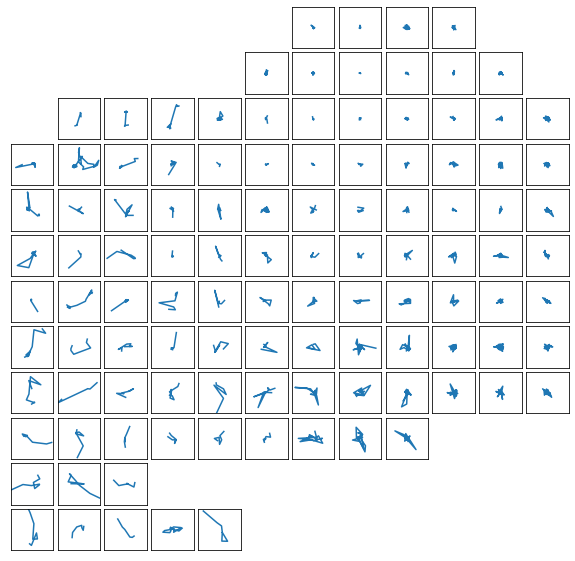

In [ ]:
mmd.plot_latent_map()

Limits are calibrated


Interpolations are done
Looking at critical trajectories


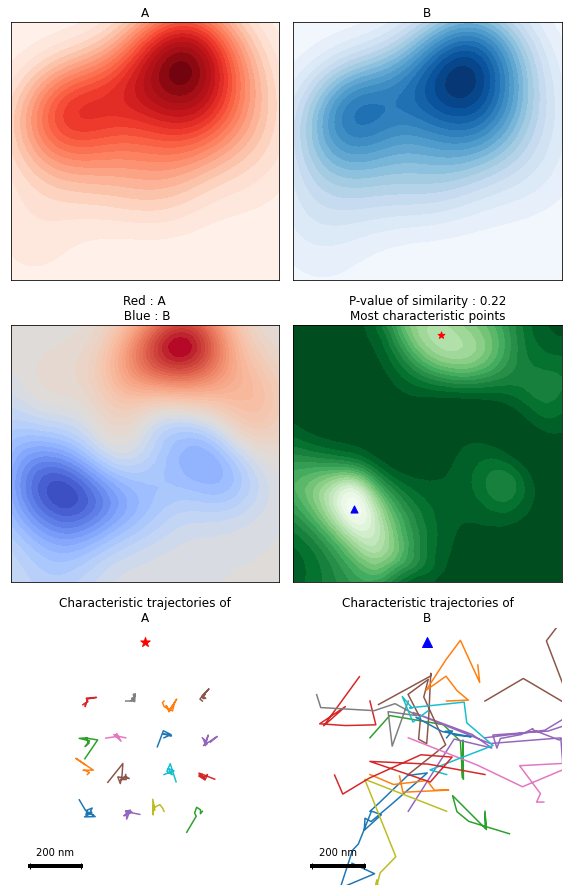

In [ ]:
mmd.plot_discriminant_trajs({"arbitrary_condition":"A"},{"arbitrary_condition":"B"})